#UIDAI Data 2026

Aadhaar is world's largest biometric identity system (~1.3 billion enrollees), clearly indicating that the system dominate workload.

The central questions addressed are:

How UIDAI can use 2025 Aadhaar data to plan capacity, infrastructure, and policy interventions for 2026 and beyond?

How can Aadhaar enrollment, demographic update, and biometric update data be analyzed to understand operational demand, regional disparities, behavioral patterns, and future infrastructure needs across India?


### Aadhar Enrollment Dataset

####Data Collection and Integration

In this step, the Aadhaar datasets related to Enrollment, Demographic Updates, and Biometric Updates were loaded from multiple CSV files into Pandas DataFrames.
Each dataset was originally split across several files; these were concatenated to reconstruct the complete datasets for the year 2025.


In [144]:
# Combining all three Aadhar Enrollment dataset into one


import pandas as pd

data_enroll1 = pd.read_csv('https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv')

data_enroll2 = pd.read_csv('https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv')

data_enroll3 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv")

df_enroll = pd.concat([data_enroll1, data_enroll2, data_enroll3], ignore_index=True)

df_enroll

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0


####Exploratory Data Analysis (EDA) – Initial Inspection

Initial exploratory analysis was performed on each dataset to understand its structure and quality.
This included:
* Checking dataset dimensions and column names
*	Inspecting data types using info()
*	Exploring unique values in categorical columns
*	Identifying missing values and duplicate records

This step helped uncover inconsistencies, data quality issues, and informed subsequent preprocessing decisions.

In [145]:
df_enroll.shape

(1006029, 7)

In [146]:
df_enroll.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [147]:
df_enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [148]:
df_enroll.nunique()

,0
date,92
state,55
district,985
pincode,19463
age_0_5,671
age_5_17,624
age_18_greater,199


In [149]:
df_enroll['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [150]:
df = df_enroll[df_enroll['state']=='100000']
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
23108,02-09-2025,100000,100000,100000,0,0,3
46946,03-09-2025,100000,100000,100000,0,0,1
97816,08-09-2025,100000,100000,100000,0,0,1
115798,09-09-2025,100000,100000,100000,0,0,1
153156,11-09-2025,100000,100000,100000,0,0,2
160195,12-09-2025,100000,100000,100000,0,0,2
261778,19-09-2025,100000,100000,100000,0,0,1
272731,20-09-2025,100000,100000,100000,0,0,1
470934,24-10-2025,100000,100000,100000,0,1,0
762744,15-11-2025,100000,100000,100000,0,0,3


In [151]:
df_enroll['district'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Aurangabad', 'Ghaziabad', 'Faridabad', 'Madhubani',
       'Sikar', 'Bhagalpur', 'Amritsar', 'Gurugram',
       'Gautam Buddha Nagar', 'West Delhi', 'Bhind', 'Gwalior', 'Katni',
       'Coochbehar', 'Lucknow', 'Dinajpur Uttar', 'Marigaon', 'Kokrajhar',
       'Agra', 'Haridwar', 'Nagaon', 'Parbhani', 'West Khasi Hills',
       'North West Delhi', 'West Jaintia Hills', 'Unnao', 'Saharanpur',
       'Dibrugarh', 'Udalguri', 'Chirang', 'Kamrup', 'Dhubri', 'Jaunpur',
       'Thane', 'Dhemaji', 'Banas Kantha', 'Tinsukia', 'Spsr Nellore',
       'Barpeta', 'Sonitpur', 'Baksa', 'Ludhiana', 'Patan', 'Kanchipuram',
       'Patna', 'Lakhimpur', 'Bongaigaon', 'Vadodara', 'Nainital',
       'Dehradun', 'Hojai', 'Dohad', 'Morbi', 'Raipur', 'Gorakhpur',
       'Bulandshahr', 'Mathura', 'Pashchim Champaran', 'Bijapur',
       'Deoghar', 'Muzaf

In [152]:
df_enroll['date'].unique()

array(['02-03-2025', '09-03-2025', '15-03-2025', '20-03-2025',
       '23-03-2025', '26-03-2025', '27-03-2025', '28-03-2025',
       '29-03-2025', '01-04-2025', '01-05-2025', '01-06-2025',
       '01-07-2025', '01-09-2025', '02-09-2025', '03-09-2025',
       '04-09-2025', '05-09-2025', '06-09-2025', '07-09-2025',
       '08-09-2025', '09-09-2025', '10-09-2025', '11-09-2025',
       '12-09-2025', '13-09-2025', '14-09-2025', '15-09-2025',
       '16-09-2025', '17-09-2025', '18-09-2025', '19-09-2025',
       '20-09-2025', '21-09-2025', '22-09-2025', '23-09-2025',
       '24-09-2025', '25-09-2025', '26-09-2025', '27-09-2025',
       '28-09-2025', '29-09-2025', '30-09-2025', '13-10-2025',
       '15-10-2025', '16-10-2025', '17-10-2025', '18-10-2025',
       '19-10-2025', '20-10-2025', '21-10-2025', '22-10-2025',
       '23-10-2025', '24-10-2025', '25-10-2025', '26-10-2025',
       '27-10-2025', '28-10-2025', '29-10-2025', '30-10-2025',
       '31-10-2025', '01-11-2025', '02-11-2025', '03-11

In [153]:
df_enroll['pincode'].unique()

array([793121, 560043, 208001, ..., 227132, 521226, 454345])

In [154]:
df_enroll.isnull().sum()

,0
date,0
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0


In [155]:
df_enroll.duplicated().sum()

np.int64(22957)

In [156]:
df_enroll[df_enroll.duplicated()]

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
360605,13-10-2025,Punjab,Jalandhar,144041,2,1,0
360606,13-10-2025,Punjab,Jalandhar,144101,1,0,0
360607,13-10-2025,Punjab,Jalandhar,144102,2,0,0
360608,13-10-2025,Punjab,Jalandhar,144418,1,0,0
360609,13-10-2025,Punjab,Jalandhar,144419,1,0,0
...,...,...,...,...,...,...,...
1001611,31-12-2025,Telangana,Hyderabad,500045,4,5,1
1001612,31-12-2025,Telangana,Hyderabad,500057,0,2,0
1001613,31-12-2025,Telangana,Hyderabad,500061,4,2,0
1001614,31-12-2025,Telangana,Hyderabad,500062,1,4,0


In [157]:
p = 144041  # example pincode to check the duplicates

df_pincode = df_enroll[
    (df_enroll['pincode'] == p) &
    (df_enroll['date'] == '13-10-2025')
]

df_pincode



,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
359389,13-10-2025,Punjab,Jalandhar,144041,2,1,0
360605,13-10-2025,Punjab,Jalandhar,144041,2,1,0


Insights for Data Cleaning & Preprocessing:

*   The dataset contains the data of 2025.
*   Same states/district but lowercase and uppercase have been treated differently
*   Date column need to be converted into date time format
*   State and district are of object type and hence it requires to convert it into string.
* There are 22957 rows duplicate rows in the dataset.


####Data Preprocessing

To ensure consistency and enable proper analysis:
* The date column was converted to datetime format for temporal analysis
* The state and district columns were converted to string type to standardize categorical data handling
* Duplicate rows were identified and removed from all the datasets.

This step was necessary to maintain data integrity, avoid double-counting, and ensure accurate aggregation and ratio calculations.

These conversions prevent grouping and merging issues in later stages.



In [158]:
# Convert date column from 'DD-MM-YYYY' string to proper datetime type
df_enroll['date'] = pd.to_datetime(df_enroll['date'], format='%d-%m-%Y')

In [159]:
df_enroll["date"].head()


,date
0,2025-03-02
1,2025-03-09
2,2025-03-09
3,2025-03-09
4,2025-03-09


In [160]:
df_enroll["date"].dtype

dtype('<M8[ns]')

In [161]:
df_enroll = df_enroll.sort_values("date")

In [162]:
df_enroll

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
32,2025-03-09,West Bengal,Dinajpur Uttar,733129,26,18,27
31,2025-03-09,Uttar Pradesh,Lucknow,226003,23,102,17
30,2025-03-09,West Bengal,Coochbehar,736135,19,12,19
29,2025-03-09,Bihar,Purbi Champaran,845304,18,72,12
...,...,...,...,...,...,...,...
994194,2025-12-31,Rajasthan,Sawai Madhopur,322001,15,12,0
994193,2025-12-31,Rajasthan,Rajsamand,313322,2,3,0
994192,2025-12-31,Rajasthan,Rajsamand,313301,11,1,0
994198,2025-12-31,Rajasthan,Sawai Madhopur,322034,1,0,0


In [163]:
# Removing duplicated rows
df_enroll = df_enroll.drop_duplicates()

In [164]:
df_enroll.duplicated().sum()

np.int64(0)

In [165]:
df_enroll['state'].value_counts()

,count
state,
Uttar Pradesh,108066
Tamil Nadu,90388
Maharashtra,75531
West Bengal,75329
Karnataka,68787
Andhra Pradesh,63832
Bihar,58542
Rajasthan,54864
Madhya Pradesh,49562


In [166]:
# Converting state and district from object to string type
df_enroll = df_enroll.copy()
df_enroll['state'] = df_enroll['state'].astype('string')
df_enroll['district'] = df_enroll['district'].astype('string')
df_enroll.dtypes


,0
date,datetime64[ns]
state,string[python]
district,string[python]
pincode,int64
age_0_5,int64
age_5_17,int64
age_18_greater,int64


In [167]:
df_enroll.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983072 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            983072 non-null  datetime64[ns]
 1   state           983072 non-null  string        
 2   district        983072 non-null  string        
 3   pincode         983072 non-null  int64         
 4   age_0_5         983072 non-null  int64         
 5   age_5_17        983072 non-null  int64         
 6   age_18_greater  983072 non-null  int64         
dtypes: datetime64[ns](1), int64(4), string(2)
memory usage: 60.0 MB


####Data Cleaning and Standardization

Significant cleaning was performed on the state and district columns to handle inconsistencies such as:
* Case variations (e.g., uppercase vs lowercase)
*	Spelling errors and alternate spellings
*	Multiple representations of the same geographic entity
*	Invalid or junk values (e.g., 100000, Unknown)

Mapping techniques were used to standardize names and consolidate categories, ensuring reliable geographic analysis.

In [168]:
# Cleaning and making proper states name

import numpy as np

state_map_enroll = {
    # proper case already
    'Meghalaya': 'Meghalaya',
    'Karnataka': 'Karnataka',
    'Uttar Pradesh': 'Uttar Pradesh',
    'Bihar': 'Bihar',
    'Maharashtra': 'Maharashtra',
    'Haryana': 'Haryana',
    'Rajasthan': 'Rajasthan',
    'Punjab': 'Punjab',
    'Delhi': 'Delhi',
    'Madhya Pradesh': 'Madhya Pradesh',
    'West Bengal': 'West Bengal',
    'Assam': 'Assam',
    'Uttarakhand': 'Uttarakhand',
    'Gujarat': 'Gujarat',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Tamil Nadu': 'Tamil Nadu',
    'Chhattisgarh': 'Chhattisgarh',
    'Jharkhand': 'Jharkhand',
    'Nagaland': 'Nagaland',
    'Manipur': 'Manipur',
    'Telangana': 'Telangana',
    'Tripura': 'Tripura',
    'Mizoram': 'Mizoram',
    'Jammu and Kashmir': 'Jammu and Kashmir',
    'Chandigarh': 'Chandigarh',
    'Sikkim': 'Sikkim',
    'Odisha': 'Odisha',
    'Kerala': 'Kerala',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Goa': 'Goa',
    'Ladakh': 'Ladakh',
    'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
    'Puducherry': 'Puducherry',
    'Lakshadweep': 'Lakshadweep',

    # long / title-case variants
    'The Dadra And Nagar Haveli And Daman And Diu':
        'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli and Daman and Diu':
        'Dadra and Nagar Haveli and Daman and Diu',

    # older names / partial entities collapsed to new UT
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Andaman variants
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',

    # spelling / case variants – West Bengal
    'WEST BENGAL': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bengal ': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West bengal': 'West Bengal',
    'WESTBENGAL': 'West Bengal',

    # spelling / case variants – Odisha
    'Orissa': 'Odisha',
    'ODISHA': 'Odisha',

    # case variant – Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    'Pondicherry' : 'Puducherry',

    # J&K variants
    'Jammu And Kashmir': 'Jammu and Kashmir',
    'Jammu & Kashmir': 'Jammu and Kashmir',

    # junk code
    '100000': np.nan
}


In [169]:
# basic normalization first
df_enroll['state'] = df_enroll['state'].map(state_map_enroll)


# handle values not in mapping
df_enroll['state'] = df_enroll['state'].fillna('Unknown')


In [170]:
df_enroll = df_enroll[df_enroll['state'] != 'Unknown']

In [171]:
df_enroll['state'].unique()

array(['Meghalaya', 'West Bengal', 'Uttar Pradesh', 'Bihar', 'Delhi',
       'Madhya Pradesh', 'Haryana', 'Punjab', 'Rajasthan', 'Karnataka',
       'Maharashtra', 'Assam', 'Uttarakhand', 'Tamil Nadu', 'Gujarat',
       'Andhra Pradesh', 'Chhattisgarh', 'Jharkhand', 'Nagaland',
       'Chandigarh', 'Sikkim', 'Tripura', 'Jammu and Kashmir', 'Odisha',
       'Telangana', 'Manipur', 'Mizoram', 'Kerala',
       'Dadra and Nagar Haveli and Daman and Diu', 'Himachal Pradesh',
       'Arunachal Pradesh', 'Goa', 'Andaman and Nicobar Islands',
       'Puducherry', 'Ladakh', 'Lakshadweep'], dtype=object)

In [172]:
df_enroll['state'].value_counts()

,count
state,
Uttar Pradesh,108066
Tamil Nadu,90388
Maharashtra,75531
West Bengal,75371
Karnataka,68787
Andhra Pradesh,63837
Bihar,58542
Rajasthan,54864
Madhya Pradesh,49562


In [173]:
df_enroll['state'].nunique()

36

In [174]:
df_enroll['district'].nunique()

984

In [175]:
# unique districts in each state
state_districts = (
    df_enroll
    .groupby('state')['district']
    .unique()
    .apply(lambda x: sorted(set(x)))  # sort for readability
)



# loop to print nicely (optional)
for st, dists in state_districts.items():
    print(f'\n{st} ({len(dists)} districts)')
    print(', '.join(dists))



Andaman and Nicobar Islands (5 districts)
Andamans, Nicobar, Nicobars, North And Middle Andaman, South Andaman

Andhra Pradesh (49 districts)
Adilabad, Alluri Sitharama Raju, Anakapalli, Anantapur, Ananthapur, Ananthapuramu, Annamayya, Bapatla, Chittoor, Cuddapah, Dr. B. R. Ambedkar Konaseema, East Godavari, Eluru, Guntur, Hyderabad, K.V.Rangareddy, K.v. Rangareddy, Kakinada, Karim Nagar, Karimnagar, Khammam, Krishna, Kurnool, Mahabub Nagar, Mahabubnagar, Mahbubnagar, Medak, N. T. R, Nalgonda, Nandyal, Nellore, Nizamabad, Palnadu, Parvathipuram Manyam, Prakasam, Rangareddi, Spsr Nellore, Sri Potti Sriramulu Nellore, Sri Sathya Sai, Srikakulam, Tirupati, Visakhapatanam, Visakhapatnam, Vizianagaram, Warangal, West Godavari, Y. S. R, chittoor, rangareddi

Arunachal Pradesh (25 districts)
Anjaw, Changlang, Dibang Valley, East Kameng, East Siang, Kamle, Kra Daadi, Kurung Kumey, Leparada, Lohit, Longding, Lower Dibang Valley, Lower Siang, Lower Subansiri, Namsai, Pakke Kessang, Papum Pare, 

In [176]:
df_enroll['district'].value_counts()

,count
district,
Pune,6515
North 24 Parganas,6404
Barddhaman,5255
Bengaluru,5216
Hyderabad,4866
...,...
Hooghiy,1
rangareddi,1
Nicobars,1


In [177]:
import numpy as np

district_map_enroll = {
    'Andamans' : 'Andamans',
    'Nicobar' : 'Nicobar',
    'Nicobars' : 'Nicobar',
    'North And Middle Andaman' : 'North And Middle Andaman',
    'South Andaman' : 'South Andaman',



    'Adilabad': 'Adilabad',
    'Alluri Sitharama Raju': 'Alluri Sitharama Raju',
    'Anakapalli': 'Anakapalli',
    'Anantapur': 'Anantapur',
    'Ananthapur': 'Anantapur',
    'Ananthapuramu': 'Anantapur',
    'Annamayya': 'Annamayya',
    'Bapatla': 'Bapatla',
    'Chittoor': 'Chittoor',
    'Cuddapah': 'Cuddapah',
    'Dr. B. R. Ambedkar Konaseema': 'Dr. B. R. Ambedkar Konaseema',
    'East Godavari': 'East Godavari',
    'Eluru': 'Eluru',
    'Guntur': 'Guntur',
    'Hyderabad': 'Hyderabad',
    'Kakinada': 'Kakinada',
    'Karim Nagar': 'Karim Nagar',
    'Karimnagar': 'Karim Nagar',
    'Khammam': 'Khammam',
    'Krishna': 'Krishna',
    'Kurnool': 'Kurnool',
    'K.V.Rangareddy': 'K.V.Rangareddy',
    'K.v. Rangareddy': 'K.V.Rangareddy',
    'Mahabub Nagar': 'Mahabub Nagar',
    'Mahabubnagar': 'Mahabub Nagar',
    'Mahbubnagar': 'Mahabub Nagar',
    'Medak': 'Medak',
    'N. T. R': 'N. T. R',
    'Nalgonda': 'Nalgonda',
    'Nandyal': 'Nandyal',
    'Nellore': 'Nellore',
    'Nizamabad': 'Nizamabad',
    'Palnadu': 'Palnadu',
    'Parvathipuram Manyam': 'Parvathipuram Manyam',
    'Prakasam': 'Prakasam',
    'Rangareddi': 'K.V.Rangareddy',
    'Spsr Nellore': 'Nellore',
    'Sri Potti Sriramulu Nellore': 'Nellore',
    'Sri Sathya Sai': 'Sri Sathya Sai',
    'Srikakulam': 'Srikakulam',
    'Tirupati': 'Tirupati',
    'Visakhapatanam': 'Visakhapatnam',
    'Visakhapatnam': 'Visakhapatnam',
    'Vizianagaram': 'Vizianagaram',
    'Warangal': 'Warangal',
    'West Godavari': 'West Godavari',
    'Y. S. R': 'Y. S. R',
    'chittoor': 'Chittoor',
    'rangareddi': 'K.V.Rangareddy',



    'Anjaw': 'Anjaw',
    'Changlang': 'Changlang',
    'Dibang Valley': 'Dibang Valley',
    'East Kameng': 'East Kameng',
    'East Siang': 'East Siang',
    'Kamle': 'Kamle',
    'Kra Daadi': 'Kra Daadi',
    'Kurung Kumey': 'Kurung Kumey',
    'Leparada': 'Leparada',
    'Lohit': 'Lohit',
    'Longding': 'Longding',
    'Lower Dibang Valley': 'Lower Dibang Valley',
    'Lower Siang': 'Lower Siang',
    'Lower Subansiri': 'Lower Subansiri',
    'Namsai': 'Namsai',
    'Pakke Kessang': 'Pakke Kessang',
    'Papum Pare': 'Papum Pare',
    'Shi-yomi': 'Shi-yomi',
    'Siang': 'Siang',
    'Tawang': 'Tawang',
    'Tirap': 'Tirap',
    'Upper Siang': 'Upper Siang',
    'Upper Subansiri': 'Upper Subansiri',
    'West Kameng': 'West Kameng',
    'West Siang': 'West Siang',


    'Bajali': 'Bajali',
    'Baksa': 'Baksa',
    'Barpeta': 'Barpeta',
    'Biswanath': 'Biswanath',
    'Bongaigaon': 'Bongaigaon',
    'Cachar': 'Cachar',
    'Charaideo': 'Charaideo',
    'Chirang': 'Chirang',
    'Darrang': 'Darrang',
    'Dhemaji': 'Dhemaji',
    'Dhubri': 'Dhubri',
    'Dibrugarh': 'Dibrugarh',
    'Dima Hasao': 'Dima Hasao',
    'Goalpara': 'Goalpara',
    'Golaghat': 'Golaghat',
    'Hailakandi': 'Hailakandi',
    'Hojai': 'Hojai',
    'Jorhat': 'Jorhat',
    'Kamrup': 'Kamrup',
    'Kamrup Metro': 'Kamrup Metro',
    'Karbi Anglong': 'Karbi Anglong',
    'Karimganj': 'Sribhumi',
    'Kokrajhar': 'Kokrajhar',
    'Lakhimpur': 'Lakhimpur',
    'Majuli': 'Majuli',
    'Marigaon': 'Marigaon',
    'Nagaon': 'Nagaon',
    'Nalbari': 'Nalbari',
    'North Cachar Hills': 'Dima Hasao',
    'Sibsagar': 'Sivasagar',
    'Sivasagar': 'Sivasagar',
    'Sonitpur': 'Sonitpur',
    'South Salmara Mankachar': 'South Salmara Mankachar',
    'Sribhumi': 'Sribhumi',
    'Tamulpur District': 'Tamulpur District',
    'Tinsukia': 'Tinsukia',
    'Udalguri': 'Udalguri',
    'West Karbi Anglong': 'West Karbi Anglong',


    'Araria': 'Araria',
    'Arwal': 'Arwal',
    'Aurangabad': 'Aurangabad',
    'Aurangabad(BH)': 'Aurangabad',
    'Aurangabad(bh)': 'Aurangabad',
    'Banka': 'Banka',
    'Begusarai': 'Begusarai',
    'Bhabua': 'Bhabua',
    'Bhagalpur': 'Bhagalpur',
    'Bhojpur': 'Bhojpur',
    'Buxar': 'Buxar',
    'Darbhanga': 'Darbhanga',
    'East Champaran': 'East Champaran',
    'Gaya': 'Gaya',
    'Gopalganj': 'Gopalganj',
    'Jamui': 'Jamui',
    'Jehanabad': 'Jehanabad',
    'Kaimur (Bhabua)': 'Bhabua',
    'Katihar': 'Katihar',
    'Khagaria': 'Khagaria',
    'Kishanganj': 'Kishanganj',
    'Lakhisarai': 'Lakhisarai',
    'Madhepura': 'Madhepura',
    'Madhubani': 'Madhubani',
    'Monghyr': 'Munger',
    'Munger': 'Munger',
    'Muzaffarpur': 'Muzaffarpur',
    'Nalanda': 'Nalanda',
    'Nawada': 'Nawada',
    'Pashchim Champaran': 'West Champaran',
    'Patna': 'Patna',
    'Purba Champaran': 'East Champaran',
    'Purbi Champaran': 'East Champaran',
    'Purnea': 'Purnea',
    'Purnia': 'Purnea',
    'Rohtas': 'Rohtas',
    'Saharsa': 'Saharsa',
    'Samastipur': 'Samastipur',
    'Samstipur': 'Samastipur',
    'Saran': 'Saran',
    'Sheikhpura': 'Sheikhpura',
    'Sheikpura': 'Sheikhpura',
    'Sheohar': 'Sheohar',
    'Sitamarhi': 'Sitamarhi',
    'Siwan': 'Siwan',
    'Supaul': 'Supaul',
    'Vaishali': 'Vaishali',
    'West Champaran': 'West Champaran',

    'Chandigarh': 'Chandigarh',
    'Rupnagar': 'Rupnagar',



    # Chhattisgarh
    'Balod': 'Balod',
    'Baloda Bazar': 'Baloda Bazar',
    'Balrampur': 'Balrampur',
    'Bastar': 'Bastar',
    'Bemetara': 'Bemetara',
    'Bijapur': 'Bijapur',
    'Bilaspur': 'Bilaspur',
    'Dakshin Bastar Dantewada': 'Dantewada',
    'Dantewada': 'Dantewada',
    'Dhamtari': 'Dhamtari',
    'Durg': 'Durg',
    'Gariyaband': 'Gariyaband',
    'Gaurela-pendra-marwahi': 'Gaurela-Pendra-Marwahi',
    'Gaurella Pendra Marwahi': 'Gaurela-Pendra-Marwahi',
    'Gaurela-Pendra-Marwahi	': 'Gaurela-Pendra-Marwahi',
    'Gaurela-Pendra-Marwahi': 'Gaurela-Pendra-Marwahi',
    'Janjgir - Champa': 'Janjgir-Champa',
    'Janjgir Champa': 'Janjgir-Champa',
    'Janjgir-champa': 'Janjgir-Champa',
    'Janjgir-Champa':'Janjgir-Champa',
    'Jashpur': 'Jashpur',
    'Kabeerdham': 'Kabeerdham',
    'Kanker': 'Kanker',
    'Kawardha': 'Kabeerdham',
    'Khairagarh Chhuikhadan Gandai': 'Khairagarh-Chhuikhadan-Gandai',
    'Khairagarh-Chhuikhadan-Gandai':'Khairagarh-Chhuikhadan-Gandai',
    'Kondagaon': 'Kondagaon',
    'Korba': 'Korba',
    'Koriya': 'Koriya',
    'Mahasamund': 'Mahasamund',
    'Manendragarh–Chirmiri–Bharatpur':'Manendragarh-Chirmiri-Bharatpur',
    'Manendragarh-Chirmiri-Bharatpur':'Manendragarh-Chirmiri-Bharatpur',
    'Mohalla-Manpur-Ambagarh Chowki': 'Mohla-Manpur-Ambagarh-Chouki',
    'Mohla-Manpur-Ambagarh Chouki': 'Mohla-Manpur-Ambagarh-Chouki',
    'Mohla-Manpur-Ambagarh-Chouki': 'Mohla-Manpur-Ambagarh-Chouki',
    'Mungeli': 'Mungeli',
    'Narayanpur': 'Narayanpur',
    'Raigarh': 'Raigarh',
    'Raipur': 'Raipur',
    'Rajnandgaon': 'Rajnandgaon',
    'Sakti': 'Sakti',
    'Sarangarh-Bilaigarh': 'Sarangarh-Bilaigarh',
    'Sukma': 'Sukma',
    'Surajpur': 'Surajpur',
    'Surguja': 'Surguja',
    'Uttar Bastar Kanker': 'Kanker',


    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli',
    'Daman': 'Daman',
    'Diu': 'Diu',

    'Central Delhi': 'Central Delhi',
    'East Delhi': 'East Delhi',
    'Najafgarh': 'Najafgarh',
    'New Delhi': 'New Delhi',
    'North Delhi': 'North Delhi',
    'North East': 'North East Delhi',
    'North East   *': 'North East Delhi',
    'North East Delhi': 'North East Delhi',
    'North West Delhi': 'North West Delhi',
    'Shahdara': 'Shahdara',
    'South Delhi': 'South Delhi',
    'South East Delhi': 'South East Delhi',
    'South West Delhi': 'South West Delhi',
    'West Delhi': 'West Delhi',



    'Bardez': 'North Goa',
    'North Goa': 'North Goa',
    'South Goa': 'South Goa',



    'Ahmadabad': 'Ahmedabad',
    'Ahmedabad': 'Ahmedabad',
    'Amreli': 'Amreli',
    'Anand': 'Anand',
    'Arvalli': 'Arvalli',
    'Banas Kantha': 'Banaskantha',
    'Banaskantha': 'Banaskantha',
    'Bharuch': 'Bharuch',
    'Bhavnagar': 'Bhavnagar',
    'Botad': 'Botad',
    'Chhotaudepur': 'Chhotaudepur',
    'Dahod': 'Dahod',
    'Dang': 'The Dangs',
    'Devbhumi Dwarka': 'Devbhumi Dwarka',
    'Dohad': 'Dahod',
    'Gandhinagar': 'Gandhinagar',
    'Gir Somnath': 'Gir Somnath',
    'Jamnagar': 'Jamnagar',
    'Junagadh': 'Junagadh',
    'Kachchh': 'Kachchh',
    'Kheda': 'Kheda',
    'Mahesana': 'Mahesana',
    'Mahisagar': 'Mahisagar',
    'Morbi': 'Morbi',
    'Narmada': 'Narmada',
    'Navsari': 'Navsari',
    'Panch Mahals': 'Panchmahals',
    'Panchmahals': 'Panchmahals',
    'Patan': 'Patan',
    'Porbandar': 'Porbandar',
    'Rajkot': 'Rajkot',
    'Sabar Kantha': 'Sabarkantha',
    'Sabarkantha': 'Sabarkantha',
    'Surat': 'Surat',
    'Surendra Nagar': 'Surendranagar',
    'Surendranagar': 'Surendranagar',
    'Tapi': 'Tapi',
    'The Dangs': 'The Dangs',
    'Vadodara': 'Vadodara',
    'Valsad': 'Valsad',


    'Ambala': 'Ambala',
    'Bhiwani': 'Bhiwani',
    'Charkhi Dadri': 'Charkhi Dadri',
    'Faridabad': 'Faridabad',
    'Fatehabad': 'Fatehabad',
    'Gurgaon': 'Gurugram',
    'Gurugram': 'Gurugram',
    'Hisar': 'Hisar',
    'Jhajjar': 'Jhajjar',
    'Jhajjar *': 'Jhajjar',
    'Jind': 'Jind',
    'Kaithal': 'Kaithal',
    'Karnal': 'Karnal',
    'Kurukshetra': 'Kurukshetra',
    'Mahendragarh': 'Mahendragarh',
    'Mewat': 'Nuh',
    'Nuh': 'Nuh',
    'Palwal': 'Palwal',
    'Panchkula': 'Panchkula',
    'Panipat': 'Panipat',
    'Rewari': 'Rewari',
    'Rohtak': 'Rohtak',
    'Sirsa': 'Sirsa',
    'Sonipat': 'Sonipat',
    'Yamuna Nagar': 'Yamuna Nagar',
    'Yamunanagar': 'Yamuna Nagar',


    'Bilaspur': 'Bilaspur',
    'Chamba': 'Chamba',
    'Hamirpur': 'Hamirpur',
    'Kangra': 'Kangra',
    'Kinnaur': 'Kinnaur',
    'Kullu': 'Kullu',
    'Lahaul and Spiti': 'Lahaul and Spiti',
    'Lahul & Spiti': 'Lahaul and Spiti',
    'Lahul and Spiti': 'Lahaul and Spiti',
    'Mandi': 'Mandi',
    'Shimla': 'Shimla',
    'Sirmaur': 'Sirmaur',
    'Solan': 'Solan',
    'Una': 'Una',


    'Anantnag': 'Anantnag',
    'Badgam': 'Badgam',
    'Bandipore': 'Bandipore',
    'Bandipur': 'Bandipore',
    'Baramula': 'Baramula',
    'Budgam': 'Badgam',
    'Doda': 'Doda',
    'Ganderbal': 'Ganderbal',
    'Jammu': 'Jammu',
    'Kargil': 'Kargil',
    'Kathua': 'Kathua',
    'Kishtwar': 'Kishtwar',
    'Kulgam': 'Kulgam',
    'Kupwara': 'Kupwara',
    'Leh': 'Leh',
    'Leh (ladakh)': 'Leh',
    'Pulwama': 'Pulwama',
    'Punch': 'Punch',
    'punch': 'Punch',
    'Rajauri': 'Rajauri',
    'Rajouri': 'Rajauri',
    'Ramban': 'Ramban',
    'Reasi': 'Reasi',
    'Samba': 'Samba',
    'Shopian': 'Shopian',
    'Shupiyan': 'Shopian',
    'Srinagar': 'Srinagar',
    'Udhampur': 'Udhampur',


    'Bokaro': 'Bokaro',
    'Bokaro *': 'Bokaro',
    'Chatra': 'Chatra',
    'Deoghar': 'Deoghar',
    'Dhanbad': 'Dhanbad',
    'Dumka': 'Dumka',
    'East Singhbhum': 'East Singhbhum',
    'East Singhbum': 'East Singhbhum',
    'Garhwa': 'Garhwa',
    'Garhwa *': 'Garhwa',
    'Giridih': 'Giridih',
    'Godda': 'Godda',
    'Gumla': 'Gumla',
    'Hazaribag': 'Hazaribagh',
    'Hazaribagh': 'Hazaribagh',
    'Jamtara': 'Jamtara',
    'Khunti': 'Khunti',
    'Kodarma': 'Kodarma',
    'Koderma': 'Kodarma',
    'Latehar': 'Latehar',
    'Lohardaga': 'Lohardaga',
    'Pakaur': 'Pakur',
    'Pakur': 'Pakur',
    'Palamau': 'Palamu',
    'Palamu': 'Palamu',
    'Pashchimi Singhbhum': 'West Singhbhum',
    'Purbi Singhbhum': 'East Singhbhum',
    'Ramgarh': 'Ramgarh',
    'Ranchi': 'Ranchi',
    'Sahebganj': 'Sahebganj',
    'Sahibganj': 'Sahebganj',
    'Seraikela-Kharsawan': 'Seraikela-Kharsawan',
    'Seraikela-kharsawan': 'Seraikela-Kharsawan',
    'Simdega': 'Simdega',
    'West Singhbhum': 'West Singhbhum',


 'Bagalkot': 'Bagalkot',
    'Bagalkot *': 'Bagalkot',
    'Ballari': 'Ballari',
    'Bangalore': 'Bengaluru Urban',
    'Bangalore Rural': 'Bengaluru Rural',
    'Belagavi': 'Belagavi',
    'Belgaum': 'Belagavi',
    'Bellary': 'Ballari',
    'Bengaluru': 'Bengaluru Urban',
    'Bengaluru Rural': 'Bengaluru Rural',
    'Bengaluru South': 'Bengaluru Urban',
    'Bengaluru Urban': 'Bengaluru Urban',
    'Bidar': 'Bidar',
    'Bijapur': 'Vijayapura',
    'Bijapur(KAR)': 'Vijayapura',
    'Chamarajanagar': 'Chamarajanagar',
    'Chamarajanagar *': 'Chamarajanagar',
    'Chamrajanagar': 'Chamarajanagar',
    'Chamrajnagar': 'Chamarajanagar',
    'Chickmagalur': 'Chikkamagaluru',
    'Chikkaballapur': 'Chikkaballapur',
    'Chikkamagaluru': 'Chikkamagaluru',
    'Chikmagalur': 'Chikkamagaluru',
    'Chitradurga': 'Chitradurga',
    'Dakshina Kannada': 'Dakshina Kannada',
    'Davanagere': 'Davanagere',
    'Davangere': 'Davanagere',
    'Dharwad': 'Dharwad',
    'Gadag': 'Gadag',
    'Gadag *': 'Gadag',
    'Gulbarga': 'Kalaburagi',
    'Hasan': 'Hassan',
    'Hassan': 'Hassan',
    'Haveri': 'Haveri',
    'Haveri *': 'Haveri',
    'Kalaburagi': 'Kalaburagi',
    'Kodagu': 'Kodagu',
    'Kolar': 'Kolar',
    'Koppal': 'Koppal',
    'Mandya': 'Mandya',
    'Mysore': 'Mysuru',
    'Mysuru': 'Mysuru',
    'Raichur': 'Raichur',
    'Ramanagar': 'Ramanagara',
    'Ramanagara': 'Ramanagara',
    'Shimoga': 'Shivamogga',
    'Shivamogga': 'Shivamogga',
    'Tumakuru': 'Tumakuru',
    'Tumkur': 'Tumakuru',
    'Udupi': 'Udupi',
    'Udupi *': 'Udupi',
    'Uttara Kannada': 'Uttara Kannada',
    'Vijayanagara': 'Vijayanagara',
    'Vijayapura': 'Vijayapura',
    'Yadgir': 'Yadgir',
    'yadgir': 'Yadgir',



'Alappuzha': 'Alappuzha',
    'Ernakulam': 'Ernakulam',
    'Idukki': 'Idukki',
    'Kannur': 'Kannur',
    'Kasaragod': 'Kasaragod',
    'Kasargod': 'Kasaragod',
    'Kollam': 'Kollam',
    'Kottayam': 'Kottayam',
    'Kozhikode': 'Kozhikode',
    'Malappuram': 'Malappuram',
    'Palakkad': 'Palakkad',
    'Pathanamthitta': 'Pathanamthitta',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Thrissur': 'Thrissur',
    'Wayanad': 'Wayanad',


    'Kargil': 'Kargil',
    'Leh': 'Leh',


    'Lakshadweep': 'Lakshadweep',

    'Agar Malwa': 'Agar Malwa',
    'Alirajpur': 'Alirajpur',
    'Anuppur': 'Anuppur',
    'Ashok Nagar': 'Ashok Nagar',
    'Ashoknagar': 'Ashok Nagar',
    'Balaghat': 'Balaghat',
    'Barwani': 'Barwani',
    'Betul': 'Betul',
    'Bhind': 'Bhind',
    'Bhopal': 'Bhopal',
    'Burhanpur': 'Burhanpur',
    'Chhatarpur': 'Chhatarpur',
    'Chhindwara': 'Pandhurna',
    'Damoh': 'Damoh',
    'Datia': 'Datia',
    'Dewas': 'Dewas',
    'Dhar': 'Dhar',
    'Dindori': 'Dindori',
    'East Nimar': 'Khandwa',
    'Guna': 'Guna',
    'Gwalior': 'Gwalior',
    'Harda': 'Harda',
    'Harda *': 'Harda',
    'Hoshangabad': 'Hoshangabad',
    'Indore': 'Indore',
    'Jabalpur': 'Jabalpur',
    'Jhabua': 'Jhabua',
    'Katni': 'Katni',
    'Khandwa': 'Khandwa',
    'Khargone': 'Khargone',
    'Maihar': 'Maihar',
    'Mandla': 'Mandla',
    'Mandsaur': 'Mandsaur',
    'Mauganj': 'Mauganj',
    'Morena': 'Morena',
    'Narmadapuram': 'Narmadapuram',
    'Narsimhapur': 'Narsimhapur',
    'Narsinghpur': 'Narsimhapur',
    'Neemuch': 'Neemuch',
    'Niwari': 'Niwari',
    'Pandhurna': 'Pandhurna',
    'Panna': 'Panna',
    'Raisen': 'Raisen',
    'Rajgarh': 'Rajgarh',
    'Ratlam': 'Ratlam',
    'Rewa': 'Mauganj',
    'Sagar': 'Sagar',
    'Satna': 'Maihar',
    'Sehore': 'Sehore',
    'Seoni': 'Seoni',
    'Shahdol': 'Shahdol',
    'Shajapur': 'Shajapur',
    'Sheopur': 'Sheopur',
    'Shivpuri': 'Shivpuri',
    'Sidhi': 'Sidhi',
    'Singrauli': 'Singrauli',
    'Tikamgarh': 'Tikamgarh',
    'Ujjain': 'Ujjain',
    'Umaria': 'Umaria',
    'Vidisha': 'Vidisha',
    'West Nimar': 'West Nimar',


    'Ahilyanagar': 'Ahmadnagar',
    'Ahmadnagar': 'Ahmadnagar',
    'Ahmed Nagar': 'Ahmadnagar',
    'Ahmednagar': 'Ahmadnagar',
    'Akola': 'Akola',
    'Amravati': 'Amravati',
    'Aurangabad': 'Chhatrapati Sambhajinagar',
    'Beed': 'Beed',
    'Bhandara': 'Bhandara',
    'Bid': 'Beed',
    'Buldana': 'Buldhana',
    'Buldhana': 'Buldhana',
    'Chandrapur': 'Chandrapur',
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',
    'Chhatrapati Sambhajinagar': 'Chhatrapati Sambhajinagar',
    'Dharashiv': 'Dharashiv',
    'Dhule': 'Dhule',
    'Gadchiroli': 'Gadchiroli',
    'Gondia': 'Gondia',
    'Gondiya': 'Gondia',
    'Gondiya *': 'Gondia',
    'Hingoli': 'Hingoli',
    'Hingoli *': 'Hingoli',
    'Jalgaon': 'Jalgaon',
    'Jalna': 'Jalna',
    'Kolhapur': 'Kolhapur',
    'Latur': 'Latur',
    'Mumbai': 'Mumbai City',
    'Mumbai City': 'Mumbai City',
    'Mumbai Suburban': 'Mumbai Suburban',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Nagpur': 'Nagpur',
    'Nanded': 'Nanded',
    'Nandurbar': 'Nandurbar',
    'Nandurbar *': 'Nandurbar',
    'Nashik': 'Nashik',
    'Osmanabad': 'Dharashiv',
    'Palghar': 'Palghar',
    'Parbhani': 'Parbhani',
    'Pune': 'Pune',
    'Raigad': 'Raigad',
    'Raigarh': 'Raigarh',
    'Raigarh(MH)': 'Raigarh',
    'Ratnagiri': 'Ratnagiri',
    'Sangli': 'Sangli',
    'Satara': 'Satara',
    'Sindhudurg': 'Sindhudurg',
    'Solapur': 'Solapur',
    'Thane': 'Thane',
    'Wardha': 'Wardha',
    'Washim': 'Washim',
    'Washim *': 'Washim',
    'Yavatmal': 'Yavatmal',


    'Bishnupur': 'Bishnupur',
    'Chandel': 'Chandel',
    'Churachandpur': 'Churachandpur',
    'Imphal East': 'Imphal East',
    'Imphal West': 'Imphal West',
    'Jiribam': 'Jiribam',
    'Kakching': 'Kakching',
    'Pherzawl': 'Pherzawl',
    'Senapati': 'Senapati',
    'Tamenglong': 'Tamenglong',
    'Thoubal': 'Thoubal',
    'Ukhrul': 'Ukhrul',


    'East Garo Hills': 'East Garo Hills',
    'East Jaintia Hills': 'East Jaintia Hills',
    'East Khasi Hills': 'East Khasi Hills',
    'Eastern West Khasi Hills': 'West Khasi Hills',
    'Jaintia Hills': 'East Jaintia Hills',
    'Kamrup': 'Kamrup',
    'North Garo Hills': 'North Garo Hills',
    'Ri Bhoi': 'Ri Bhoi',
    'South Garo Hills': 'South Garo Hills',
    'South West Garo Hills': 'South West Garo Hills',
    'South West Khasi Hills': 'South West Khasi Hills',
    'West Garo Hills': 'West Garo Hills',
    'West Jaintia Hills': 'West Jaintia Hills',
    'West Khasi Hills': 'West Khasi Hills',


    'Aizawl': 'Aizawl',
    'Champhai': 'Champhai',
    'Hnahthial': 'Hnahthial',
    'Khawzawl': 'Khawzawl',
    'Kolasib': 'Kolasib',
    'Lawngtlai': 'Lawngtlai',
    'Lunglei': 'Lunglei',
    'Mamit': 'Mamit',
    'Mammit': 'Mamit',
    'Saiha': 'Saiha',
    'Saitual': 'Saitual',
    'Serchhip': 'Serchhip',


    'Chumukedima': 'Chumukedima',
    'Dimapur': 'Dimapur',
    'Kiphire': 'Kiphire',
    'Kohima': 'Kohima',
    'Longleng': 'Longleng',
    'Meluri': 'Meluri',
    'Mokokchung': 'Mokokchung',
    'Mon': 'Mon',
    'Niuland': 'Niuland',
    'Noklak': 'Noklak',
    'Peren': 'Peren',
    'Phek': 'Phek',
    'Shamator': 'Shamator',
    'Tseminyu': 'Tseminyu',
    'Tuensang': 'Tuensang',
    'Wokha': 'Wokha',
    'Zunheboto': 'Zunheboto',



    # Odisha
    'ANGUL': 'Angul',
    'ANUGUL': 'Angul',
    'Angul': 'Angul',
    'Anugal': 'Angul',
    'Anugul': 'Angul',
    'Balangir': 'Balangir',
    'Baleshwar': 'Balasore',
    'Baleswar': 'Balasore',
    'Balasore':'Balasore',
    'Bargarh': 'Bargarh',
    'Baudh': 'Boudh',
    'Bhadrak': 'Bhadrak',
    'Boudh': 'Boudh',
    'Cuttack': 'Cuttack',
    'Debagarh': 'Debagarh',
    'Dhenkanal': 'Dhenkanal',
    'Gajapati': 'Gajapati',
    'Ganjam': 'Ganjam',
    'JAJPUR': 'Jajpur',
    'Jagatsinghapur': 'Jagatsinghapur',
    'Jagatsinghpur': 'Jagatsinghapur',
    'Jajapur': 'Jajpur',
    'Jajpur': 'Jajpur',
    'Jharsuguda': 'Jharsuguda',
    'Kalahandi': 'Kalahandi',
    'Kandhamal': 'Kandhamal',
    'Kendrapara': 'Kendrapara',
    'Kendrapara *': 'Kendrapara',
    'Kendujhar': 'Kendujhar',
    'Khorda': 'Khordha',
    'Khordha': 'Khordha',
    'Koraput': 'Koraput',
    'Malkangiri': 'Malkangiri',
    'Mayurbhanj': 'Mayurbhanj',
    'NUAPADA': 'Nuapada',
    'Nabarangapur': 'Nabarangapur',
    'Nabarangpur': 'Nabarangapur',
    'Nayagarh': 'Nayagarh',
    'Nuapada': 'Nuapada',
    'Puri': 'Puri',
    'Rayagada': 'Rayagada',
    'Sambalpur': 'Sambalpur',
    'Sonapur': 'Subarnapur',
    'Subarnapur': 'Subarnapur',
    'Sundargarh': 'Sundargarh',
    'Sundergarh': 'Sundargarh',
    'jajpur': 'Jajpur',


'Karaikal': 'Karaikal',
    'Pondicherry': 'Puducherry',
    'Puducherry': 'Puducherry',
    'Yanam': 'Yanam',


    'Amritsar': 'Amritsar',
    'Barnala': 'Barnala',
    'Bathinda': 'Bathinda',
    'Faridkot': 'Faridkot',
    'Fatehgarh Sahib': 'Fatehgarh Sahib',
    'Fazilka': 'Fazilka',
    'Ferozepur': 'Ferozepur',
    'Firozpur': 'Ferozepur',
    'Gurdaspur': 'Gurdaspur',
    'Hoshiarpur': 'Hoshiarpur',
    'Jalandhar': 'Jalandhar',
    'Kapurthala': 'Kapurthala',
    'Ludhiana': 'Ludhiana',
    'Malerkotla': 'Malerkotla',
    'Mansa': 'Mansa',
    'Moga': 'Moga',
    'Muktsar': 'Sri Muktsar Sahib',
    'Nawanshahr': 'Shaheed Bhagat Singh Nagar',
    'Pathankot': 'Pathankot',
    'Patiala': 'Patiala',
    'Rupnagar': 'Rupnagar',
    'S.A.S Nagar': 'S.A.S Nagar',
    'S.A.S Nagar(Mohali)': 'S.A.S Nagar',
    'SAS Nagar (Mohali)': 'S.A.S Nagar',
    'Sangrur': 'Sangrur',
    'Shaheed Bhagat Singh Nagar': 'Shaheed Bhagat Singh Nagar',
    'Sri Muktsar Sahib': 'Sri Muktsar Sahib',
    'Tarn Taran': 'Tarn Taran',

# Rajasthan
    'Ajmer': 'Ajmer',
    'Alwar': 'Alwar',
   'Deeg\xa0':'Nagaur',
    'Balotra': 'Barmer',
    'Banswara': 'Banswara',
    'Baran': 'Baran',
    'Barmer': 'Barmer',
    'Beawar': 'Ajmer',
    'Bharatpur': 'Bharatpur',
    'Bhilwara': 'Bhilwara',
    'Bikaner': 'Bikaner',
    'Bundi': 'Bundi',
    'Chittaurgarh': 'Chittorgarh',
    'Chittorgarh': 'Chittorgarh',
    'Churu': 'Churu',
    'Dausa': 'Dausa',
    'Deeg': 'Nagaur',
    'Deeg ': 'Nagaur',
    ' Deeg': 'Nagaur',
    'Dhaulpur': 'Dholpur',
    'Dholpur': 'Dholpur',
    'Didwana-Kuchaman': 'Nagaur',
    'Dungarpur': 'Dungarpur',
    'Ganganagar': 'Sri Ganganagar',
    'Sri Ganganagar':'Sri Ganganagar',
    'Hanumangarh': 'Hanumangarh',
    'Jaipur': 'Jaipur',
    'Jaisalmer': 'Jaisalmer',
    'Jalor': 'Jalor',
    'Jalore': 'Jalor',
    'Jhalawar': 'Jhalawar',
    'Jhunjhunu': 'Jhunjhunu',
    'Jhunjhunun': 'Jhunjhunu',
    'Jodhpur': 'Jodhpur',
    'Karauli': 'Karauli',
    'Kota': 'Kota',
    'Nagaur': 'Nagaur',
    'Pali': 'Pali',
    'Pratapgarh': 'Pratapgarh',
    'Rajsamand': 'Rajsamand',
    'Salumbar': 'Udaipur',
    'Sawai Madhopur': 'Sawai Madhopur',
    'Sikar': 'Sikar',
    'Sirohi': 'Sirohi',
    'Tonk': 'Tonk',
    'Udaipur': 'Udaipur',


    'East': 'East Sikkim',
    'East Sikkim': 'East Sikkim',
    'Mangan': 'Mangan',
    'Namchi': 'Namchi',
    'North': 'North Sikkim',
    'North Sikkim': 'North Sikkim',
    'South': 'South Sikkim',
    'South Sikkim': 'South Sikkim',
    'West': 'West Sikkim',
    'West Sikkim': 'West Sikkim',



    'Ariyalur': 'Ariyalur',
    'Chengalpattu': 'Chengalpattu',
    'Chennai': 'Chennai',
    'Coimbatore': 'Coimbatore',
    'Cuddalore': 'Cuddalore',
    'Dharmapuri': 'Dharmapuri',
    'Dindigul': 'Dindigul',
    'Erode': 'Erode',
    'Kallakurichi': 'Kallakurichi',
    'Kancheepuram': 'Kancheepuram',
    'Kanchipuram': 'Kancheepuram',
    'Kanniyakumari': 'Kanniyakumari',
    'Kanyakumari': 'Kanniyakumari',
    'Karur': 'Karur',
    'Krishnagiri': 'Krishnagiri',
    'Madurai': 'Madurai',
    'Mayiladuthurai': 'Mayiladuthurai',
    'Nagapattinam': 'Nagapattinam',
    'Namakkal': 'Namakkal',
    'Namakkal   *': 'Namakkal',
    'Perambalur': 'Perambalur',
    'Pudukkottai': 'Pudukkottai',
    'Ramanathapuram': 'Ramanathapuram',
    'Ranipet': 'Ranipet',
    'Salem': 'Salem',
    'Sivaganga': 'Sivaganga',
    'Tenkasi': 'Tenkasi',
    'Thanjavur': 'Thanjavur',
    'The Nilgiris': 'The Nilgiris',
    'Theni': 'Theni',
    'Thiruvallur': 'Thiruvallur',
    'Thiruvarur': 'Thiruvarur',
    'Thoothukkudi': 'Thoothukkudi',
    'Tiruchirappalli': 'Tiruchirappalli',
    'Tirunelveli': 'Tirunelveli',
    'Tirupathur': 'Tirupathur',
    'Tirupattur': 'Tirupathur',
    'Tiruppur': 'Tiruppur',
    'Tiruvallur': 'Thiruvallur',
    'Tiruvannamalai': 'Tiruvannamalai',
    'Tiruvarur': 'Thiruvarur',
    'Tuticorin': 'Thoothukkudi',
    'Vellore': 'Vellore',
    'Villupuram': 'Villupuram',
    'Viluppuram': 'Villupuram',
    'Virudhunagar': 'Virudhunagar',

# Telangana
    'Adilabad': 'Adilabad',
    'Bhadradri Kothagudem': 'Bhadradri Kothagudem',
    'Hanumakonda': 'Hanumakonda',
    'Hyderabad': 'Hyderabad',
    'Jagitial': 'Jagtial',
    'Jagtial':'Jagtial',
    'Jangaon': 'Jangaon',
    'Jangoan': 'Jangaon',
    'Jayashankar Bhupalpally': 'Jayashankar Bhupalpally',
    'Jogulamba Gadwal': 'Jogulamba Gadwal',
    'K.v. Rangareddy': 'Ranga Reddy',
    'Kamareddy': 'Kamareddy',
    'Karimnagar': 'Karimnagar',
    'Khammam': 'Khammam',
    'Komaram Bheem': 'Komaram Bheem Asifabad',
    'Komaram Bheem Asifabad':'Komaram Bheem Asifabad',
    'Mahabubabad': 'Mahabubabad',
    'Mahabubnagar': 'Mahabubnagar',
    'Mancherial': 'Mancherial',
    'Medak': 'Medak',
    'Medchal Malkajgiri': 'Medchal-Malkajgiri',
    'Medchal-malkajgiri': 'Medchal-Malkajgiri',
    'Medchal?malkajgiri': 'Medchal-Malkajgiri',
    'Medchal−malkajgiri': 'Medchal-Malkajgiri',
    'Medchal-Malkajgiri':'Medchal-Malkajgiri',
    'Mulugu': 'Mulugu',
    'Nagarkurnool': 'Nagarkurnool',
    'Nalgonda': 'Nalgonda',
    'Narayanpet': 'Narayanpet',
    'Nirmal': 'Nirmal',
    'Nizamabad': 'Nizamabad',
    'Peddapalli': 'Peddapalli',
    'Rajanna Sircilla': 'Rajanna Sircilla',
    'Ranga Reddy': 'Ranga Reddy',
    'Rangareddy': 'Ranga Reddy',
    'Sangareddy': 'Sangareddy',
    'Siddipet': 'Siddipet',
    'Suryapet': 'Suryapet',
    'Vikarabad': 'Vikarabad',
    'Wanaparthy': 'Wanaparthy',
    'Warangal': 'Warangal',
    'Warangal (urban)': 'Hanumakonda',
    'Warangal Rural': 'Warangal',
    'Warangal Urban': 'Hanumakonda',
    'Yadadri.': 'Yadadri Bhuvanagiri',
    'Yadadri Bhuvanagiri':'Yadadri Bhuvanagiri',


    'Dhalai': 'Dhalai',
    'Dhalai  *': 'Dhalai',
    'Gomati': 'Gomati',
    'Khowai': 'Khowai',
    'North Tripura': 'North Tripura',
    'Sepahijala': 'Sepahijala',
    'South Tripura': 'South Tripura',
    'Unakoti': 'Unakoti',
    'West Tripura': 'West Tripura',


    #up
    'Agra': 'Agra',
    'Aligarh': 'Aligarh',
    'Allahabad': 'Prayagraj',
    'Ambedkar Nagar': 'Ambedkar Nagar',
    'Amethi': 'Amethi',
    'Amroha': 'Amroha',
    'Auraiya': 'Auraiya',
    'Ayodhya': 'Ayodhya',
    'Azamgarh': 'Azamgarh',
    'Baghpat': 'Baghpat',
    'Bagpat': 'Baghpat',
    'Bahraich': 'Bahraich',
    'Ballia': 'Ballia',
    'Balrampur': 'Balrampur',
    'Banda': 'Banda',
    'Bara Banki': 'Barabanki',
    'Barabanki': 'Barabanki',
    'Bareilly': 'Bareilly',
    'Basti': 'Basti',
    'Bhadohi': 'Bhadohi',
    'Bijnor': 'Bijnor',
    'Budaun': 'Budaun',
    'Bulandshahar': 'Bulandshahr',
    'Bulandshahr': 'Bulandshahr',
    'Chandauli': 'Chandauli',
    'Chitrakoot': 'Chitrakoot',
    'Deoria': 'Deoria',
    'Etah': 'Etah',
    'Etawah': 'Etawah',
    'Faizabad': 'Ayodhya',
    'Farrukhabad': 'Farrukhabad',
    'Fatehpur': 'Fatehpur',
    'Firozabad': 'Firozabad',
    'Gautam Buddha Nagar': 'Gautam Buddha Nagar',
    'Ghaziabad': 'Ghaziabad',
    'Ghazipur': 'Ghazipur',
    'Gonda': 'Gonda',
    'Gorakhpur': 'Gorakhpur',
    'Hamirpur': 'Hamirpur',
    'Hapur': 'Hapur',
    'Hardoi': 'Hardoi',
    'Hathras': 'Hathras',
    'Jalaun': 'Jalaun',
    'Jaunpur': 'Jaunpur',
    'Jhansi': 'Jhansi',
    'Jyotiba Phule Nagar': 'Amroha',
    'Kannauj': 'Kannauj',
    'Kanpur Dehat': 'Kanpur Dehat',
    'Kanpur Nagar': 'Kanpur Nagar',
    'Kasganj': 'Kasganj',
    'Kaushambi': 'Kaushambi',
    'Kheri': 'Lakhimpur Kheri',
    'Kushi Nagar': 'Kushinagar',
    'Kushinagar': 'Kushinagar',
    'Kushinagar *': 'Kushinagar',
    'Lakhimpur Kheri':'Lakhimpur Kheri',
    'Lalitpur': 'Lalitpur',
    'Lucknow': 'Lucknow',
    'Maharajganj': 'Maharajganj',
    'Mahoba': 'Mahoba',
    'Mahrajganj': 'Maharajganj',
    'Mainpuri': 'Mainpuri',
    'Mathura': 'Mathura',
    'Mau': 'Mau',
    'Meerut': 'Meerut',
    'Mirzapur': 'Mirzapur',
    'Moradabad': 'Moradabad',
    'Muzaffarnagar': 'Muzaffarnagar',
    'Pilibhit': 'Pilibhit',
    'Pratapgarh': 'Pratapgarh',
    'Prayagraj': 'Prayagraj',
    'Rae Bareli': 'Rae Bareli',
    'Raebareli': 'Rae Bareli',
    'Rampur': 'Rampur',
    'Saharanpur': 'Saharanpur',
    'Sambhal': 'Sambhal',
    'Sant Kabir Nagar': 'Sant Kabir Nagar',
    'Sant Ravidas Nagar': 'Bhadohi',
    'Sant Ravidas Nagar Bhadohi': 'Bhadohi',
    'Shahjahanpur': 'Shahjahanpur',
    'Shamli': 'Shamli',
    'Shravasti': 'Shravasti',
    'Shrawasti': 'Shravasti',
    'Siddharth Nagar': 'Siddharthnagar',
    'Siddharthnagar': 'Siddharthnagar',
    'Sitapur': 'Sitapur',
    'Sonbhadra': 'Sonbhadra',
    'Sultanpur': 'Sultanpur',
    'Unnao': 'Unnao',
    'Varanasi': 'Varanasi',


    'Almora': 'Almora',
    'Bageshwar': 'Bageshwar',
    'Chamoli': 'Chamoli',
    'Champawat': 'Champawat',
    'Dehradun': 'Dehradun',
    'Garhwal': 'Pauri Garhwal',
    'Hardwar': 'Haridwar',
    'Haridwar': 'Haridwar',
    'Nainital': 'Nainital',
    'Pauri Garhwal': 'Pauri Garhwal',
    'Pithoragarh': 'Pithoragarh',
    'Rudraprayag': 'Rudraprayag',
    'Tehri Garhwal': 'Tehri Garhwal',
    'Udham Singh Nagar': 'Udham Singh Nagar',
    'Uttarkashi': 'Uttarkashi',


# West Bengal
    '24 Paraganas North': 'North 24 Parganas',
    '24 Paraganas South': 'South 24 Parganas',
    'Alipurduar': 'Alipurduars',
    'Alipurduars':'Alipurduars',
    'Bankura': 'Bankura',
    'Barddhaman': 'Purba Bardhaman',
    'Bardhaman': 'Purba Bardhaman',
    'Birbhum': 'Birbhum',
    'Burdwan': 'Purba Bardhaman',
    'Cooch Behar': 'Cooch Behar',
    'Coochbehar': 'Cooch Behar',
    'Dakshin Dinajpur': 'Dakshin Dinajpur',
    'Darjeeling': 'Darjeeling',
    'Darjiling': 'Darjeeling',
    'Dinajpur Dakshin': 'Dakshin Dinajpur',
    'Dinajpur Uttar': 'Uttar Dinajpur',
    'East Midnapore': 'Purba Medinipur',
    'East Midnapur': 'Purba Medinipur',
    'HOOGHLY': 'Hooghly',
    'HOWRAH': 'Howrah',
    'Haora': 'Howrah',
    'Hawrah': 'Howrah',
    'Hooghiy': 'Hooghly',
    'Hooghly': 'Hooghly',
    'Howrah': 'Howrah',
    'Hugli': 'Hooghly',
    'Jalpaiguri': 'Jalpaiguri',
    'Jhargram': 'Jhargram',
    'KOLKATA': 'Kolkata',
    'Kalimpong': 'Kalimpong',
    'Koch Bihar': 'Cooch Behar',
    'Kolkata': 'Kolkata',
    'MALDA': 'Malda',
    'Malda': 'Malda',
    'Maldah': 'Malda',
    'Medinipur': 'Paschim Medinipur',
    'Medinipur West': 'Paschim Medinipur',
    'Murshidabad': 'Murshidabad',
    'NADIA': 'Nadia',
    'Nadia': 'Nadia',
    'North 24 Parganas': 'North 24 Parganas',
    'North Dinajpur': 'Uttar Dinajpur',
    'North Twenty Four Parganas': 'North 24 Parganas',
    'Paschim Bardhaman': 'Paschim Bardhaman',
    'Paschim Medinipur': 'Paschim Medinipur',
    'Purba Bardhaman': 'Purba Bardhaman',
    'Purba Medinipur': 'Purba Medinipur',
    'Purulia': 'Purulia',
    'Puruliya': 'Purulia',
    'South 24 Pargana': 'South 24 Parganas',
    'South 24 Parganas': 'South 24 Parganas',
    'South 24 parganas': 'South 24 Parganas',
    'South Dinajpur': 'Dakshin Dinajpur',
    'South Twenty Four Parganas': 'South 24 Parganas',
    'Uttar Dinajpur': 'Uttar Dinajpur',
    'West Medinipur': 'Paschim Medinipur',
    'West Midnapore': 'Paschim Medinipur',
    'hooghly': 'Hooghly',
    'nadia': 'Nadia',


}

In [178]:
# Apply map first
df_enroll['district_mapped'] = df_enroll['district'].map(district_map_enroll)

# Get originals that became NaN (your gaps)
unmapped_mask = df_enroll['district_mapped'].isna()
unmapped_originals = df_enroll.loc[unmapped_mask, 'district'].unique()
print("Unmapped values to add to map:")
print(sorted(unmapped_originals))


Unmapped values to add to map:
[]


In [179]:
print(f"\nRows affected: {unmapped_mask.sum()}")

# Then finalize (overwrite original)
df_enroll['district'] = df_enroll['district_mapped'].fillna('Unknown')
df_enroll.drop(columns=['district_mapped'], inplace=True)



Rows affected: 0


In [180]:
df_enroll['district'].nunique()

763

In [181]:
df_enroll['district'].unique()

array(['East Khasi Hills', 'Uttar Dinajpur', 'Lucknow', 'Cooch Behar',
       'East Champaran', 'West Delhi', 'Katni', 'Gwalior', 'Bhind',
       'Gurugram', 'Amritsar', 'Bhagalpur', 'Sikar', 'Bengaluru Urban',
       'Madhubani', 'Gautam Buddha Nagar', 'Faridabad', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Kanpur Nagar', 'Maharajganj',
       'Chhatrapati Sambhajinagar', 'Ghaziabad', 'Firozabad', 'Kokrajhar',
       'North West Delhi', 'Agra', 'West Jaintia Hills', 'Unnao',
       'Saharanpur', 'Marigaon', 'Haridwar', 'Parbhani', 'Nagaon',
       'West Khasi Hills', 'Kancheepuram', 'Patna', 'Tinsukia',
       'Bongaigaon', 'Lakhimpur', 'Patan', 'Ludhiana', 'Banaskantha',
       'Dhubri', 'Vadodara', 'Dehradun', 'Hojai', 'Nellore', 'Nainital',
       'Baksa', 'Dibrugarh', 'Udalguri', 'Chirang', 'Sonitpur', 'Jaunpur',
       'Thane', 'Dhemaji', 'Kamrup', 'Barpeta', 'Dahod', 'Vijayapura',
       'Mathura', 'Banda', 'Kachchh', 'Muzaffarpur', 'Deoghar', 'Morbi',
       'Raipur', 'Gorakhp

### Aadhar Demographic Update Dataset

####Data Collection and Integration

In this step, the Aadhaar datasets related to Enrollment, Demographic Updates, and Biometric Updates were loaded from multiple CSV files into Pandas DataFrames.
Each dataset was originally split across several files; these were concatenated to reconstruct the complete datasets for the year 2025.


In [182]:
import pandas as pd

data_demo1 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv")

data_demo2 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv")

data_demo3 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv")

data_demo4 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv")

data_demo5 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv")

df_demo = pd.concat([data_demo1, data_demo2, data_demo3, data_demo4, data_demo5], ignore_index=True)

df_demo

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785
...,...,...,...,...,...,...
2071695,29-12-2025,West Bengal,West Midnapore,721212,0,12
2071696,29-12-2025,West Bengal,West Midnapore,721420,0,1
2071697,29-12-2025,West Bengal,West Midnapore,721424,0,5
2071698,29-12-2025,West Bengal,West Midnapore,721426,0,3


####Exploratory Data Analysis (EDA) – Initial Inspection

Initial exploratory analysis was performed on each dataset to understand its structure and quality.
This included:
* Checking dataset dimensions and column names
*	Inspecting data types using info()
*	Exploring unique values in categorical columns
*	Identifying missing values and duplicate records

This step helped uncover inconsistencies, data quality issues, and informed subsequent preprocessing decisions.

In [183]:
df_demo.shape

(2071700, 6)

In [184]:
df_demo.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [185]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [186]:
df_demo.nunique()

,0
date,95
state,65
district,983
pincode,19742
demo_age_5_17,614
demo_age_17_,2668


In [187]:
df_demo['state'].unique()


array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu and Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur', 'Daman and Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Dadra and Nagar Haveli', 'Orissa', 'Pondicherry',
       'Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'west Bengal', 'Daman & Diu', 'West  Bengal', 'odisha',
       'Jammu & Kashmir', 'Lakshadweep', 'Dadra & Nagar Haveli',
       'Westbengal', 'andhra pradesh', 'WEST BENGAL', 'West Bangal',
       'West bengal', 'ODISHA', 'WESTBENGAL', 'Chhatisgarh',
       'West Bengli', 'Darbhanga', 'Puttenahalli', 'BALANAGAR',
  

In [188]:
df = df_demo[df_demo['state']=='100000']
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_
795161,23-12-2025,100000,100000,100000,0,1
2007370,20-12-2025,100000,100000,100000,0,1


In [189]:
df_demo['district'].unique()

array(['Gorakhpur', 'Chittoor', 'Rajkot', 'Srikakulam', 'Udaipur',
       'Sikar', 'Tumakuru', 'Kurnool', 'Paschim Medinipur', 'Ghazipur',
       'Patan', 'Mulugu', 'Ganganagar', 'Nayagarh', 'Nashik',
       'Shivamogga', 'Thrissur', 'Hassan', 'Patna', 'Belgaum',
       'Kancheepuram', 'Jabalpur', 'Chennai', 'Tinsukia', 'Jamui', 'Gaya',
       'Bengaluru', 'Tiruppur', 'Jalgaon', 'Dhalai', 'Nabarangapur',
       'Chittorgarh', 'Darbhanga', 'Purnia', 'Muzaffarnagar', 'Jaipur',
       'Churu', 'Bharatpur', 'Jamnagar', 'Howrah', 'Ahmedabad',
       'West Kameng', 'Jalor', 'Belagavi', 'Bahraich', 'Nagapattinam',
       'Sheikhpura', 'Amritsar', 'Mysore', 'Alluri Sitharama Raju',
       'Sitamarhi', 'Khunti', 'Saharanpur', 'Kanyakumari', 'Prakasam',
       'Ananthapuramu', 'Hooghly', 'Central Delhi', 'Deoria', 'Giridih',
       'Koraput', 'Shahjahanpur', 'Chhotaudepur', 'Jalandhar', 'Kannauj',
       'Visakhapatnam', 'Jodhpur', 'Karimnagar', 'Amethi', 'Hyderabad',
       'Salem', 'Cuddalore'

In [190]:
df_demo['date'].unique()

array(['01-03-2025', '01-04-2025', '01-05-2025', '01-06-2025',
       '01-07-2025', '01-09-2025', '02-09-2025', '03-09-2025',
       '04-09-2025', '06-09-2025', '05-09-2025', '07-09-2025',
       '08-09-2025', '09-09-2025', '10-09-2025', '11-09-2025',
       '12-09-2025', '13-09-2025', '14-09-2025', '15-09-2025',
       '16-09-2025', '17-09-2025', '19-09-2025', '18-09-2025',
       '20-09-2025', '13-10-2025', '15-10-2025', '16-10-2025',
       '17-10-2025', '18-10-2025', '26-10-2025', '14-11-2025',
       '13-11-2025', '15-11-2025', '21-10-2025', '20-10-2025',
       '24-10-2025', '23-10-2025', '22-10-2025', '25-10-2025',
       '18-11-2025', '17-11-2025', '19-11-2025', '01-12-2025',
       '27-10-2025', '28-10-2025', '29-10-2025', '30-10-2025',
       '03-12-2025', '02-12-2025', '04-12-2025', '05-12-2025',
       '31-10-2025', '01-11-2025', '02-11-2025', '03-11-2025',
       '06-12-2025', '07-12-2025', '08-12-2025', '09-12-2025',
       '05-11-2025', '04-11-2025', '06-11-2025', '07-11

In [191]:
df_demo.isnull().sum()

,0
date,0
state,0
district,0
pincode,0
demo_age_5_17,0
demo_age_17_,0


In [192]:
df_demo.duplicated().sum()

np.int64(473601)

In [193]:
df_demo[df_demo.duplicated()]

,date,state,district,pincode,demo_age_5_17,demo_age_17_
227394,26-10-2025,Tamil Nadu,Krishnagiri,635207,6,17
227395,26-10-2025,Tamil Nadu,Krishnagiri,635306,6,3
227396,26-10-2025,Tamil Nadu,Krishnagiri,635307,5,17
227397,26-10-2025,Tamil Nadu,Krishnagiri,635654,1,1
227398,26-10-2025,Tamil Nadu,Krishnagiri,636806,1,3
...,...,...,...,...,...,...
2069815,29-12-2025,Andhra Pradesh,Cuddapah,516004,0,4
2069816,29-12-2025,Andhra Pradesh,Cuddapah,516151,0,1
2069817,29-12-2025,Andhra Pradesh,Cuddapah,516173,0,4
2069818,29-12-2025,Andhra Pradesh,Cuddapah,516175,1,2


In [194]:
p = 635207  # example pincode to check the duplicates

df_pincode = df_demo[
    (df_demo['pincode'] == p) &
    (df_demo['date'] == '26-10-2025')
]

df_pincode


,date,state,district,pincode,demo_age_5_17,demo_age_17_
118681,26-10-2025,Tamil Nadu,Krishnagiri,635207,6,17
227394,26-10-2025,Tamil Nadu,Krishnagiri,635207,6,17


Insights for Data Cleaning and preprocessing:

- The dataset contains the data of 2025.
- Same states/district but lowercase and uppercase have been treated differently
- Date column need to be converted into date time format
- State and district are of object type and hence it requires to convert it into string.
- There are 473601 rows duplicate rows in the dataset.

####Data Preprocessing

To ensure consistency and enable proper analysis:
* The date column was converted to datetime format for temporal analysis
* The state and district columns were converted to string type to standardize categorical data handling
* Duplicate rows were identified and removed from all the datasets.

This step was necessary to maintain data integrity, avoid double-counting, and ensure accurate aggregation and ratio calculations.

These conversions prevent grouping and merging issues in later stages.


In [195]:
# Convert date column from 'DD-MM-YYYY' string to proper datetime type
df_demo['date'] = pd.to_datetime(df_demo['date'], format='%d-%m-%Y')

In [196]:
df_demo["date"].head()

,date
0,2025-03-01
1,2025-03-01
2,2025-03-01
3,2025-03-01
4,2025-03-01


In [197]:
df_demo = df_demo.sort_values("date")
df_demo

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529
1661511,2025-03-01,Uttar Pradesh,Ghaziabad,201206,185,2016
1661512,2025-03-01,Chhattisgarh,Dantewada,494552,29,54
1661513,2025-03-01,Odisha,Balangir,767038,34,317
1661514,2025-03-01,Odisha,Angul,759124,37,216
...,...,...,...,...,...,...
1654124,2025-12-29,Andhra Pradesh,Ananthapur,515201,2,14
1654123,2025-12-29,Andhra Pradesh,Ananthapur,515144,0,2
1654122,2025-12-29,Andhra Pradesh,Ananthapur,515133,0,1
1654120,2025-12-29,Andhra Pradesh,Anantapur,515865,0,25


In [198]:
# Removing duplicated rows
df_demo = df_demo.drop_duplicates()
df_demo.duplicated().sum()

np.int64(0)

In [199]:
df_demo['state'].value_counts()

,count
state,
Andhra Pradesh,154753
Tamil Nadu,153333
Uttar Pradesh,132366
Maharashtra,126303
West Bengal,124694
...,...
Puttenahalli,1
Nagpur,1
Jaipur,1


In [200]:
# Converting state and district from object to string type
df_demo = df_demo.copy()
df_demo['state'] = df_demo['state'].astype('string')
df_demo['district'] = df_demo['district'].astype('string')
df_demo.dtypes

,0
date,datetime64[ns]
state,string[python]
district,string[python]
pincode,int64
demo_age_5_17,int64
demo_age_17_,int64


####Data Cleaning and Standardization

Significant cleaning was performed on the state and district columns to handle inconsistencies such as:
* Case variations (e.g., uppercase vs lowercase)
*	Spelling errors and alternate spellings
*	Multiple representations of the same geographic entity
*	Invalid or junk values (e.g., 100000, Unknown)

Mapping techniques were used to standardize names and consolidate categories, ensuring reliable geographic analysis.

In [201]:
# Cleaning and making proper states name

import numpy as np

state_map_demo = {
    # proper case already
    'Meghalaya': 'Meghalaya',
    'Karnataka': 'Karnataka',
    'Uttar Pradesh': 'Uttar Pradesh',
    'Bihar': 'Bihar',

    'Maharashtra': 'Maharashtra',
    'Haryana': 'Haryana',
    'Rajasthan': 'Rajasthan',
    'Punjab': 'Punjab',
    'Delhi': 'Delhi',

    'Madhya Pradesh': 'Madhya Pradesh',
    'West Bengal': 'West Bengal',
    'Assam': 'Assam',
    'Uttarakhand': 'Uttarakhand',


    'Gujarat': 'Gujarat',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Tamil Nadu': 'Tamil Nadu',
    'Chhattisgarh': 'Chhattisgarh',
    'Jharkhand': 'Jharkhand',
    'Nagaland': 'Nagaland',

    'Manipur': 'Manipur',
    'Telangana': 'Telangana',
    'Tripura': 'Tripura',
    'Mizoram': 'Mizoram',
    'Jammu and Kashmir': 'Jammu and Kashmir',

    'Chandigarh': 'Chandigarh',
    'Sikkim': 'Sikkim',
    'Odisha': 'Odisha',
    'Kerala': 'Kerala',
    'Arunachal Pradesh': 'Arunachal Pradesh',

    'Himachal Pradesh': 'Himachal Pradesh',
    'Goa': 'Goa',
    'Ladakh': 'Ladakh',
    'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
    'Puducherry': 'Puducherry',
    'Lakshadweep': 'Lakshadweep',

    # long / title-case variants
    'The Dadra And Nagar Haveli And Daman And Diu':
        'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli and Daman and Diu':
        'Dadra and Nagar Haveli and Daman and Diu',

    # older names / partial entities collapsed to new UT
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Andaman variants
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',

    # spelling / case variants – West Bengal
    'WEST BENGAL': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bengal ': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West bengal': 'West Bengal',
    'WESTBENGAL': 'West Bengal',
    'west Bengal':'West Bengal',
    'West Bengli':'West Bengal',

  'Chhatisgarh' : 'Chhattisgarh',

    # spelling / case variants – Odisha
    'Orissa': 'Odisha',
    'ODISHA': 'Odisha',
    'odisha': 'Odisha',

    # case variant – Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    'Pondicherry' : 'Puducherry',

    # J&K variants
    'Jammu And Kashmir': 'Jammu and Kashmir',
    'Jammu & Kashmir': 'Jammu and Kashmir',

    'Darbhanga':'Bihar',
    'Puttenahalli':'Karnataka',
    'BALANAGAR':'Telangana',
    'Uttaranchal':'Uttarakhand',
    'Jaipur': 'Rajasthan',
    'Madanapalle':'Andhra Pradesh',
    'Nagpur': 'Maharashtra',
    'Raja Annamalai Puram': 'Tamil Nadu',

    # junk code
    '100000': np.nan
}


In [202]:
# basic normalization first
df_demo['state'] = (
df_demo['state']

.map(state_map_demo)
)


# handle values not in mapping
df_demo['state'] = df_demo['state'].fillna('Unknown')

df_demo[df_demo['state']=='Unknown']


,date,state,district,pincode,demo_age_5_17,demo_age_17_
2007370,2025-12-20,Unknown,100000,100000,0,1
795161,2025-12-23,Unknown,100000,100000,0,1


In [203]:
df_demo = df_demo[df_demo['state']!='Unknown']

In [204]:
df_demo['state'].nunique()

36

In [205]:
df_demo['state'].value_counts()

,count
state,
Andhra Pradesh,154791
Tamil Nadu,153334
Uttar Pradesh,132366
Maharashtra,126304
West Bengal,125028
Karnataka,120417
Odisha,82498
Kerala,82186
Gujarat,75161


In [206]:
df_demo['district'].nunique()

982

In [207]:
# unique districts in each state
state_districts = (
    df_demo
    .groupby('state')['district']
    .unique()
    .apply(lambda x: sorted(set(x)))  # sort for readability
)



# loop to print nicely (optional)
for st, dists in state_districts.items():
    print(f'\n{st} ({len(dists)} districts)')
    print(', '.join(dists))



Andaman and Nicobar Islands (5 districts)
Andamans, Nicobar, Nicobars, North And Middle Andaman, South Andaman

Andhra Pradesh (48 districts)
Adilabad, Alluri Sitharama Raju, Anakapalli, Anantapur, Ananthapur, Ananthapuramu, Annamayya, Bapatla, Chittoor, Cuddapah, Dr. B. R. Ambedkar Konaseema, East Godavari, Eluru, Guntur, Hyderabad, K.V.Rangareddy, K.v. Rangareddy, Kadiri Road, Kakinada, Karim Nagar, Karimnagar, Khammam, Krishna, Kurnool, Mahabub Nagar, Mahabubnagar, Mahbubnagar, Medak, N. T. R, Nalgonda, Nandyal, Nellore, Nizamabad, Palnadu, Parvathipuram Manyam, Prakasam, Rangareddi, Sri Potti Sriramulu Nellore, Sri Sathya Sai, Srikakulam, Tirupati, Visakhapatnam, Vizianagaram, Warangal, West Godavari, Y. S. R, chittoor, rangareddi

Arunachal Pradesh (25 districts)
Anjaw, Changlang, Dibang Valley, East Kameng, East Siang, Kamle, Kra Daadi, Kurung Kumey, Leparada, Lohit, Longding, Lower Dibang Valley, Lower Siang, Lower Subansiri, Namsai, Pakke Kessang, Papum Pare, Shi-yomi, Siang, 

In [208]:
df_demo['district'].value_counts()

,count
district,
Pune,9634
North 24 Parganas,9559
Thrissur,9496
Barddhaman,9361
East Godavari,8967
...,...
Near Dhyana Ashram,1
Medchalâmalkajgiri,1
Naihati Anandabazar,1


In [209]:
import numpy as np

district_map_demo = {
    'Andamans' : 'Andamans',
    'Nicobar' : 'Nicobar',
    'Nicobars' : 'Nicobar',
    'North And Middle Andaman' : 'North And Middle Andaman',
    'South Andaman' : 'South Andaman',



    'Adilabad': 'Adilabad',
    'Alluri Sitharama Raju': 'Alluri Sitharama Raju',
    'Anakapalli': 'Anakapalli',
    'Anantapur': 'Anantapur',
    'Ananthapur': 'Anantapur',
    'Ananthapuramu': 'Anantapur',
    'Annamayya': 'Annamayya',
    'Bapatla': 'Bapatla',
    'Chittoor': 'Chittoor',
    'Cuddapah': 'Cuddapah',
    'Dr. B. R. Ambedkar Konaseema': 'Dr. B. R. Ambedkar Konaseema',
    'East Godavari': 'East Godavari',
    'Eluru': 'Eluru',
    'Guntur': 'Guntur',
    'Hyderabad': 'Hyderabad',
    'Kakinada': 'Kakinada',
    'Karim Nagar': 'Karim Nagar',
    'Karimnagar': 'Karim Nagar',
    'Khammam': 'Khammam',
    'Krishna': 'Krishna',
    'Kurnool': 'Kurnool',
    'K.V.Rangareddy': 'K.V.Rangareddy',
    'K.v. Rangareddy': 'K.V.Rangareddy',
    'Mahabub Nagar': 'Mahabub Nagar',
    'Mahabubnagar': 'Mahabub Nagar',
    'Mahbubnagar': 'Mahabub Nagar',
    'Medak': 'Medak',
    'N. T. R': 'N. T. R',
    'Nalgonda': 'Nalgonda',
    'Nandyal': 'Nandyal',
    'Nellore': 'Nellore',
    'Kadiri Road':'Sri Sathya Sai',
    'Nizamabad': 'Nizamabad',
    'Palnadu': 'Palnadu',
    'Parvathipuram Manyam': 'Parvathipuram Manyam',
    'Prakasam': 'Prakasam',
    'Rangareddi': 'K.V.Rangareddy',
    'Spsr Nellore': 'Nellore',
    'Sri Potti Sriramulu Nellore': 'Nellore',
    'Sri Sathya Sai': 'Sri Sathya Sai',
    'Srikakulam': 'Srikakulam',
    'Tirupati': 'Tirupati',
    'Visakhapatanam': 'Visakhapatnam',
    'Visakhapatnam': 'Visakhapatnam',
    'Vizianagaram': 'Vizianagaram',
    'Warangal': 'Warangal',
    'West Godavari': 'West Godavari',
    'Y. S. R': 'Y. S. R',
    'chittoor': 'Chittoor',
    'rangareddi': 'K.V.Rangareddy',



    'Anjaw': 'Anjaw',
    'Changlang': 'Changlang',
    'Dibang Valley': 'Dibang Valley',
    'East Kameng': 'East Kameng',
    'East Siang': 'East Siang',
    'Kamle': 'Kamle',
    'Kra Daadi': 'Kra Daadi',
    'Kurung Kumey': 'Kurung Kumey',
    'Leparada': 'Leparada',
    'Lohit': 'Lohit',
    'Longding': 'Longding',
    'Lower Dibang Valley': 'Lower Dibang Valley',
    'Lower Siang': 'Lower Siang',
    'Lower Subansiri': 'Lower Subansiri',
    'Namsai': 'Namsai',
    'Pakke Kessang': 'Pakke Kessang',
    'Papum Pare': 'Papum Pare',
    'Shi-yomi': 'Shi-yomi',
    'Siang': 'Siang',
    'Tawang': 'Tawang',
    'Tirap': 'Tirap',
    'Upper Siang': 'Upper Siang',
    'Upper Subansiri': 'Upper Subansiri',
    'West Kameng': 'West Kameng',
    'West Siang': 'West Siang',


    'Bajali': 'Bajali',
    'Baksa': 'Baksa',
    'Barpeta': 'Barpeta',
    'Biswanath': 'Biswanath',
    'Bongaigaon': 'Bongaigaon',
    'Cachar': 'Cachar',
    'Charaideo': 'Charaideo',
    'Chirang': 'Chirang',
    'Darrang': 'Darrang',
    'Dhemaji': 'Dhemaji',
    'Dhubri': 'Dhubri',
    'Dibrugarh': 'Dibrugarh',
    'Dima Hasao': 'Dima Hasao',
    'Goalpara': 'Goalpara',
    'Golaghat': 'Golaghat',
    'Hailakandi': 'Hailakandi',
    'Hojai': 'Hojai',
    'Jorhat': 'Jorhat',
    'Kamrup': 'Kamrup',
    'Kamrup Metro': 'Kamrup Metro',
    'Karbi Anglong': 'Karbi Anglong',
    'Karimganj': 'Sribhumi',
    'Kokrajhar': 'Kokrajhar',
    'Lakhimpur': 'Lakhimpur',
    'Majuli': 'Majuli',
    'Marigaon': 'Marigaon',
    'Nagaon': 'Nagaon',
    'Nalbari': 'Nalbari',
    'North Cachar Hills': 'Dima Hasao',
    'Sibsagar': 'Sivasagar',
    'Sivasagar': 'Sivasagar',
    'Sonitpur': 'Sonitpur',
    'South Salmara Mankachar': 'South Salmara Mankachar',
    'Sribhumi': 'Sribhumi',
    'Tamulpur District': 'Tamulpur District',
    'Tinsukia': 'Tinsukia',
    'Udalguri': 'Udalguri',
    'West Karbi Anglong': 'West Karbi Anglong',


    'Araria': 'Araria',
    'Near University Thana': 'Nalanda',
    'Arwal': 'Arwal',
    'Aurangabad': 'Aurangabad',
    'Aurangabad(BH)': 'Aurangabad',
    'Aurangabad(bh)': 'Aurangabad',
    'Banka': 'Banka',
    'Begusarai': 'Begusarai',
    'Bhabua': 'Bhabua',
    'Bhagalpur': 'Bhagalpur',
    'Bhojpur': 'Bhojpur',
    'Buxar': 'Buxar',
    'Darbhanga': 'Darbhanga',
    'East Champaran': 'East Champaran',
    'Gaya': 'Gaya',
    'Gopalganj': 'Gopalganj',
    'Jamui': 'Jamui',
    'Jehanabad': 'Jehanabad',
    'Kaimur (Bhabua)': 'Bhabua',
    'Katihar': 'Katihar',
    'Khagaria': 'Khagaria',
    'Kishanganj': 'Kishanganj',
    'Lakhisarai': 'Lakhisarai',
    'Madhepura': 'Madhepura',
    'Madhubani': 'Madhubani',
    'Monghyr': 'Munger',
    'Munger': 'Munger',
    'Muzaffarpur': 'Muzaffarpur',
    'Nalanda': 'Nalanda',
    'Nawada': 'Nawada',
    'Pashchim Champaran': 'West Champaran',
    'Patna': 'Patna',
    'Purba Champaran': 'East Champaran',
    'Purbi Champaran': 'East Champaran',
    'Purnea': 'Purnea',
    'Purnia': 'Purnea',
    'Rohtas': 'Rohtas',
    'Saharsa': 'Saharsa',
    'Samastipur': 'Samastipur',
    'Samstipur': 'Samastipur',
    'Saran': 'Saran',
    'Sheikhpura': 'Sheikhpura',
    'Sheikpura': 'Sheikhpura',
    'Sheohar': 'Sheohar',
    'Sitamarhi': 'Sitamarhi',
    'Siwan': 'Siwan',
    'Supaul': 'Supaul',
    'Vaishali': 'Vaishali',
    'West Champaran': 'West Champaran',

    'Chandigarh': 'Chandigarh',
    'Rupnagar': 'Rupnagar',
    'Mohali': 'Mohali',


    'Balod': 'Balod',
    'Baloda Bazar': 'Baloda Bazar',
    'Balrampur': 'Balrampur',
    'Bastar': 'Bastar',
    'Bemetara': 'Bemetara',
    'Bijapur': 'Bijapur',
    'Bilaspur': 'Bilaspur',
    'Dakshin Bastar Dantewada': 'Dantewada',
    'Dantewada': 'Dantewada',
    'Dhamtari': 'Dhamtari',
    'Durg': 'Durg',
    'Gariyaband': 'Gariyaband',
    'Gaurela-pendra-marwahi': 'Gaurela-Pendra-Marwahi',
    'Gaurella Pendra Marwahi': 'Gaurela-Pendra-Marwahi',
    'Janjgir - Champa': 'Janjgir-Champa',
    'Janjgir Champa': 'Janjgir-Champa',
    'Janjgir-champa': 'Janjgir-Champa',
    'Jashpur': 'Jashpur',
    'Kabeerdham': 'Kabeerdham',
    'Kanker': 'Kanker',
    'Kawardha': 'Kabeerdham',
    'Khairagarh Chhuikhadan Gandai': 'Khairagarh-Chhuikhadan-Gandai',
    'Kondagaon': 'Kondagaon',
    'Korba': 'Korba',
    'Koriya': 'Koriya',
    'Mahasamund': 'Mahasamund',
    'Manendragarh–Chirmiri–Bharatpur': 'Manendragarh-Chirmiri-Bharatpur',
    'Mohalla-Manpur-Ambagarh Chowki': 'Mohla-Manpur-Ambagarh-Chouki',
    'Mohla-Manpur-Ambagarh Chouki': 'Mohla-Manpur-Ambagarh-Chouki',
    'Mungeli': 'Mungeli',
    'Narayanpur': 'Narayanpur',
    'Raigarh': 'Raigarh',
    'Raipur': 'Raipur',
    'Rajnandgaon': 'Rajnandgaon',
    'Sakti': 'Sakti',
    'Sarangarh-Bilaigarh': 'Sarangarh-Bilaigarh',
    'Sukma': 'Sukma',
    'Surajpur': 'Surajpur',
    'Surguja': 'Surguja',
    'Uttar Bastar Kanker': 'Kanker',


    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli',
    'Daman': 'Daman',
    'Diu': 'Diu',

    'Central Delhi': 'Central Delhi',
    'East Delhi': 'East Delhi',
    'Najafgarh': 'Najafgarh',
    'New Delhi': 'New Delhi',
    'North Delhi': 'North Delhi',
    'North East': 'North East Delhi',
    'North East   *': 'North East Delhi',
    'North East Delhi': 'North East Delhi',
    'North West Delhi': 'North West Delhi',
    'Shahdara': 'Shahdara',
    'South Delhi': 'South Delhi',
    'South East Delhi': 'South East Delhi',
    'South West Delhi': 'South West Delhi',
    'West Delhi': 'West Delhi',



    'Bardez': 'North Goa',
    'North Goa': 'North Goa',
    'South Goa': 'South Goa',
    'Bicholim': 'North Goa',
    'Tiswadi': 'North Goa',



    'Ahmadabad': 'Ahmedabad',
    'Ahmedabad': 'Ahmedabad',
    'Amreli': 'Amreli',
    'Anand': 'Anand',
    'Arvalli': 'Arvalli',
    'Banas Kantha': 'Banaskantha',
    'Banaskantha': 'Banaskantha',
    'Bharuch': 'Bharuch',
    'Bhavnagar': 'Bhavnagar',
    'Botad': 'Botad',
    'Chhotaudepur': 'Chhotaudepur',
    'Dahod': 'Dahod',
    'Dang': 'The Dangs',
    'Devbhumi Dwarka': 'Devbhumi Dwarka',
    'Dohad': 'Dahod',
    'Gandhinagar': 'Gandhinagar',
    'Gir Somnath': 'Gir Somnath',
    'Jamnagar': 'Jamnagar',
    'Junagadh': 'Junagadh',
    'Kachchh': 'Kachchh',
    'Kheda': 'Kheda',
    'Mahesana': 'Mahesana',
    'Mahisagar': 'Mahisagar',
    'Morbi': 'Morbi',
    'Narmada': 'Narmada',
    'Navsari': 'Navsari',
    'Panch Mahals': 'Panchmahals',
    'Panchmahals': 'Panchmahals',
    'Patan': 'Patan',
    'Porbandar': 'Porbandar',
    'Rajkot': 'Rajkot',
    'Sabar Kantha': 'Sabarkantha',
    'Sabarkantha': 'Sabarkantha',
    'Surat': 'Surat',
    'Surendra Nagar': 'Surendranagar',
    'Surendranagar': 'Surendranagar',
    'Tapi': 'Tapi',
    'The Dangs': 'The Dangs',
    'Vadodara': 'Vadodara',
    'Valsad': 'Valsad',


    'Ambala': 'Ambala',
    'Bhiwani': 'Bhiwani',
    'Charkhi Dadri': 'Charkhi Dadri',
    'Faridabad': 'Faridabad',
    'Fatehabad': 'Fatehabad',
    'Gurgaon': 'Gurugram',
    'Gurugram': 'Gurugram',
    'Hisar': 'Hisar',
    'Jhajjar': 'Jhajjar',
    'Jhajjar *': 'Jhajjar',
    'Jind': 'Jind',
    'Kaithal': 'Kaithal',
    'Karnal': 'Karnal',
    'Kurukshetra': 'Kurukshetra',
    'Mahendragarh': 'Mahendragarh',
    'Mewat': 'Nuh',
    'Nuh': 'Nuh',
    'Palwal': 'Palwal',
    'Panchkula': 'Panchkula',
    'Panipat': 'Panipat',
    'Rewari': 'Rewari',
    'Rohtak': 'Rohtak',
    'Sirsa': 'Sirsa',
    'Sonipat': 'Sonipat',
    'Yamuna Nagar': 'Yamuna Nagar',
    'Yamunanagar': 'Yamuna Nagar',


    'Bilaspur': 'Bilaspur',
    'Chamba': 'Chamba',
    'Hamirpur': 'Hamirpur',
    'Kangra': 'Kangra',
    'Kinnaur': 'Kinnaur',
    'Kullu': 'Kullu',
    'Lahaul and Spiti': 'Lahaul and Spiti',
    'Lahul & Spiti': 'Lahaul and Spiti',
    'Lahul and Spiti': 'Lahaul and Spiti',
    'Mandi': 'Mandi',
    'Shimla': 'Shimla',
    'Sirmaur': 'Sirmaur',
    'Solan': 'Solan',
    'Una': 'Una',


    'Anantnag': 'Anantnag',
    'Badgam': 'Badgam',
    'Bandipore': 'Bandipore',
    'Bandipur': 'Bandipore',
    'Baramula': 'Baramula',
    'Budgam': 'Badgam',
    'Doda': 'Doda',
    'Ganderbal': 'Ganderbal',
    'Jammu': 'Jammu',
    'Kargil': 'Kargil',
    'Kathua': 'Kathua',
    'Poonch':'Punch',
    'Kishtwar': 'Kishtwar',
    'Kulgam': 'Kulgam',
    'Kupwara': 'Kupwara',
    'Leh': 'Leh',
    'Leh (ladakh)': 'Leh',
    'Pulwama': 'Pulwama',
    'Punch': 'Punch',
    'punch': 'Punch',
    'Rajauri': 'Rajauri',
    'Rajouri': 'Rajauri',
    'Ramban': 'Ramban',
    'Reasi': 'Reasi',
    'Samba': 'Samba',
    'Shopian': 'Shopian',
    'Shupiyan': 'Shopian',
    'Srinagar': 'Srinagar',
    'Udhampur': 'Udhampur',


    'Bokaro': 'Bokaro',
    'Bokaro *': 'Bokaro',
    'Chatra': 'Chatra',
    'Deoghar': 'Deoghar',
    'Dhanbad': 'Dhanbad',
    'Dumka': 'Dumka',
    'East Singhbhum': 'East Singhbhum',
    'East Singhbum': 'East Singhbhum',
    'Garhwa': 'Garhwa',
    'Garhwa *': 'Garhwa',
    'Giridih': 'Giridih',
    'Godda': 'Godda',
    'Gumla': 'Gumla',
    'Hazaribag': 'Hazaribagh',
    'Hazaribagh': 'Hazaribagh',
    'Jamtara': 'Jamtara',
    'Khunti': 'Khunti',
    'Kodarma': 'Kodarma',
    'Koderma': 'Kodarma',
    'Latehar': 'Latehar',
    'Lohardaga': 'Lohardaga',
    'Pakaur': 'Pakur',
    'Pakur': 'Pakur',
    'Palamau': 'Palamu',
    'Palamu': 'Palamu',
    'Pashchimi Singhbhum': 'West Singhbhum',
    'Purbi Singhbhum': 'East Singhbhum',
    'Ramgarh': 'Ramgarh',
    'Ranchi': 'Ranchi',
    'Sahebganj': 'Sahebganj',
    'Sahibganj': 'Sahebganj',
    'Seraikela-Kharsawan': 'Seraikela-Kharsawan',
    'Seraikela-kharsawan': 'Seraikela-Kharsawan',
    'Simdega': 'Simdega',
    'West Singhbhum': 'West Singhbhum',


 'Bagalkot': 'Bagalkot',
    'Bagalkot *': 'Bagalkot',
    'Puttenahalli': 'Bengaluru Urban',
    '5th cross': 'Bengaluru Urban',
    'Ballari': 'Ballari',
    'Bangalore': 'Bengaluru Urban',
    'Bangalore Rural': 'Bengaluru Rural',
    'Belagavi': 'Belagavi',
    'Belgaum': 'Belagavi',
    'Bellary': 'Ballari',
    'Bengaluru': 'Bengaluru Urban',
    'Bengaluru Rural': 'Bengaluru Rural',
    'Bengaluru South': 'Bengaluru Urban',
    'Bengaluru Urban': 'Bengaluru Urban',
    'Bidar': 'Bidar',
    'Bijapur': 'Vijayapura',
    'Bijapur(KAR)': 'Vijayapura',
    'Chamarajanagar': 'Chamarajanagar',
    'Chamarajanagar *': 'Chamarajanagar',
    'Chamrajanagar': 'Chamarajanagar',
    'Chamrajnagar': 'Chamarajanagar',
    'Chickmagalur': 'Chikkamagaluru',
    'Chikkaballapur': 'Chikkaballapur',
    'Chikkamagaluru': 'Chikkamagaluru',
    'Chikmagalur': 'Chikkamagaluru',
    'Chitradurga': 'Chitradurga',
    'Dakshina Kannada': 'Dakshina Kannada',
    'Davanagere': 'Davanagere',
    'Davangere': 'Davanagere',
    'Dharwad': 'Dharwad',
    'Gadag': 'Gadag',
    'Gadag *': 'Gadag',
    'Gulbarga': 'Kalaburagi',
    'Hasan': 'Hassan',
    'Hassan': 'Hassan',
    'Haveri': 'Haveri',
    'Haveri *': 'Haveri',
    'Kalaburagi': 'Kalaburagi',
    'Kodagu': 'Kodagu',
    'Kolar': 'Kolar',
    'Koppal': 'Koppal',
    'Mandya': 'Mandya',
    'Mysore': 'Mysuru',
    'Mysuru': 'Mysuru',
    'Raichur': 'Raichur',
    'Ramanagar': 'Ramanagara',
    'Ramanagara': 'Ramanagara',
    'Shimoga': 'Shivamogga',
    'Shivamogga': 'Shivamogga',
    'Tumakuru': 'Tumakuru',
    'Tumkur': 'Tumakuru',
    'Udupi': 'Udupi',
    'Udupi *': 'Udupi',
    'Uttara Kannada': 'Uttara Kannada',
    'Vijayanagara': 'Vijayanagara',
    'Vijayapura': 'Vijayapura',
    'Yadgir': 'Yadgir',
    'yadgir': 'Yadgir',



'Alappuzha': 'Alappuzha',
    'Ernakulam': 'Ernakulam',
    'Idukki': 'Idukki',
    'Kannur': 'Kannur',
    'Kasaragod': 'Kasaragod',
    'Kasargod': 'Kasaragod',
    'Kollam': 'Kollam',
    'Kottayam': 'Kottayam',
    'Kozhikode': 'Kozhikode',
    'Malappuram': 'Malappuram',
    'Palakkad': 'Palakkad',
    'Pathanamthitta': 'Pathanamthitta',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Thrissur': 'Thrissur',
    'Wayanad': 'Wayanad',


    'Kargil': 'Kargil',
    'Leh': 'Leh',


    'Lakshadweep': 'Lakshadweep',

    'Agar Malwa': 'Agar Malwa',
    'Alirajpur': 'Alirajpur',
    'Anuppur': 'Anuppur',
    'Ashok Nagar': 'Ashok Nagar',
    'Ashoknagar': 'Ashok Nagar',
    'Balaghat': 'Balaghat',
    'Barwani': 'Barwani',
    'Betul': 'Betul',
    'Bhind': 'Bhind',
    'Bhopal': 'Bhopal',
    'Burhanpur': 'Burhanpur',
    'Chhatarpur': 'Chhatarpur',
    'Chhindwara': 'Pandhurna',
    'Damoh': 'Damoh',
    'Datia': 'Datia',
    'Dewas': 'Dewas',
    'Dhar': 'Dhar',
    'Dindori': 'Dindori',
    'East Nimar': 'Khandwa',
    'Guna': 'Guna',
    'Gwalior': 'Gwalior',
    'Harda': 'Harda',
    'Harda *': 'Harda',
    'Hoshangabad': 'Hoshangabad',
    'Indore': 'Indore',
    'Jabalpur': 'Jabalpur',
    'Jhabua': 'Jhabua',
    'Katni': 'Katni',
    'Khandwa': 'Khandwa',
    'Khargone': 'Khargone',
    'Maihar': 'Maihar',
    'Mandla': 'Mandla',
    'Mandsaur': 'Mandsaur',
    'Mauganj': 'Mauganj',
    'Morena': 'Morena',
    'Narmadapuram': 'Narmadapuram',
    'Narsimhapur': 'Narsimhapur',
    'Narsinghpur': 'Narsimhapur',
    'Neemuch': 'Neemuch',
    'Niwari': 'Niwari',
    'Pandhurna': 'Pandhurna',
    'Panna': 'Panna',
    'Raisen': 'Raisen',
    'Rajgarh': 'Rajgarh',
    'Ratlam': 'Ratlam',
    'Rewa': 'Mauganj',
    'Sagar': 'Sagar',
    'Satna': 'Maihar',
    'Sehore': 'Sehore',
    'Seoni': 'Seoni',
    'Shahdol': 'Shahdol',
    'Shajapur': 'Shajapur',
    'Sheopur': 'Sheopur',
    'Shivpuri': 'Shivpuri',
    'Sidhi': 'Sidhi',
    'Singrauli': 'Singrauli',
    'Tikamgarh': 'Tikamgarh',
    'Ujjain': 'Ujjain',
    'Umaria': 'Umaria',
    'Vidisha': 'Vidisha',
    'West Nimar': 'West Nimar',


    'Ahilyanagar': 'Ahmadnagar',
    'Ahmadnagar': 'Ahmadnagar',
    'Ahmed Nagar': 'Ahmadnagar',
    'Ahmednagar': 'Ahmadnagar',
    'Akola': 'Akola',
    'Amravati': 'Amravati',
    'Aurangabad': 'Chhatrapati Sambhajinagar',
    'Beed': 'Beed',
    'Bhandara': 'Bhandara',
    'Bid': 'Beed',
    'Buldana': 'Buldhana',
    'Buldhana': 'Buldhana',
    'Chandrapur': 'Chandrapur',
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',
    'Chhatrapati Sambhajinagar': 'Chhatrapati Sambhajinagar',
    'Dharashiv': 'Dharashiv',
    'Dhule': 'Dhule',
    'Gadchiroli': 'Gadchiroli',
    'Gondia': 'Gondia',
    'Gondiya': 'Gondia',
    'Gondiya *': 'Gondia',
    'Hingoli': 'Hingoli',
    'Hingoli *': 'Hingoli',
    'Jalgaon': 'Jalgaon',
    'Jalna': 'Jalna',
    'Kolhapur': 'Kolhapur',
    'Latur': 'Latur',
    'Mumbai': 'Mumbai City',
    'Mumbai City': 'Mumbai City',
    'Mumbai Suburban': 'Mumbai Suburban',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Nagpur': 'Nagpur',
    'Nanded': 'Nanded',
    'Nandurbar': 'Nandurbar',
    'Nandurbar *': 'Nandurbar',
    'Nashik': 'Nashik',
    'Osmanabad': 'Dharashiv',
    'Palghar': 'Palghar',
    'Parbhani': 'Parbhani',
    'Pune': 'Pune',
    'Raigad': 'Raigad',
    'Raigarh': 'Raigarh',
    'Raigarh(MH)': 'Raigarh',
    'Ratnagiri': 'Ratnagiri',
    'Sangli': 'Sangli',
    'Satara': 'Satara',
    'Sindhudurg': 'Sindhudurg',
    'Solapur': 'Solapur',
    'Thane': 'Thane',
    'Dist : Thane':'Thane',
    'Near Uday nagar NIT garden':'Nagpur',
    'Wardha': 'Wardha',
    'Washim': 'Washim',
    'Washim *': 'Washim',
    'Yavatmal': 'Yavatmal',


    'Bishnupur': 'Bishnupur',
    'Chandel': 'Chandel',
    'Churachandpur': 'Churachandpur',
    'Imphal East': 'Imphal East',
    'Imphal West': 'Imphal West',
    'Jiribam': 'Jiribam',
    'Kakching': 'Kakching',
    'Pherzawl': 'Pherzawl',
    'Senapati': 'Senapati',
    'Tamenglong': 'Tamenglong',
    'Thoubal': 'Thoubal',
    'Ukhrul': 'Ukhrul',
    'Kangpokpi':'Senapati',


    'East Garo Hills': 'East Garo Hills',
    'East Jaintia Hills': 'East Jaintia Hills',
    'East Khasi Hills': 'East Khasi Hills',
    'Eastern West Khasi Hills': 'West Khasi Hills',
    'Jaintia Hills': 'East Jaintia Hills',
    'Kamrup': 'Kamrup',
    'North Garo Hills': 'North Garo Hills',
    'Ri Bhoi': 'Ri Bhoi',
    'South Garo Hills': 'South Garo Hills',
    'South West Garo Hills': 'South West Garo Hills',
    'South West Khasi Hills': 'South West Khasi Hills',
    'West Garo Hills': 'West Garo Hills',
    'West Jaintia Hills': 'West Jaintia Hills',
    'West Khasi Hills': 'West Khasi Hills',


    'Aizawl': 'Aizawl',
    'Champhai': 'Champhai',
    'Hnahthial': 'Hnahthial',
    'Khawzawl': 'Khawzawl',
    'Kolasib': 'Kolasib',
    'Lawngtlai': 'Lawngtlai',
    'Lunglei': 'Lunglei',
    'Mamit': 'Mamit',
    'Mammit': 'Mamit',
    'Saiha': 'Saiha',
    'Saitual': 'Saitual',
    'Serchhip': 'Serchhip',


    'Chumukedima': 'Chumukedima',
    'Dimapur': 'Dimapur',
    'Kiphire': 'Kiphire',
    'Kohima': 'Kohima',
    'Longleng': 'Longleng',
    'Meluri': 'Meluri',
    'Mokokchung': 'Mokokchung',
    'Mon': 'Mon',
    'Niuland': 'Niuland',
    'Noklak': 'Noklak',
    'Peren': 'Peren',
    'Phek': 'Phek',
    'Shamator': 'Shamator',
    'Tseminyu': 'Tseminyu',
    'Tuensang': 'Tuensang',
    'Wokha': 'Wokha',
    'Zunheboto': 'Zunheboto',


    # Odisha
    'ANGUL': 'Angul',
    'ANUGUL': 'Angul',
    'Angul': 'Angul',
    'Anugal': 'Angul',
    'Anugul': 'Angul',
    'Balangir': 'Balangir',
    'Baleshwar': 'Balasore',
    'Baleswar': 'Balasore',
    'Bargarh': 'Bargarh',
    'Baudh': 'Boudh',
    'Bhadrak': 'Bhadrak',
    'Bhadrak(R)':'Bhadrak',
    'Boudh': 'Boudh',
    'Cuttack': 'Cuttack',
    'Debagarh': 'Debagarh',
    'Dhenkanal': 'Dhenkanal',
    'Gajapati': 'Gajapati',
    'Ganjam': 'Ganjam',
    'JAJPUR': 'Jajpur',
    'Jagatsinghapur': 'Jagatsinghapur',
    'Jagatsinghpur': 'Jagatsinghapur',
    'Jajapur': 'Jajpur',
    'Jajpur': 'Jajpur',
    'Jajapur *':'Jajpur',
    'Jajapur *	':'Jajpur',
    'Jajapur *':'Jajpur',
    'Jajapur  *':'Jajpur',
    'Jharsuguda': 'Jharsuguda',
    'Kalahandi': 'Kalahandi',
    'Kandhamal': 'Kandhamal',
    'Kendrapara': 'Kendrapara',
    'Kendrapara *': 'Kendrapara',
    'Kendujhar': 'Kendujhar',
    'Khorda': 'Khordha',
    'Balianta':'Khordha',
    'Khordha': 'Khordha',
    'Koraput': 'Koraput',
    'Malkangiri': 'Malkangiri',
    'Mayurbhanj': 'Mayurbhanj',
    'NUAPADA': 'Nuapada',
    'Nabarangapur': 'Nabarangapur',
    'Nabarangpur': 'Nabarangapur',
    'Nayagarh': 'Nayagarh',
    'Nuapada': 'Nuapada',
    'Puri': 'Puri',
    'Rayagada': 'Rayagada',
    'Sambalpur': 'Sambalpur',
    'Sonapur': 'Subarnapur',
    'Subarnapur': 'Subarnapur',
    'Sundargarh': 'Sundargarh',
    'Sundergarh': 'Sundargarh',
    'jajpur': 'Jajpur',


'Karaikal': 'Karaikal',
    'Pondicherry': 'Puducherry',
    'Puducherry': 'Puducherry',
    'Yanam': 'Yanam',


    'Amritsar': 'Amritsar',
    'Barnala': 'Barnala',
    'Bathinda': 'Bathinda',
    'Faridkot': 'Faridkot',
    'Fatehgarh Sahib': 'Fatehgarh Sahib',
    'Fazilka': 'Fazilka',
    'Ferozepur': 'Ferozepur',
    'Firozpur': 'Ferozepur',
    'Gurdaspur': 'Gurdaspur',
    'Hoshiarpur': 'Hoshiarpur',
    'Jalandhar': 'Jalandhar',
    'Kapurthala': 'Kapurthala',
    'Ludhiana': 'Ludhiana',
    'Malerkotla': 'Malerkotla',
    'Mansa': 'Mansa',
    'Moga': 'Moga',
    'Muktsar': 'Sri Muktsar Sahib',
    'Nawanshahr': 'Shaheed Bhagat Singh Nagar',
    'Pathankot': 'Pathankot',
    'Patiala': 'Patiala',
    'Rupnagar': 'Rupnagar',
    'S.A.S Nagar': 'S.A.S Nagar',
    'S.A.S Nagar(Mohali)': 'S.A.S Nagar',
    'SAS Nagar (Mohali)': 'S.A.S Nagar',
    'Sangrur': 'Sangrur',
    'Shaheed Bhagat Singh Nagar': 'Shaheed Bhagat Singh Nagar',
    'Sri Muktsar Sahib': 'Sri Muktsar Sahib',
    'Tarn Taran': 'Tarn Taran',

# Rajasthan
    'Deeg': 'Nagaur',
    'Deeg\xa0':'Nagaur',
    'Ajmer': 'Ajmer',
    'Alwar': 'Alwar',
    'Balotra': 'Barmer',
    'Banswara': 'Banswara',
    'Baran': 'Baran',
    'Barmer': 'Barmer',
    'Beawar': 'Ajmer',
    'Bharatpur': 'Bharatpur',
    'Bhilwara': 'Bhilwara',
    'Bikaner': 'Bikaner',
    'Bundi': 'Bundi',
    'Chittaurgarh': 'Chittorgarh',
    'Chittorgarh': 'Chittorgarh',
    'Churu': 'Churu',
    'Dausa': 'Dausa',

    '  Deeg': 'Nagaur',
    ' Deeg':'Nagaur',
    'Deeg ': 'Nagaur',
    'Dhaulpur': 'Dholpur',
    'Dholpur': 'Dholpur',
    'Didwana-Kuchaman': 'Nagaur',
    'Dungarpur': 'Dungarpur',
    'Ganganagar': 'Sri Ganganagar',
    'Hanumangarh': 'Hanumangarh',
    'Jaipur': 'Jaipur',
    'Jaisalmer': 'Jaisalmer',
    'Jalor': 'Jalor',
    'Jalore': 'Jalor',
    'Jhalawar': 'Jhalawar',
    'Jhunjhunu': 'Jhunjhunu',
    'Jhunjhunun': 'Jhunjhunu',
    'Jodhpur': 'Jodhpur',
    'Karauli': 'Karauli',
    'Kota': 'Kota',
    'Nagaur': 'Nagaur',
    'Pali': 'Pali',
    'Phalodi':'Sirohi',
    'Pratapgarh': 'Pratapgarh',
    'Rajsamand': 'Rajsamand',
    'Salumbar': 'Udaipur',
    'Sawai Madhopur': 'Sawai Madhopur',
    'Sikar': 'Sikar',
    'Sirohi': 'Sirohi',
    'Tonk': 'Tonk',
    'Udaipur': 'Udaipur',
    'Khairthal-Tijara':'Khairthal-Tijara',
    'Kotputli-Behror':'Kotputli-Behror',
    'Near meera hospital':'Jaipur',


    'East': 'East Sikkim',
    'East Sikkim': 'East Sikkim',
    'Mangan': 'Mangan',
    'Namchi': 'Namchi',
    'North': 'North Sikkim',
    'North Sikkim': 'North Sikkim',
    'South': 'South Sikkim',
    'South Sikkim': 'South Sikkim',
    'West': 'West Sikkim',
    'West Sikkim': 'West Sikkim',



    'Ariyalur': 'Ariyalur',
    'Chengalpattu': 'Chengalpattu',
    'Chennai': 'Chennai',
    'Near Dhyana Ashram':'Chennai',
    'Coimbatore': 'Coimbatore',
    'Cuddalore': 'Cuddalore',
    'Dharmapuri': 'Dharmapuri',
    'Dindigul': 'Dindigul',
    'Erode': 'Erode',
    'Kallakurichi': 'Kallakurichi',
    'Kancheepuram': 'Kancheepuram',
    'Kanchipuram': 'Kancheepuram',
    'Kanniyakumari': 'Kanniyakumari',
    'Kanyakumari': 'Kanniyakumari',
    'Karur': 'Karur',
    'Krishnagiri': 'Krishnagiri',
    'Madurai': 'Madurai',
    'Mayiladuthurai': 'Mayiladuthurai',
    'Nagapattinam': 'Nagapattinam',
    'Namakkal': 'Namakkal',
    'Namakkal   *': 'Namakkal',
    'Perambalur': 'Perambalur',
    'Pudukkottai': 'Pudukkottai',
    'Ramanathapuram': 'Ramanathapuram',
    'Ranipet': 'Ranipet',
    'Salem': 'Salem',
    'Sivaganga': 'Sivaganga',
    'Tenkasi': 'Tenkasi',
    'Thanjavur': 'Thanjavur',
    'The Nilgiris': 'The Nilgiris',
    'Theni': 'Theni',
    'Thiruvallur': 'Thiruvallur',
    'Thiruvarur': 'Thiruvarur',
    'Thoothukkudi': 'Thoothukkudi',
    'Tiruchirappalli': 'Tiruchirappalli',
    'Tirunelveli': 'Tirunelveli',
    'Tirupathur': 'Tirupathur',
    'Tirupattur': 'Tirupathur',
    'Tiruppur': 'Tiruppur',
    'Tiruvallur': 'Thiruvallur',
    'Tiruvannamalai': 'Tiruvannamalai',
    'Tiruvarur': 'Thiruvarur',
    'Tuticorin': 'Thoothukkudi',
    'Vellore': 'Vellore',
    'Villupuram': 'Villupuram',
    'Viluppuram': 'Villupuram',
    'Virudhunagar': 'Virudhunagar',


    'Adilabad': 'Adilabad',
    'Bhadradri Kothagudem': 'Bhadradri Kothagudem',
    'Hanumakonda': 'Hanumakonda',
    'Hyderabad': 'Hyderabad',
    'Jagitial': 'Jagtial',
    'Jangaon': 'Jangaon',
    'Jangoan': 'Jangaon',
    'Jayashankar Bhupalpally': 'Jayashankar Bhupalpally',
    'Jogulamba Gadwal': 'Jogulamba Gadwal',
    'K.v. Rangareddy': 'Ranga Reddy',
    'Kamareddy': 'Kamareddy',
    'Karimnagar': 'Karimnagar',
    'Khammam': 'Khammam',
    'Komaram Bheem': 'Komaram Bheem Asifabad',
    'Mahabubabad': 'Mahabubabad',
    'Mahabubnagar': 'Mahabubnagar',
    'Mancherial': 'Mancherial',
    'Medak': 'Medak',
    'Medchal Malkajgiri': 'Medchal-Malkajgiri',
    'Medchal-malkajgiri': 'Medchal-Malkajgiri',
    'Medchal?malkajgiri': 'Medchal-Malkajgiri',
    'Medchal−malkajgiri': 'Medchal-Malkajgiri',
    'Medchalâmalkajgiri':'Medchal-Malkajgiri',
    'IDPL COLONY':'Medchal-Malkajgiri',

    'Mulugu': 'Mulugu',
    'Nagarkurnool': 'Nagarkurnool',
    'Nalgonda': 'Nalgonda',
    'Narayanpet': 'Narayanpet',
    'Nirmal': 'Nirmal',
    'Nizamabad': 'Nizamabad',
    'Peddapalli': 'Peddapalli',
    'Rajanna Sircilla': 'Rajanna Sircilla',
    'Ranga Reddy': 'Ranga Reddy',
    'Rangareddy': 'Ranga Reddy',
    'Sangareddy': 'Sangareddy',
    'Siddipet': 'Siddipet',
    'Suryapet': 'Suryapet',
    'Vikarabad': 'Vikarabad',
    'Wanaparthy': 'Wanaparthy',
    'Warangal': 'Warangal',
    'Warangal (urban)': 'Hanumakonda',
    'Warangal Rural': 'Warangal',
    'Warangal Urban': 'Hanumakonda',
    'Yadadri.': 'Yadadri Bhuvanagiri',


    'Dhalai': 'Dhalai',
    'Dhalai  *': 'Dhalai',
    'Gomati': 'Gomati',
    'Khowai': 'Khowai',
    'North Tripura': 'North Tripura',
    'Sepahijala': 'Sepahijala',
    'South Tripura': 'South Tripura',
    'Unakoti': 'Unakoti',
    'West Tripura': 'West Tripura',


    'Agra': 'Agra',
    'Aligarh': 'Aligarh',
    'Allahabad': 'Prayagraj',
    'Ambedkar Nagar': 'Ambedkar Nagar',
    'Amethi': 'Amethi',
    'Amroha': 'Amroha',
    'Auraiya': 'Auraiya',
    'Ayodhya': 'Ayodhya',
    'Azamgarh': 'Azamgarh',
    'Baghpat': 'Baghpat',
    'Baghpat *':'Baghpat',
    'Bagpat': 'Baghpat',
    'Bahraich': 'Bahraich',
    'Ballia': 'Ballia',
    'Balrampur': 'Balrampur',
    'Banda': 'Banda',
    'Bara Banki': 'Barabanki',
    'Barabanki': 'Barabanki',
    'Bareilly': 'Bareilly',
    'Basti': 'Basti',
    'Bhadohi': 'Bhadohi',
    'Bijnor': 'Bijnor',
    'Budaun': 'Budaun',
    'Bulandshahar': 'Bulandshahr',
    'Bulandshahr': 'Bulandshahr',
    'Chandauli': 'Chandauli',
    'Chandauli *':'Chandauli',
    'Jyotiba Phule Nagar *':'Amroha',
    'Chitrakoot': 'Chitrakoot',
    'Chitrakoot *':'Chitrakoot',
    'Deoria': 'Deoria',
    'Etah': 'Etah',
    'Etawah': 'Etawah',
    'Faizabad': 'Ayodhya',
    'Farrukhabad': 'Farrukhabad',
    'Fatehpur': 'Fatehpur',
    'Firozabad': 'Firozabad',
    'Gautam Buddha Nagar': 'Gautam Buddha Nagar',
    'Ghaziabad': 'Ghaziabad',
    'Ghazipur': 'Ghazipur',
    'Gonda': 'Gonda',
    'Gorakhpur': 'Gorakhpur',
    'Hamirpur': 'Hamirpur',
    'Hapur': 'Hapur',
    'Hardoi': 'Hardoi',
    'Hathras': 'Hathras',
    'Jalaun': 'Jalaun',
    'Jaunpur': 'Jaunpur',
    'Jhansi': 'Jhansi',
    'Jyotiba Phule Nagar': 'Amroha',
    'Kannauj': 'Kannauj',
    'Kanpur Dehat': 'Kanpur Dehat',
    'Kanpur Nagar': 'Kanpur Nagar',
    'Kasganj': 'Kasganj',
    'Kaushambi': 'Kaushambi',
    'Kheri': 'Lakhimpur Kheri',
    'Kushi Nagar': 'Kushinagar',
    'Kushinagar': 'Kushinagar',
    'Kushinagar *': 'Kushinagar',
    'Lalitpur': 'Lalitpur',
    'Lucknow': 'Lucknow',
    'Maharajganj': 'Maharajganj',
    'Mahoba': 'Mahoba',
    'Mahrajganj': 'Maharajganj',
    'Mainpuri': 'Mainpuri',
    'Mathura': 'Mathura',
    'Mau': 'Mau',
    'Meerut': 'Meerut',
    'Mirzapur': 'Mirzapur',
    'Moradabad': 'Moradabad',
    'Muzaffarnagar': 'Muzaffarnagar',
    'Pilibhit': 'Pilibhit',
    'Pratapgarh': 'Pratapgarh',
    'Prayagraj': 'Prayagraj',
    'Rae Bareli': 'Rae Bareli',
    'Raebareli': 'Rae Bareli',
    'Rampur': 'Rampur',
    'Saharanpur': 'Saharanpur',
    'Sambhal': 'Sambhal',
    'Sant Kabir Nagar': 'Sant Kabir Nagar',
    'Sant Ravidas Nagar': 'Bhadohi',
    'Sant Ravidas Nagar Bhadohi': 'Bhadohi',
    'Shahjahanpur': 'Shahjahanpur',
    'Shamli': 'Shamli',
    'Shravasti': 'Shravasti',
    'Shrawasti': 'Shravasti',
    'Siddharth Nagar': 'Siddharthnagar',
    'Siddharthnagar': 'Siddharthnagar',
    'Sitapur': 'Sitapur',
    'Sonbhadra': 'Sonbhadra',
    'Sultanpur': 'Sultanpur',
    'Unnao': 'Unnao',
    'Varanasi': 'Varanasi',


    'Almora': 'Almora',
    'Bageshwar': 'Bageshwar',
    'Chamoli': 'Chamoli',
    'Champawat': 'Champawat',
    'Dehradun': 'Dehradun',
    'Garhwal': 'Pauri Garhwal',
    'Hardwar': 'Haridwar',
    'Haridwar': 'Haridwar',
    'Nainital': 'Nainital',
    'Pauri Garhwal': 'Pauri Garhwal',
    'Pithoragarh': 'Pithoragarh',
    'Rudraprayag': 'Rudraprayag',
    'Tehri Garhwal': 'Tehri Garhwal',
    'Udham Singh Nagar': 'Udham Singh Nagar',
    'Udham Singh Nagar *':'Udham Singh Nagar',
    'Uttarkashi': 'Uttarkashi',



    '24 Paraganas North': 'North 24 Parganas',
    '24 Paraganas South': 'South 24 Parganas',
    'South  Twenty Four Parganas':'South 24 Parganas',
    'South 24 pargana':'South 24 Parganas',
    'South DumDum(M)':'South 24 Parganas',

    'Alipurduar': 'Alipurduars',
    'Bankura': 'Bankura',
    'Barddhaman': 'Purba Bardhaman',
    'Bardhaman': 'Purba Bardhaman',
    'Birbhum': 'Birbhum',
    'Burdwan': 'Purba Bardhaman',
    'Cooch Behar': 'Cooch Behar',
    'Coochbehar': 'Cooch Behar',
    'Dakshin Dinajpur': 'Dakshin Dinajpur',
    'Darjeeling': 'Darjeeling',
    'Darjiling': 'Darjeeling',
    'Dinajpur Dakshin': 'Dakshin Dinajpur',
    'Dinajpur Uttar': 'Uttar Dinajpur',
    'East Midnapore': 'Purba Medinipur',
    'East Midnapur': 'Purba Medinipur',
    'HOOGHLY': 'Hooghly',
    'HOWRAH': 'Howrah',
    'Haora': 'Howrah',
    'Bally Jagachha':'Howrah',
    'Domjur':'Howrah',
    'Hawrah': 'Howrah',
    'Hooghiy': 'Hooghly',
    'Hooghly': 'Hooghly',
    'Howrah': 'Howrah',
    'Hugli': 'Hooghly',
    'Jalpaiguri': 'Jalpaiguri',
    'Jhargram': 'Jhargram',
    'KOLKATA': 'Kolkata',
    'Kalimpong': 'Kalimpong',
    'Koch Bihar': 'Cooch Behar',
    'Kolkata': 'Kolkata',
    'MALDA': 'Malda',
    'Malda': 'Malda',
    'Maldah': 'Malda',
    'Medinipur': 'Paschim Medinipur',
    'Medinipur West': 'Paschim Medinipur',
    'Murshidabad': 'Murshidabad',
    'NADIA': 'Nadia',
    'Nadia': 'Nadia',
    'North 24 Parganas': 'North 24 Parganas',
    'North Dinajpur': 'Uttar Dinajpur',
    'North Twenty Four Parganas': 'North 24 Parganas',
    'Naihati Anandabazar':'North 24 Parganas',

    'Paschim Bardhaman': 'Paschim Bardhaman',
    'Paschim Medinipur': 'Paschim Medinipur',
    'Purba Bardhaman': 'Purba Bardhaman',
    'Purba Medinipur': 'Purba Medinipur',
    'East midnapore':'Purba Medinipur',
    'east midnapore':'Purba Medinipur',
    'Purulia': 'Purulia',
    'Puruliya': 'Purulia',
    'South 24 Pargana': 'South 24 Parganas',
    'South 24 Parganas': 'South 24 Parganas',
    'South 24 parganas': 'South 24 Parganas',
    'South Dinajpur': 'Dakshin Dinajpur',
    'South Twenty Four Parganas': 'South 24 Parganas',
    'Uttar Dinajpur': 'Uttar Dinajpur',
    'West Medinipur': 'Paschim Medinipur',
    'West Midnapore': 'Paschim Medinipur',
    'hooghly': 'Hooghly',
    'nadia': 'Nadia',


}

In [210]:
# Apply map first
df_demo['district_mapped_demo'] = df_demo['district'].map(district_map_demo)

# Get originals that became NaN (your gaps)
unmapped_mask = df_demo['district_mapped_demo'].isna()
unmapped_originals = df_demo.loc[unmapped_mask, 'district'].unique()
print("Unmapped values to add to map:")
print(sorted(unmapped_originals))


Unmapped values to add to map:
[]


In [211]:
# Count them
print(f"\nRows affected: {unmapped_mask.sum()}")

# Then finalize (overwrite original)
df_demo['district'] = df_demo['district_mapped_demo'].fillna('Unknown')
df_demo.drop(columns=['district_mapped_demo'], inplace=True)



Rows affected: 0


In [212]:
df_demo['district'].nunique()

766

### Aadhar Biometric Update Dataset


####Data Collection and Integration

In this step, the Aadhaar datasets related to Enrollment, Demographic Updates, and Biometric Updates were loaded from multiple CSV files into Pandas DataFrames.
Each dataset was originally split across several files; these were concatenated to reconstruct the complete datasets for the year 2025.


In [213]:
# Combining Aadhar biometric update datasets into one

import pandas as pd

data_bio1 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv")

data_bio2 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv")

data_bio3 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv")

data_bio4 = pd.read_csv("https://raw.githubusercontent.com/khushi-infinity/Aadhar_Analysis/refs/heads/main/datasets/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv")

df_bio = pd.concat([data_bio1, data_bio2, data_bio3, data_bio4], ignore_index=True)

df_bio

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815
...,...,...,...,...,...,...
1861103,29-12-2025,West Bengal,Uttar Dinajpur,733201,4,9
1861104,29-12-2025,West Bengal,Uttar Dinajpur,733213,0,1
1861105,29-12-2025,West Bengal,West Midnapore,721304,0,3
1861106,29-12-2025,West Bengal,West Midnapore,721451,2,0


####Exploratory Data Analysis (EDA) – Initial Inspection

Initial exploratory analysis was performed on each dataset to understand its structure and quality.
This included:
* Checking dataset dimensions and column names
*	Inspecting data types using info()
*	Exploring unique values in categorical columns
*	Identifying missing values and duplicate records

This step helped uncover inconsistencies, data quality issues, and informed subsequent preprocessing decisions.

In [214]:
df_bio.shape

(1861108, 6)

In [215]:
df_bio.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [216]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [217]:
df_bio.nunique()

,0
date,89
state,57
district,974
pincode,19707
bio_age_5_17,2121
bio_age_17_,2212


In [218]:
df_bio['state'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Orissa',
       'Puducherry', 'Pondicherry', 'Manipur', 'Sikkim', 'Tripura',
       'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'Andaman and Nicobar Islands', 'Andaman & Nicobar Islands',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'WESTBENGAL',
       'andhra pradesh', 'Westbengal', 'West  Bengal', 'WEST BENGAL',
       'West Bangal', 'ODISHA', 'odisha', 'West bengal', 'west Bengal',
       'Uttaranchal', 'Chhatisgarh', 'Tamilnadu'], dtype=object)

In [219]:
df_bio['district'].unique()

array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda *', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'Darbhanga',

In [220]:
df_bio['date'].unique()

array(['01-03-2025', '01-04-2025', '01-05-2025', '01-06-2025',
       '01-07-2025', '01-09-2025', '02-09-2025', '03-09-2025',
       '04-09-2025', '05-09-2025', '06-09-2025', '07-09-2025',
       '08-09-2025', '09-09-2025', '10-09-2025', '11-09-2025',
       '12-09-2025', '13-09-2025', '14-09-2025', '15-09-2025',
       '16-09-2025', '17-09-2025', '18-09-2025', '19-09-2025',
       '20-09-2025', '13-10-2025', '15-10-2025', '16-10-2025',
       '17-10-2025', '18-10-2025', '19-10-2025', '20-10-2025',
       '21-10-2025', '22-10-2025', '23-10-2025', '24-10-2025',
       '25-10-2025', '26-10-2025', '27-10-2025', '28-10-2025',
       '29-10-2025', '30-10-2025', '31-10-2025', '01-11-2025',
       '02-11-2025', '03-11-2025', '04-11-2025', '05-11-2025',
       '06-11-2025', '07-11-2025', '08-11-2025', '09-11-2025',
       '10-11-2025', '11-11-2025', '12-11-2025', '13-11-2025',
       '14-11-2025', '15-11-2025', '16-11-2025', '17-11-2025',
       '18-11-2025', '19-11-2025', '25-11-2025', '01-12

In [221]:
# Checking if there is any null value
df_bio.isnull().sum()

,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


In [222]:
# checking if there is any duplicate row
df_bio.duplicated().sum()

np.int64(94896)

In [223]:
df_bio[df_bio.duplicated()]

,date,state,district,pincode,bio_age_5_17,bio_age_17_
110000,01-09-2025,Chhattisgarh,Kondagaon,494229,0,1
110001,01-09-2025,Chhattisgarh,Kondagaon,494230,1,0
110002,01-09-2025,Chhattisgarh,Korba,495119,5,35
110003,01-09-2025,Chhattisgarh,Korba,495446,0,16
110004,01-09-2025,Chhattisgarh,Korba,495674,10,34
...,...,...,...,...,...,...
1860707,29-12-2025,Andhra Pradesh,Prakasam,523327,3,7
1860708,29-12-2025,Andhra Pradesh,Prakasam,523368,2,3
1860709,29-12-2025,Andhra Pradesh,Prakasam,523370,1,1
1860710,29-12-2025,Andhra Pradesh,Prakasam,523371,2,1


In [224]:
p = 495446  # example pincode to check the duplicates

df_pincode = df_bio[
    (df_bio['pincode'] == p) &
    (df_bio['date'] == '01-09-2025')
]

df_pincode


,date,state,district,pincode,bio_age_5_17,bio_age_17_
109997,01-09-2025,Chhattisgarh,Korba,495446,0,16
110003,01-09-2025,Chhattisgarh,Korba,495446,0,16
123825,01-09-2025,Chhattisgarh,Bilaspur,495446,0,2
128439,01-09-2025,Chhattisgarh,Janjgir-champa,495446,1,0


Insights for Data Cleaning and preprocessing:

- The dataset contains the data of 2025.
- Same states/district but lowercase and uppercase have been treated differently
- Date column need to be converted into date time format
- State and district are of object type and hence it requires to convert it into string.
- There are 94896 rows duplicate rows in the dataset.

####Data Preprocessing

To ensure consistency and enable proper analysis:
* The date column was converted to datetime format for temporal analysis
* The state and district columns were converted to string type to standardize categorical data handling
* Duplicate rows were identified and removed from all the datasets.

This step was necessary to maintain data integrity, avoid double-counting, and ensure accurate aggregation and ratio calculations.

These conversions prevent grouping and merging issues in later stages.


In [225]:
# Convert date column from 'DD-MM-YYYY' string to proper datetime type
df_bio['date'] = pd.to_datetime(df_bio['date'], format='%d-%m-%Y')
df_bio["date"].head()

,date
0,2025-03-01
1,2025-03-01
2,2025-03-01
3,2025-03-01
4,2025-03-01


In [226]:
df_bio = df_bio.sort_values("date")
df_bio

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577
14640,2025-03-01,Uttar Pradesh,Ghazipur,233232,168,47
14639,2025-03-01,West Bengal,West Midnapore,721133,47,153
14638,2025-03-01,Gujarat,Anand,388335,24,70
14637,2025-03-01,Rajasthan,Rajsamand,313322,79,76
...,...,...,...,...,...,...
1845829,2025-12-29,Tamil Nadu,Tiruvannamalai,632311,15,3
1845828,2025-12-29,Tamil Nadu,Tiruvannamalai,632301,17,3
1845827,2025-12-29,Tamil Nadu,Tiruvannamalai,606902,14,5
1845847,2025-12-29,Tamil Nadu,Vellore,635808,7,1


In [227]:
# Removing duplicated rows
df_bio = df_bio.drop_duplicates()
df_bio.duplicated().sum()

np.int64(0)

In [228]:
df_bio['state'].value_counts()

,count
state,
Tamil Nadu,174934
Andhra Pradesh,160202
Uttar Pradesh,147138
Maharashtra,143609
Karnataka,135780
West Bengal,125274
Kerala,93951
Gujarat,84630
Odisha,83177


In [229]:
# Converting state and district from object to string type
df_bio = df_bio.copy()
df_bio['state'] = df_bio['state'].astype('string')
df_bio['district'] = df_bio['district'].astype('string')
df_bio.dtypes


,0
date,datetime64[ns]
state,string[python]
district,string[python]
pincode,int64
bio_age_5_17,int64
bio_age_17_,int64


####Data Cleaning and Standardization

Significant cleaning was performed on the state and district columns to handle inconsistencies such as:
* Case variations (e.g., uppercase vs lowercase)
*	Spelling errors and alternate spellings
*	Multiple representations of the same geographic entity
*	Invalid or junk values (e.g., 100000, Unknown)

Mapping techniques were used to standardize names and consolidate categories, ensuring reliable geographic analysis.

In [230]:
import numpy as np

state_map_bio = {
    # Core 28 states
    'Andhra Pradesh': 'Andhra Pradesh',

    'andhra pradesh': 'Andhra Pradesh',

    'Tamil Nadu': 'Tamil Nadu',
    'Kerala':'Kerala',


    'Tamilnadu': 'Tamil Nadu',
    'Uttar Pradesh': 'Uttar Pradesh',


    'Maharashtra': 'Maharashtra',
    'Karnataka': 'Karnataka',
    'West Bengal': 'West Bengal',
    'west Bengal': 'West Bengal',
    'West Bengal ': 'West Bengal',
    'West Bangal': 'West Bengal',
    'West bengal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'WEST BENGAL': 'West Bengal',
    'WESTBENGAL': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'west Bengal':'West Bengal',
    'Gujarat': 'Gujarat',
    'Odisha': 'Odisha',
    'odisha': 'Odisha',
    'ODISHA': 'Odisha',
    'Orissa': 'Odisha',
    'Bihar': 'Bihar',
    'Telangana': 'Telangana',
    'Rajasthan': 'Rajasthan',
    'Madhya Pradesh': 'Madhya Pradesh',
    'Punjab': 'Punjab',
    'Assam': 'Assam',
    'Jharkhand': 'Jharkhand',
    'Chhattisgarh': 'Chhattisgarh',
    'Chhatisgarh': 'Chhattisgarh',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Haryana': 'Haryana',
    'Uttarakhand': 'Uttarakhand',
    'Uttaranchal': 'Uttarakhand',
    'Jammu and Kashmir': 'Jammu and Kashmir',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Tripura': 'Tripura',
    'Manipur': 'Manipur',
    'Goa': 'Goa',
    'Meghalaya': 'Meghalaya',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Nagaland': 'Nagaland',
    'Mizoram': 'Mizoram',
    'Puducherry': 'Puducherry',
    'Pondicherry': 'Puducherry',
    'Sikkim': 'Sikkim',

    # UTs
    'Delhi': 'Delhi',
    'Chandigarh': 'Chandigarh',
    'Ladakh': 'Ladakh',
    'Lakshadweep': 'Lakshadweep',
    'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',


}


In [231]:
# basic normalization first
df_bio['state'] = (
df_bio['state']

.map(state_map_bio)
)


# handle values not in mapping
df_bio['state'] = df_bio['state'].fillna('Unknown')
df_bio['state'].nunique()


36

In [232]:
df_bio['state'].value_counts()

,count
state,
Tamil Nadu,174935
Andhra Pradesh,160232
Uttar Pradesh,147138
Maharashtra,143609
Karnataka,135780
West Bengal,125422
Odisha,95984
Kerala,93951
Gujarat,84630


In [233]:
df_bio['district'].nunique()

974

In [234]:
# unique districts in each state
state_districts = (
    df_bio
    .groupby('state')['district']
    .unique()
    .apply(lambda x: sorted(set(x)))  # sort for readability
)



# loop to print nicely (optional)
for st, dists in state_districts.items():
    print(f'\n{st} ({len(dists)} districts)')
    print(', '.join(dists))



Andaman and Nicobar Islands (5 districts)
Andamans, Nicobar, Nicobars, North And Middle Andaman, South Andaman

Andhra Pradesh (47 districts)
Adilabad, Alluri Sitharama Raju, Anakapalli, Anantapur, Ananthapur, Ananthapuramu, Annamayya, Bapatla, Chittoor, Cuddapah, Dr. B. R. Ambedkar Konaseema, East Godavari, Eluru, Guntur, Hyderabad, K.V.Rangareddy, K.v. Rangareddy, Kakinada, Karim Nagar, Karimnagar, Khammam, Krishna, Kurnool, Mahabub Nagar, Mahabubnagar, Mahbubnagar, Medak, N. T. R, Nalgonda, Nandyal, Nellore, Nizamabad, Palnadu, Parvathipuram Manyam, Prakasam, Rangareddi, Sri Potti Sriramulu Nellore, Sri Sathya Sai, Srikakulam, Tirupati, Visakhapatnam, Vizianagaram, Warangal, West Godavari, Y. S. R, chittoor, rangareddi

Arunachal Pradesh (25 districts)
Anjaw, Changlang, Dibang Valley, East Kameng, East Siang, Kamle, Kra Daadi, Kurung Kumey, Leparada, Lohit, Longding, Lower Dibang Valley, Lower Siang, Lower Subansiri, Namsai, Pakke Kessang, Papum Pare, Shi-yomi, Siang, Tawang, Tirap

In [235]:
district_map_bio = {


 'Ahmednagar': 'Ahmednagar',
    'Aravalli': 'Aravalli',
    'Ashoknagar': 'Ashoknagar',
    'Balasore': 'Balasore',
    'Bandipora': 'Bandipora',
    'Baramulla': 'Baramulla',
    'Bengaluru Urban': 'Bengaluru Urban',
    'Chhota Udepur': 'Chhota Udepur',
    'Chumoukedima': 'Chumoukedima',
    'Dang': 'Dang',
    'Gaurela-Pendra-Marwahi': 'Gaurela-Pendra-Marwahi',
    'Jagtial': 'Jagtial',
    'Janjgir-Champa': 'Janjgir-Champa',
    'K.V. Ranga Reddy': 'K.V. Ranga Reddy',
    'Kabirdham': 'Kabirdham',
    'Kaimur': 'Kaimur',
    'Kamrup Metropolitan': 'Kamrup Metropolitan',
    'Khairagarh-Chhuikhadan-Gandai': 'Khairagarh-Chhuikhadan-Gandai',
    'Komaram Bheem Asifabad': 'Komaram Bheem Asifabad',
    'Kutch': 'Kutch',
    'Lakhimpur Kheri': 'Lakhimpur Kheri',
    'Manendragarh-Chirmiri-Bharatpur': 'Manendragarh-Chirmiri-Bharatpur',
    'Manendragh-Chirmiri-Bharatpur': 'Manendragh-Chirmiri-Bharatpur',
    'Medchal–Malkajgiri': 'Medchal–Malkajgiri',
    'Mehsana': 'Mehsana',
    'Mohla-Manpur-Ambagarh Chowki': 'Mohla-Manpur-Ambagarh Chowki',
    'Morigaon': 'Morigaon',
    'NTR': 'NTR',
    'North and Middle Andaman': 'North and Middle Andaman',
    'Nuh': 'Nuh',
    'Panchmahal': 'Panchmahal',
    'Ranga Reddy': 'Ranga Reddy',
    'S.A.S. Nagar': 'S.A.S. Nagar',
    'Shi Yomi': 'Shi Yomi',
    'Shopian': 'Shopian',
    'Shravasti': 'Shravasti',
    'Sivasagar': 'Sivasagar',
    'South Salmara-Mankachar': 'South Salmara-Mankachar',
    'Sri Ganganagar': 'Sri Ganganagar',
    'Tamulpur': 'Tamulpur',
    'YSR': 'YSR',
    'Yadadri Bhuvanagiri': 'Yadadri Bhuvanagiri',

    # Explicit Unknown handling
    'Unknown': 'Unknown',

    # Andaman & Nicobar Islands
    'Andamans': 'Andamans',
    'Nicobar': 'Nicobar',
    'Nicobars': 'Nicobar',
    'North And Middle Andaman': 'North and Middle Andaman',
    'South Andaman': 'South Andaman',

    # Andhra Pradesh
    'Adilabad': 'Adilabad',                          # legacy AP rows – now Telangana
    'Alluri Sitharama Raju': 'Alluri Sitharama Raju',
    'Anakapalli': 'Anakapalli',
    'Anantapur': 'Anantapur',
    'Ananthapur': 'Anantapur',
    'Ananthapuramu': 'Anantapur',
    'Annamayya': 'Annamayya',
    'Bapatla': 'Bapatla',
    'Chittoor': 'Chittoor',
    'chittoor': 'Chittoor',
    'Cuddapah': 'YSR',
    'Dr. B. R. Ambedkar Konaseema': 'Dr. B. R. Ambedkar Konaseema',
    'East Godavari': 'East Godavari',
    'Eluru': 'Eluru',
    'Guntur': 'Guntur',
    'Hyderabad': 'Hyderabad',
    'K.V.Rangareddy': 'K.V. Ranga Reddy',
    'K.v. Rangareddy': 'K.V. Ranga Reddy',
    '?': 'Unknown',
    'Pulwama': 'Pulwama',
    'rangareddi': 'K.V. Ranga Reddy',
    'Kakinada': 'Kakinada',
    'Karim Nagar': 'Karimnagar',
    'Karimnagar': 'Karimnagar',
    'Khammam': 'Khammam',
    'Krishna': 'Krishna',
    'Kurnool': 'Kurnool',
    'Mahabub Nagar': 'Mahabubnagar',
    'Mahabubnagar': 'Mahabubnagar',
    'Mahbubnagar': 'Mahabubnagar',
    'Medak': 'Medak',
    'N. T. R': 'NTR',
    'Nalgonda': 'Nalgonda',
    'Nandyal': 'Nandyal',
    'Nellore': 'Nellore',
    'Sri Potti Sriramulu Nellore': 'Nellore',
    'Nizamabad': 'Nizamabad',
    'Palnadu': 'Palnadu',
    'Parvathipuram Manyam': 'Parvathipuram Manyam',
    'Prakasam': 'Prakasam',
    'Rangareddi': 'K.V. Ranga Reddy',
    'Sri Sathya Sai': 'Sri Sathya Sai',
    'Srikakulam': 'Srikakulam',
    'Tirupati': 'Tirupati',
    'Visakhapatnam': 'Visakhapatnam',
    'Vizianagaram': 'Vizianagaram',
    'Warangal': 'Warangal',
    'West Godavari': 'West Godavari',
    'Y. S. R': 'YSR',

    # Arunachal Pradesh
    'Anjaw': 'Anjaw',
    'Changlang': 'Changlang',
    'Dibang Valley': 'Dibang Valley',
    'East Kameng': 'East Kameng',
    'East Siang': 'East Siang',
    'Kamle': 'Kamle',
    'Kra Daadi': 'Kra Daadi',
    'Kurung Kumey': 'Kurung Kumey',
    'Leparada': 'Leparada',
    'Lohit': 'Lohit',
    'Longding': 'Longding',
    'Lower Dibang Valley': 'Lower Dibang Valley',
    'Lower Siang': 'Lower Siang',
    'Lower Subansiri': 'Lower Subansiri',
    'Namsai': 'Namsai',
    'Pakke Kessang': 'Pakke Kessang',
    'Papum Pare': 'Papum Pare',
    'Shi-yomi': 'Shi Yomi',
    'Siang': 'Siang',
    'Tawang': 'Tawang',
    'Tirap': 'Tirap',
    'Upper Siang': 'Upper Siang',
    'Upper Subansiri': 'Upper Subansiri',
    'West Kameng': 'West Kameng',
    'West Siang': 'West Siang',

    # Assam
    'Bajali': 'Bajali',
    'Baksa': 'Baksa',
    'Barpeta': 'Barpeta',
    'Biswanath': 'Biswanath',
    'Bongaigaon': 'Bongaigaon',
    'Cachar': 'Cachar',
    'Charaideo': 'Charaideo',
    'Chirang': 'Chirang',
    'Darrang': 'Darrang',
    'Dhemaji': 'Dhemaji',
    'Dhubri': 'Dhubri',
    'Dibrugarh': 'Dibrugarh',
    'Dima Hasao': 'Dima Hasao',
    'North Cachar Hills': 'Dima Hasao',
    'Goalpara': 'Goalpara',
    'Golaghat': 'Golaghat',
    'Hailakandi': 'Hailakandi',
    'Hojai': 'Hojai',
    'Jorhat': 'Jorhat',
    'Kamrup': 'Kamrup',
    'Kamrup Metro': 'Kamrup Metropolitan',
    'Karbi Anglong': 'Karbi Anglong',
    'Karimganj': 'Karimganj',
    'Kokrajhar': 'Kokrajhar',
    'Lakhimpur': 'Lakhimpur',
    'Majuli': 'Majuli',
    'Marigaon': 'Morigaon',
    'Nagaon': 'Nagaon',
    'Nalbari': 'Nalbari',
    'Sibsagar': 'Sivasagar',
    'Sonitpur': 'Sonitpur',
    'South Salmara Mankachar': 'South Salmara-Mankachar',
    'Sribhumi': 'Karimganj',
    'Tamulpur District': 'Tamulpur',
    'Tinsukia': 'Tinsukia',
    'Udalguri': 'Udalguri',
    'West Karbi Anglong': 'West Karbi Anglong',

    # Bihar
    'Araria': 'Araria',
    'Arwal': 'Arwal',
    'Aurangabad': 'Aurangabad',
    'Aurangabad(BH)': 'Aurangabad',
    'Aurangabad(bh)': 'Aurangabad',
    'Banka': 'Banka',
    'Begusarai': 'Begusarai',
    'Bhabua': 'Kaimur',
    'Bhagalpur': 'Bhagalpur',
    'Bhojpur': 'Bhojpur',
    'Buxar': 'Buxar',
    'Darbhanga': 'Darbhanga',
    'East Champaran': 'East Champaran',
    'Purba Champaran': 'East Champaran',
    'Gaya': 'Gaya',
    'Gopalganj': 'Gopalganj',
    'Jamui': 'Jamui',
    'Jehanabad': 'Jehanabad',
    'Kaimur (Bhabua)': 'Kaimur',
    'Katihar': 'Katihar',
    'Khagaria': 'Khagaria',
    'Kishanganj': 'Kishanganj',
    'Lakhisarai': 'Lakhisarai',
    'Madhepura': 'Madhepura',
    'Madhubani': 'Madhubani',
    'Monghyr': 'Munger',
    'Munger': 'Munger',
    'Muzaffarpur': 'Muzaffarpur',
    'Nalanda': 'Nalanda',
    'Nawada': 'Nawada',
    'Pashchim Champaran': 'West Champaran',
    'West Champaran': 'West Champaran',
    'Patna': 'Patna',
    'Purnea': 'Purnia',
    'Purnia': 'Purnia',
    'Rohtas': 'Rohtas',
    'Saharsa': 'Saharsa',
    'Samastipur': 'Samastipur',
    'Samstipur': 'Samastipur',
    'Saran': 'Saran',
    'Sheikhpura': 'Sheikhpura',
    'Sheikpura': 'Sheikhpura',
    'Sheohar': 'Sheohar',
    'Sitamarhi': 'Sitamarhi',
    'Siwan': 'Siwan',
    'Supaul': 'Supaul',
    'Vaishali': 'Vaishali',

    # Chandigarh UT (plus spill-over districts)
    'Chandigarh': 'Chandigarh',
    'Mohali': 'S.A.S. Nagar',
    'Rupnagar': 'Rupnagar',

    # Chhattisgarh
    'Balod': 'Balod',
    'Baloda Bazar': 'Baloda Bazar',
    'Balrampur': 'Balrampur',
    'Bastar': 'Bastar',
    'Bemetara': 'Bemetara',
    'Bijapur': 'Bijapur',
    'Bilaspur': 'Bilaspur',
    'Dakshin Bastar Dantewada': 'Dantewada',
    'Dantewada': 'Dantewada',
    'Dhamtari': 'Dhamtari',
    'Durg': 'Durg',
    'Gariyaband': 'Gariyaband',
    'Gaurela-pendra-marwahi': 'Gaurela-Pendra-Marwahi',
    'Janjgir - Champa': 'Janjgir-Champa',
    'Janjgir Champa': 'Janjgir-Champa',
    'Janjgir-champa': 'Janjgir-Champa',
    'Jashpur': 'Jashpur',
    'Kabeerdham': 'Kabirdham',
    'Kanker': 'Kanker',
    'Kawardha': 'Kabirdham',
    'Khairagarh Chhuikhadan Gandai': 'Khairagarh-Chhuikhadan-Gandai',
    'Kondagaon': 'Kondagaon',
    'Korba': 'Korba',
    'Koriya': 'Koriya',
    'Mahasamund': 'Mahasamund',
    'ManendragarhChirmiriBharatpur': 'Manendragarh-Chirmiri-Bharatpur',
    'Manendragarh–Chirmiri–Bharatpur': 'Manendragh-Chirmiri-Bharatpur',
    'Mohalla-Manpur-Ambagarh Chowki': 'Mohla-Manpur-Ambagarh Chowki',
    'Mohla-Manpur-Ambagarh Chouki': 'Mohla-Manpur-Ambagarh Chowki',
    'Mungeli': 'Mungeli',
    'Narayanpur': 'Narayanpur',
    'Raigarh': 'Raigarh',
    'Raipur': 'Raipur',
    'Rajnandgaon': 'Rajnandgaon',
    'Sakti': 'Sakti',
    'Sarangarh-Bilaigarh': 'Sarangarh-Bilaigarh',
    'Sukma': 'Sukma',
    'Surajpur': 'Surajpur',
    'Surguja': 'Surguja',
    'Uttar Bastar Kanker': 'Kanker',

    # Dadra & Nagar Haveli and Daman & Diu UT
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli',
    'Daman': 'Daman',
    'Diu': 'Diu',

    # Delhi
    'Central Delhi': 'Central Delhi',
    'East Delhi': 'East Delhi',
    'Najafgarh': 'South West Delhi',
    'New Delhi': 'New Delhi',
    'North Delhi': 'North Delhi',
    'North East': 'North East Delhi',
    'North East Delhi': 'North East Delhi',
    'North West Delhi': 'North West Delhi',
    'Shahdara': 'Shahdara',
    'South Delhi': 'South Delhi',
    'South East Delhi': 'South East Delhi',
    'South West Delhi': 'South West Delhi',
    'West Delhi': 'West Delhi',

    # Goa
    'Bardez': 'North Goa',
    'North Goa': 'North Goa',
    'South Goa': 'South Goa',
    'Tiswadi': 'North Goa',

    # Gujarat
    'Ahmadabad': 'Ahmedabad',
    'Ahmedabad': 'Ahmedabad',
    'Amreli': 'Amreli',
    'Anand': 'Anand',
    'Arvalli': 'Aravalli',
    'Banas Kantha': 'Banaskantha',
    'Banaskantha': 'Banaskantha',
    'Bharuch': 'Bharuch',
    'Bhavnagar': 'Bhavnagar',
    'Botad': 'Botad',
    'Chhotaudepur': 'Chhota Udepur',
    'Dahod': 'Dahod',
    'Devbhumi Dwarka': 'Devbhumi Dwarka',
    'Dohad': 'Dahod',
    'Gandhinagar': 'Gandhinagar',
    'Gir Somnath': 'Gir Somnath',
    'Jamnagar': 'Jamnagar',
    'Junagadh': 'Junagadh',
    'Kachchh': 'Kutch',
    'Kheda': 'Kheda',
    'Mahesana': 'Mehsana',
    'Mahisagar': 'Mahisagar',
    'Morbi': 'Morbi',
    'Narmada': 'Narmada',
    'Navsari': 'Navsari',
    'Panch Mahals': 'Panchmahal',
    'Panchmahals': 'Panchmahal',
    'Patan': 'Patan',
    'Porbandar': 'Porbandar',
    'Rajkot': 'Rajkot',
    'Sabar Kantha': 'Sabarkantha',
    'Sabarkantha': 'Sabarkantha',
    'Surat': 'Surat',
    'Surendra Nagar': 'Surendranagar',
    'Surendranagar': 'Surendranagar',
    'Tapi': 'Tapi',
    'The Dangs': 'Dang',
    'Vadodara': 'Vadodara',
    'Valsad': 'Valsad',

    # Haryana
    'Akhera': 'Gurugram',
    'Ambala': 'Ambala',
    'Bhiwani': 'Bhiwani',
    'Charkhi Dadri': 'Charkhi Dadri',
    'Faridabad': 'Faridabad',
    'Fatehabad': 'Fatehabad',
    'Gurgaon': 'Gurugram',
    'Gurugram': 'Gurugram',
    'Hisar': 'Hisar',
    'Jhajjar': 'Jhajjar',
    'Jind': 'Jind',
    'Kaithal': 'Kaithal',
    'Karnal': 'Karnal',
    'Kurukshetra': 'Kurukshetra',
    'Mahendragarh': 'Mahendragarh',
    'Mewat': 'Nuh',
    'Palwal': 'Palwal',
    'Panchkula': 'Panchkula',
    'Panipat': 'Panipat',
    'Rewari': 'Rewari',
    'Rohtak': 'Rohtak',
    'Sirsa': 'Sirsa',
    'Sonipat': 'Sonipat',
    'Yamuna Nagar': 'Yamunanagar',
    'Yamunanagar': 'Yamunanagar',

    # Himachal Pradesh
    'Bilaspur': 'Bilaspur',
    'Chamba': 'Chamba',
    'Hamirpur': 'Hamirpur',
    'Kangra': 'Kangra',
    'Kinnaur': 'Kinnaur',
    'Kullu': 'Kullu',
    'Lahaul and Spiti': 'Lahaul and Spiti',
    'Lahul & Spiti': 'Lahaul and Spiti',
    'Lahul and Spiti': 'Lahaul and Spiti',
    'Mandi': 'Mandi',
    'Shimla': 'Shimla',
    'Sirmaur': 'Sirmaur',
    'Solan': 'Solan',
    'Una': 'Una',

    # Jammu & Kashmir

    'Anantnag': 'Anantnag',
    'Badgam': 'Budgam',
    'Bandipore': 'Bandipora',
    'Bandipur': 'Bandipora',
    'Baramula': 'Baramulla',
    'Budgam': 'Budgam',
    'Doda': 'Doda',
    'Ganderbal': 'Ganderbal',
    'Jammu': 'Jammu',
    'Kargil': 'Kargil',
    'Kathua': 'Kathua',
    'Kishtwar': 'Kishtwar',
    'Kulgam': 'Kulgam',
    'Kupwara': 'Kupwara',
    'Leh': 'Leh',
    'Leh (ladakh)': 'Leh',
    'Poonch': 'Poonch',
    'Punch': 'Poonch',
    'Rajauri': 'Rajouri',
    'Rajouri': 'Rajouri',
    'Ramban': 'Ramban',
    'Reasi': 'Reasi',
    'Samba': 'Samba',
    'Shupiyan': 'Shopian',
    'Srinagar': 'Srinagar',
    'Udhampur': 'Udhampur',
    'udhampur': 'Udhampur',

    # Jharkhand
    'Bokaro': 'Bokaro',
    'Bokaro *': 'Bokaro',
    'Chatra': 'Chatra',
    'Deoghar': 'Deoghar',
    'Dhanbad': 'Dhanbad',
    'Dumka': 'Dumka',
    'East Singhbhum': 'East Singhbhum',
    'Garhwa': 'Garhwa',
    'Garhwa *': 'Garhwa',
    'Giridih': 'Giridih',
    'Godda': 'Godda',
    'Gumla': 'Gumla',
    'Hazaribag': 'Hazaribag',
    'Hazaribagh': 'Hazaribag',
    'Jamtara': 'Jamtara',
    'Khunti': 'Khunti',
    'Kodarma': 'Koderma',
    'Koderma': 'Koderma',
    'Latehar': 'Latehar',
    'Lohardaga': 'Lohardaga',
    'Pakaur': 'Pakur',
    'Pakur': 'Pakur',
    'Palamau': 'Palamu',
    'Palamu': 'Palamu',
    'Pashchimi Singhbhum': 'West Singhbhum',
    'Purbi Singhbhum': 'East Singhbhum',
    'Ramgarh': 'Ramgarh',
    'Ranchi': 'Ranchi',
    'Sahebganj': 'Sahibganj',
    'Sahibganj': 'Sahibganj',
    'Seraikela-Kharsawan': 'Seraikela-Kharsawan',
    'Seraikela-kharsawan': 'Seraikela-Kharsawan',
    'Simdega': 'Simdega',
    'West Singhbhum': 'West Singhbhum',

    # Karnataka
    'Bagalkot': 'Bagalkot',
    'Bagalkot *': 'Bagalkot',
    'Ballari': 'Ballari',
    'Bangalore': 'Bengaluru Urban',
    'Bangalore Rural': 'Bengaluru Rural',
    'Belagavi': 'Belagavi',
    'Belgaum': 'Belagavi',
    'Bellary': 'Ballari',
    'Bengaluru': 'Bengaluru Urban',
    'Bengaluru Rural': 'Bengaluru Rural',
    'Bengaluru South': 'Bengaluru Urban',
    'Bidar': 'Bidar',
    'Bijapur': 'Vijayapura',
    'Bijapur(KAR)': 'Vijayapura',
    'Chamarajanagar': 'Chamarajanagar',
    'Chamarajanagar *': 'Chamarajanagar',
    'Chamrajanagar': 'Chamarajanagar',
    'Chamrajnagar': 'Chamarajanagar',
    'Chickmagalur': 'Chikkamagaluru',
    'Chikkaballapur': 'Chikkaballapur',
    'Chikkamagaluru': 'Chikkamagaluru',
    'Chikmagalur': 'Chikkamagaluru',
    'Chitradurga': 'Chitradurga',
    'Dakshina Kannada': 'Dakshina Kannada',
    'Davanagere': 'Davanagere',
    'Davangere': 'Davanagere',
    'Dharwad': 'Dharwad',
    'Gadag': 'Gadag',
    'Gadag *': 'Gadag',
    'Gulbarga': 'Kalaburagi',
    'Hasan': 'Hassan',
    'Hassan': 'Hassan',
    'Haveri': 'Haveri',
    'Haveri *': 'Haveri',
    'Kalaburagi': 'Kalaburagi',
    'Kodagu': 'Kodagu',
    'Kolar': 'Kolar',
    'Koppal': 'Koppal',
    'Mandya': 'Mandya',
    'Mysore': 'Mysuru',
    'Mysuru': 'Mysuru',
    'Raichur': 'Raichur',
    'Ramanagar': 'Ramanagara',
    'Ramanagara': 'Ramanagara',
    'Shimoga': 'Shivamogga',
    'Shivamogga': 'Shivamogga',
    'Tumakuru': 'Tumakuru',
    'Tumkur': 'Tumakuru',
    'Udupi': 'Udupi',
    'Udupi *': 'Udupi',
    'Uttara Kannada': 'Uttara Kannada',
    'Vijayanagara': 'Vijayanagara',
    'Vijayapura': 'Vijayapura',
    'Yadgir': 'Yadgir',
    'yadgir': 'Yadgir',

    # Kerala
    'Alappuzha': 'Alappuzha',
    'Ernakulam': 'Ernakulam',
    'Idukki': 'Idukki',
    'Kannur': 'Kannur',
    'Kasaragod': 'Kasaragod',
    'Kasargod': 'Kasaragod',
    'Kollam': 'Kollam',
    'Kottayam': 'Kottayam',
    'Kozhikode': 'Kozhikode',
    'Malappuram': 'Malappuram',
    'Palakkad': 'Palakkad',
    'Pathanamthitta': 'Pathanamthitta',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Thrissur': 'Thrissur',
    'Wayanad': 'Wayanad',

    # Ladakh
    'Kargil': 'Kargil',
    'Leh': 'Leh',

    # Lakshadweep
    'Lakshadweep': 'Lakshadweep',

    # Madhya Pradesh
    'Agar Malwa': 'Agar Malwa',
    'Alirajpur': 'Alirajpur',
    'Anuppur': 'Anuppur',
    'Ashok Nagar': 'Ashoknagar',
    'Balaghat': 'Balaghat',
    'Barwani': 'Barwani',
    'Betul': 'Betul',
    'Bhind': 'Bhind',
    'Bhopal': 'Bhopal',
    'Burhanpur': 'Burhanpur',
    'Chhatarpur': 'Chhatarpur',
    'Chhindwara': 'Chhindwara',
    'Damoh': 'Damoh',
    'Datia': 'Datia',
    'Dewas': 'Dewas',
    'Dhar': 'Dhar',
    'Dindori': 'Dindori',
    'East Nimar': 'Khandwa',
    'Guna': 'Guna',
    'Gwalior': 'Gwalior',
    'Harda': 'Harda',
    'Harda *': 'Harda',
    'Hoshangabad': 'Narmadapuram',
    'Indore': 'Indore',
    'Jabalpur': 'Jabalpur',
    'Jhabua': 'Jhabua',
    'Katni': 'Katni',
    'Khandwa': 'Khandwa',
    'Khargone': 'Khargone',
    'Maihar': 'Satna',
    'Mandla': 'Mandla',
    'Mandsaur': 'Mandsaur',
    'Mauganj': 'Rewa',
    'Morena': 'Morena',
    'Narmadapuram': 'Narmadapuram',
    'Narsimhapur': 'Narsinghpur',
    'Narsinghpur': 'Narsinghpur',
    'Neemuch': 'Neemuch',
    'Niwari': 'Niwari',
    'Pandhurna': 'Chhindwara',
    'Panna': 'Panna',
    'Raisen': 'Raisen',
    'Rajgarh': 'Rajgarh',
    'Ratlam': 'Ratlam',
    'Rewa': 'Rewa',
    'Sagar': 'Sagar',
    'Satna': 'Satna',
    'Sehore': 'Sehore',
    'Seoni': 'Seoni',
    'Shahdol': 'Shahdol',
    'Shajapur': 'Shajapur',
    'Sheopur': 'Sheopur',
    'Shivpuri': 'Shivpuri',
    'Sidhi': 'Sidhi',
    'Singrauli': 'Singrauli',
    'Tikamgarh': 'Tikamgarh',
    'Ujjain': 'Ujjain',
    'Umaria': 'Umaria',
    'Vidisha': 'Vidisha',
    'West Nimar': 'Khargone',

    # Maharashtra
    'Ahilyanagar': 'Ahmednagar',
    'Ahmadnagar': 'Ahmednagar',
    'Ahmed Nagar': 'Ahmednagar',
    'Akola': 'Akola',
    'Amravati': 'Amravati',
    'Aurangabad': 'Chhatrapati Sambhajinagar',
    'Beed': 'Beed',
    'Bhandara': 'Bhandara',
    'Bid': 'Beed',
    'Buldana': 'Buldhana',
    'Buldhana': 'Buldhana',
    'Chandrapur': 'Chandrapur',
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',
    'Chhatrapati Sambhajinagar': 'Chhatrapati Sambhajinagar',
    'Dharashiv': 'Dharashiv',
    'Dhule': 'Dhule',
    'Gadchiroli': 'Gadchiroli',
    'Gondia': 'Gondia',
    'Gondiya': 'Gondia',
    'Gondiya *': 'Gondia',
    'Hingoli': 'Hingoli',
    'Hingoli *': 'Hingoli',
    'Jalgaon': 'Jalgaon',
    'Jalna': 'Jalna',
    'Kolhapur': 'Kolhapur',
    'Latur': 'Latur',
    'Mumbai': 'Mumbai City',
    'Mumbai City': 'Mumbai City',
    'Mumbai Suburban': 'Mumbai Suburban',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Nagpur': 'Nagpur',
    'Nanded': 'Nanded',
    'Nandurbar': 'Nandurbar',
    'Nandurbar *': 'Nandurbar',
    'Nashik': 'Nashik',
    'Osmanabad': 'Dharashiv',
    'Palghar': 'Palghar',
    'Parbhani': 'Parbhani',
    'Pune': 'Pune',
    'Raigad': 'Raigad',
    'Raigarh': 'Raigad',
    'Raigarh(MH)': 'Raigad',
    'Ratnagiri': 'Ratnagiri',
    'Sangli': 'Sangli',
    'Satara': 'Satara',
    'Sindhudurg': 'Sindhudurg',
    'Solapur': 'Solapur',
    'Thane': 'Thane',
    'Wardha': 'Wardha',
    'Washim': 'Washim',
    'Washim *': 'Washim',
    'Yavatmal': 'Yavatmal',

    # Manipur
    'Bishnupur': 'Bishnupur',
    'Chandel': 'Chandel',
    'Churachandpur': 'Churachandpur',
    'Imphal East': 'Imphal East',
    'Imphal West': 'Imphal West',
    'Jiribam': 'Jiribam',
    'Kakching': 'Kakching',
    'Pherzawl': 'Pherzawl',
    'Senapati': 'Senapati',
    'Tamenglong': 'Tamenglong',
    'Thoubal': 'Thoubal',
    'Ukhrul': 'Ukhrul',

    # Meghalaya
    'East Garo Hills': 'East Garo Hills',
    'East Jaintia Hills': 'East Jaintia Hills',
    'East Khasi Hills': 'East Khasi Hills',
    'Eastern West Khasi Hills': 'Eastern West Khasi Hills',
    'Jaintia Hills': 'East Jaintia Hills',
    'North Garo Hills': 'North Garo Hills',
    'Ri Bhoi': 'Ri Bhoi',
    'South Garo Hills': 'South Garo Hills',
    'South West Garo Hills': 'South West Garo Hills',
    'South West Khasi Hills': 'South West Khasi Hills',
    'West Garo Hills': 'West Garo Hills',
    'West Jaintia Hills': 'West Jaintia Hills',
    'West Khasi Hills': 'West Khasi Hills',

    # Mizoram
    'Aizawl': 'Aizawl',
    'Champhai': 'Champhai',
    'Hnahthial': 'Hnahthial',
    'Khawzawl': 'Khawzawl',
    'Kolasib': 'Kolasib',
    'Lawngtlai': 'Lawngtlai',
    'Lunglei': 'Lunglei',
    'Mamit': 'Mamit',
    'Mammit': 'Mamit',
    'Saiha': 'Saiha',
    'Saitual': 'Saitual',
    'Serchhip': 'Serchhip',

    # Nagaland
    'Chumukedima': 'Chumoukedima',
    'Dimapur': 'Dimapur',
    'Kiphire': 'Kiphire',
    'Kohima': 'Kohima',
    'Longleng': 'Longleng',
    'Meluri': 'Phek',
    'Mokokchung': 'Mokokchung',
    'Mon': 'Mon',
    'Niuland': 'Niuland',
    'Noklak': 'Noklak',
    'Peren': 'Peren',
    'Phek': 'Phek',
    'Shamator': 'Shamator',
    'Tseminyu': 'Tseminyu',
    'Tuensang': 'Tuensang',
    'Wokha': 'Wokha',
    'Zunheboto': 'Zunheboto',

    # Odisha
    'ANGUL': 'Angul',
    'ANUGUL': 'Angul',
    'Angul': 'Angul',
    'Anugal': 'Angul',
    'Anugul': 'Angul',
    'Anugul  *': 'Angul',
    'BALANGIR': 'Balangir',
    'Balangir': 'Balangir',
    'Baleshwar': 'Balasore',
    'Baleswar': 'Balasore',
    'Bargarh': 'Bargarh',
    'Baudh': 'Boudh',
    'Bhadrak': 'Bhadrak',
    'Boudh': 'Boudh',
    'Cuttack': 'Cuttack',
    'Debagarh': 'Debagarh',
    'Dhenkanal': 'Dhenkanal',
    'Gajapati': 'Gajapati',
    'Ganjam': 'Ganjam',
    'JAJPUR': 'Jajpur',
    'Jagatsinghapur': 'Jagatsinghpur',
    'Jagatsinghpur': 'Jagatsinghpur',
    'Jajapur': 'Jajpur',
    'Jajpur': 'Jajpur',
    'Jharsuguda': 'Jharsuguda',
    'Kalahandi': 'Kalahandi',
    'Kandhamal': 'Kandhamal',
    'Kendrapara': 'Kendrapara',
    'Kendujhar': 'Kendujhar',
    'Khorda': 'Khordha',
    'Khordha': 'Khordha',
    'Khordha  *': 'Khordha',
    'Koraput': 'Koraput',
    'Malkangiri': 'Malkangiri',
    'Mayurbhanj': 'Mayurbhanj',
    'NAYAGARH': 'Nayagarh',
    'NUAPADA': 'Nuapada',
    'Nabarangapur': 'Nabarangapur',
    'Nayagarh': 'Nayagarh',
    'Nuapada': 'Nuapada',
    'Puri': 'Puri',
    'Rayagada': 'Rayagada',
    'Sambalpur': 'Sambalpur',
    'Sonapur': 'Subarnapur',
    'Subarnapur': 'Subarnapur',
    'Sundargarh': 'Sundargarh',
    'Sundergarh': 'Sundargarh',
    'jajpur': 'Jajpur',

    # Puducherry
    'Cuddalore': 'Cuddalore',
    'Karaikal': 'Karaikal',
    'Pondicherry': 'Puducherry',
    'Puducherry': 'Puducherry',
    'Viluppuram': 'Villupuram',
    'Yanam': 'Yanam',

    # Punjab
    'Amritsar': 'Amritsar',
    'Barnala': 'Barnala',
    'Bathinda': 'Bathinda',
    'Faridkot': 'Faridkot',
    'Fatehgarh Sahib': 'Fatehgarh Sahib',
    'Fazilka': 'Fazilka',
    'Ferozepur': 'Ferozepur',
    'Firozpur': 'Ferozepur',
    'Gurdaspur': 'Gurdaspur',
    'Hoshiarpur': 'Hoshiarpur',
    'Jalandhar': 'Jalandhar',
    'Kapurthala': 'Kapurthala',
    'Ludhiana': 'Ludhiana',
    'Malerkotla': 'Malerkotla',
    'Mansa': 'Mansa',
    'Moga': 'Moga',
    'Muktsar': 'Sri Muktsar Sahib',
    'Nawanshahr': 'Shaheed Bhagat Singh Nagar',
    'Pathankot': 'Pathankot',
    'Patiala': 'Patiala',
    'Rupnagar': 'Rupnagar',
    'S.A.S Nagar(Mohali)': 'S.A.S. Nagar',
    'SAS Nagar (Mohali)': 'S.A.S. Nagar',
    'Sangrur': 'Sangrur',
    'Shaheed Bhagat Singh Nagar': 'Shaheed Bhagat Singh Nagar',
    'Sri Muktsar Sahib': 'Sri Muktsar Sahib',
    'Tarn Taran': 'Tarn Taran',

    # Rajasthan
    'Ajmer': 'Ajmer',
    'Alwar': 'Alwar',
    'Balotra': 'Balotra',
    'Banswara': 'Banswara',
    'Baran': 'Baran',
    'Barmer': 'Barmer',
    'Beawar': 'Ajmer',
    'Bharatpur': 'Bharatpur',
    'Bhilwara': 'Bhilwara',
    'Bikaner': 'Bikaner',
    'Bundi': 'Bundi',
    'Chittaurgarh': 'Chittorgarh',
    'Chittorgarh': 'Chittorgarh',
    'Churu': 'Churu',
    'Dausa': 'Dausa',
    'Deeg': 'Deeg',
    'Deeg ': 'Deeg',
    'Dhaulpur': 'Dholpur',
    'Dholpur': 'Dholpur',
    'Didwana-Kuchaman': 'Didwana-Kuchaman',
    'Dungarpur': 'Dungarpur',
    'Ganganagar': 'Sri Ganganagar',
    'Hanumangarh': 'Hanumangarh',
    'Jaipur': 'Jaipur',
    'Jaisalmer': 'Jaisalmer',
    'Jalor': 'Jalore',
    'Jalore': 'Jalore',
    'Jhalawar': 'Jhalawar',
    'Jhunjhunu': 'Jhunjhunu',
    'Jhunjhunun': 'Jhunjhunu',
    'Jodhpur': 'Jodhpur',
    'Karauli': 'Karauli',
    'Khairthal-Tijara': 'Khairthal-Tijara',
    'Kota': 'Kota',
    'Kotputli-Behror': 'Kotputli-Behror',
    'Nagaur': 'Nagaur',
    'Pali': 'Pali',
    'Phalodi': 'Phalodi',
    'Pratapgarh': 'Pratapgarh',
    'Rajsamand': 'Rajsamand',
    'Salumbar': 'Salumbar',
    'Sawai Madhopur': 'Sawai Madhopur',
    'Sikar': 'Sikar',
    'Sirohi': 'Sirohi',
    'Tonk': 'Tonk',
    'Udaipur': 'Udaipur',

    # Sikkim
    'East': 'East Sikkim',
    'East Sikkim': 'East Sikkim',
    'Namchi': 'Namchi',
    'North': 'North Sikkim',
    'North Sikkim': 'North Sikkim',
    'South': 'South Sikkim',
    'South Sikkim': 'South Sikkim',
    'West': 'West Sikkim',
    'West Sikkim': 'West Sikkim',

    # Tamil Nadu
    'Ariyalur': 'Ariyalur',
    'Chengalpattu': 'Chengalpattu',
    'Chennai': 'Chennai',
    'Coimbatore': 'Coimbatore',
    'Cuddalore': 'Cuddalore',
    'Dharmapuri': 'Dharmapuri',
    'Dindigul': 'Dindigul',
    'Erode': 'Erode',
    'Kallakurichi': 'Kallakurichi',
    'Kancheepuram': 'Kancheepuram',
    'Kanchipuram': 'Kancheepuram',
    'Kanniyakumari': 'Kanniyakumari',
    'Kanyakumari': 'Kanniyakumari',
    'Karur': 'Karur',
    'Krishnagiri': 'Krishnagiri',
    'Madurai': 'Madurai',
    'Mayiladuthurai': 'Mayiladuthurai',
    'Nagapattinam': 'Nagapattinam',
    'Namakkal': 'Namakkal',
    'Perambalur': 'Perambalur',
    'Pudukkottai': 'Pudukkottai',
    'Ramanathapuram': 'Ramanathapuram',
    'Ranipet': 'Ranipet',
    'Salem': 'Salem',
    'Sivaganga': 'Sivaganga',
    'Tenkasi': 'Tenkasi',
    'Thanjavur': 'Thanjavur',
    'The Nilgiris': 'The Nilgiris',
    'Theni': 'Theni',
    'Thiruvallur': 'Thiruvallur',
    'Thiruvarur': 'Thiruvarur',
    'Thoothukkudi': 'Thoothukkudi',
    'Tiruchirappalli': 'Tiruchirappalli',
    'Tirunelveli': 'Tirunelveli',
    'Tirupathur': 'Tirupathur',
    'Tirupattur': 'Tirupathur',
    'Tiruppur': 'Tiruppur',
    'Tiruvallur': 'Thiruvallur',
    'Tiruvannamalai': 'Tiruvannamalai',
    'Tiruvarur': 'Thiruvarur',
    'Tuticorin': 'Thoothukkudi',
    'Vellore': 'Vellore',
    'Villupuram': 'Villupuram',
    'Viluppuram': 'Villupuram',
    'Virudhunagar': 'Virudhunagar',

    # Telangana
    'Bhadradri Kothagudem': 'Bhadradri Kothagudem',
    'Hanumakonda': 'Hanumakonda',
    'Hyderabad': 'Hyderabad',
    'Jagitial': 'Jagtial',
    'Jangaon': 'Jangaon',
    'Jangoan': 'Jangaon',
    'Jayashankar Bhupalpally': 'Jayashankar Bhupalpally',
    'Jogulamba Gadwal': 'Jogulamba Gadwal',
    'K.v. Rangareddy': 'Ranga Reddy',
    'Kamareddy': 'Kamareddy',
    'Karimnagar': 'Karimnagar',
    'Khammam': 'Khammam',
    'Komaram Bheem': 'Komaram Bheem Asifabad',
    'Mahabubabad': 'Mahabubabad',
    'Mahabubnagar': 'Mahabubnagar',
    'Mancherial': 'Mancherial',
    'Medak': 'Medak',
    'Medchal-malkajgiri': 'Medchal–Malkajgiri',
    'Medchal?malkajgiri': 'Medchal–Malkajgiri',
    'Medchal−malkajgiri': 'Medchal–Malkajgiri',
    'Mulugu': 'Mulugu',
    'Nagarkurnool': 'Nagarkurnool',
    'Nalgonda': 'Nalgonda',
    'Narayanpet': 'Narayanpet',
    'Nirmal': 'Nirmal',
    'Nizamabad': 'Nizamabad',
    'Peddapalli': 'Peddapalli',
    'Rajanna Sircilla': 'Rajanna Sircilla',
    'Rangareddy': 'Ranga Reddy',
    'Sangareddy': 'Sangareddy',
    'Siddipet': 'Siddipet',
    'Suryapet': 'Suryapet',
    'Vikarabad': 'Vikarabad',
    'Wanaparthy': 'Wanaparthy',
    'Warangal': 'Warangal',
    'Warangal (urban)': 'Hanumakonda',
    'Warangal Rural': 'Warangal',
    'Warangal Urban': 'Hanumakonda',
    'Yadadri.': 'Yadadri Bhuvanagiri',

    # Tripura
    'Dhalai': 'Dhalai',
    'Dhalai  *': 'Dhalai',
    'Gomati': 'Gomati',
    'Khowai': 'Khowai',
    'North Tripura': 'North Tripura',
    'Sepahijala': 'Sepahijala',
    'South Tripura': 'South Tripura',
    'Unakoti': 'Unakoti',
    'West Tripura': 'West Tripura',

    # Uttar Pradesh
    'Agra': 'Agra',
    'Aligarh': 'Aligarh',
    'Allahabad': 'Prayagraj',
    'Ambedkar Nagar': 'Ambedkar Nagar',
    'Amethi': 'Amethi',
    'Amroha': 'Amroha',
    'Auraiya': 'Auraiya',
    'Auraiya *': 'Auraiya',
    'Ayodhya': 'Ayodhya',
    'Azamgarh': 'Azamgarh',
    'Baghpat': 'Baghpat',
    'Bagpat': 'Baghpat',
    'Bahraich': 'Bahraich',
    'Ballia': 'Ballia',
    'Balrampur': 'Balrampur',
    'Banda': 'Banda',
    'Bara Banki': 'Barabanki',
    'Barabanki': 'Barabanki',
    'Bareilly': 'Bareilly',
    'Basti': 'Basti',
    'Bhadohi': 'Bhadohi',
    'Bijnor': 'Bijnor',
    'Budaun': 'Budaun',
    'Bulandshahar': 'Bulandshahr',
    'Bulandshahr': 'Bulandshahr',
    'Chandauli': 'Chandauli',
    'Chandauli *': 'Chandauli',
    'Chitrakoot': 'Chitrakoot',
    'Deoria': 'Deoria',
    'Etah': 'Etah',
    'Etawah': 'Etawah',
    'Faizabad': 'Ayodhya',
    'Farrukhabad': 'Farrukhabad',
    'Fatehpur': 'Fatehpur',
    'Firozabad': 'Firozabad',
    'Gautam Buddha Nagar': 'Gautam Buddha Nagar',
    'Gautam Buddha Nagar *': 'Gautam Buddha Nagar',
    'Ghaziabad': 'Ghaziabad',
    'Ghazipur': 'Ghazipur',
    'Gonda': 'Gonda',
    'Gorakhpur': 'Gorakhpur',
    'Hamirpur': 'Hamirpur',
    'Hapur': 'Hapur',
    'Hardoi': 'Hardoi',
    'Hathras': 'Hathras',
    'Jalaun': 'Jalaun',
    'Jaunpur': 'Jaunpur',
    'Jhansi': 'Jhansi',
    'Jyotiba Phule Nagar': 'Amroha',
    'Kannauj': 'Kannauj',
    'Kanpur Dehat': 'Kanpur Dehat',
    'Kanpur Nagar': 'Kanpur Nagar',
    'Kasganj': 'Kasganj',
    'Kaushambi': 'Kaushambi',
    'Kheri': 'Lakhimpur Kheri',
    'Kushinagar': 'Kushinagar',
    'Kushinagar *': 'Kushinagar',
    'Lalitpur': 'Lalitpur',
    'Lucknow': 'Lucknow',
    'Maharajganj': 'Maharajganj',
    'Mahoba': 'Mahoba',
    'Mahoba *': 'Mahoba',
    'Mahrajganj': 'Maharajganj',
    'Mainpuri': 'Mainpuri',
    'Mathura': 'Mathura',
    'Mau': 'Mau',
    'Meerut': 'Meerut',
    'Mirzapur': 'Mirzapur',
    'Moradabad': 'Moradabad',
    'Muzaffarnagar': 'Muzaffarnagar',
    'Pilibhit': 'Pilibhit',
    'Pratapgarh': 'Pratapgarh',
    'Prayagraj': 'Prayagraj',
    'Rae Bareli': 'Rae Bareli',
    'Raebareli': 'Rae Bareli',
    'Rampur': 'Rampur',
    'Saharanpur': 'Saharanpur',
    'Sambhal': 'Sambhal',
    'Sant Kabir Nagar': 'Sant Kabir Nagar',
    'Sant Ravidas Nagar': 'Bhadohi',
    'Sant Ravidas Nagar Bhadohi': 'Bhadohi',
    'Shahjahanpur': 'Shahjahanpur',
    'Shamli': 'Shamli',
    'Shrawasti': 'Shravasti',
    'Siddharthnagar': 'Siddharthnagar',
    'Sitapur': 'Sitapur',
    'Sonbhadra': 'Sonbhadra',
    'Sultanpur': 'Sultanpur',
    'Unnao': 'Unnao',
    'Varanasi': 'Varanasi',

    # Uttarakhand
    'Almora': 'Almora',
    'Bageshwar': 'Bageshwar',
    'Chamoli': 'Chamoli',
    'Champawat': 'Champawat',
    'Dehradun': 'Dehradun',
    'Garhwal': 'Pauri Garhwal',
    'Hardwar': 'Haridwar',
    'Haridwar': 'Haridwar',
    'Nainital': 'Nainital',
    'Pauri Garhwal': 'Pauri Garhwal',
    'Pithoragarh': 'Pithoragarh',
    'Rudraprayag': 'Rudraprayag',
    'Tehri Garhwal': 'Tehri Garhwal',
    'Udham Singh Nagar': 'Udham Singh Nagar',
    'Uttarkashi': 'Uttarkashi',

    # West Bengal
    'Alipurduar': 'Alipurduar',
    'Bally Jagachha': 'Howrah',
    'Bankura': 'Bankura',
    'Barddhaman': 'Purba Bardhaman',
    'Bardhaman': 'Purba Bardhaman',
    'Birbhum': 'Birbhum',
    'Burdwan': 'Purba Bardhaman',
    'Cooch Behar': 'Cooch Behar',
    'Dakshin Dinajpur': 'Dakshin Dinajpur',
    'Darjeeling': 'Darjeeling',
    'Darjiling': 'Darjeeling',
    'Domjur': 'Howrah',
    'East Midnapore': 'Purba Medinipur',
    'East Midnapur': 'Purba Medinipur',
    'East midnapore': 'Purba Medinipur',
    'east midnapore': 'Purba Medinipur',
    'HOOGHLY': 'Hooghly',
    'hooghly': 'Hooghly',
    'HOWRAH': 'Howrah',
    'Haora': 'Howrah',
    'Hawrah': 'Howrah',
    'Hooghiy': 'Hooghly',
    'Hooghly': 'Hooghly',
    'Howrah': 'Howrah',
    'Hugli': 'Hooghly',
    'Jalpaiguri': 'Jalpaiguri',
    'Jhargram': 'Jhargram',
    'KOLKATA': 'Kolkata',
    'Kalimpong': 'Kalimpong',
    'Koch Bihar': 'Cooch Behar',
    'Kolkata': 'Kolkata',
    'MALDA': 'Malda',
    'Malda': 'Malda',
    'Maldah': 'Malda',
    'Medinipur': 'Paschim Medinipur',
    'Murshidabad': 'Murshidabad',
    'NADIA': 'Nadia',
    'Nadia': 'Nadia',
    'nadia': 'Nadia',
    'North 24 Parganas': 'North 24 Parganas',
    'North Dinajpur': 'Uttar Dinajpur',
    'North Twenty Four Parganas': 'North 24 Parganas',
    'Paschim Bardhaman': 'Paschim Bardhaman',
    'Paschim Medinipur': 'Paschim Medinipur',
    'Purba Bardhaman': 'Purba Bardhaman',
    'Purba Medinipur': 'Purba Medinipur',
    'Purulia': 'Purulia',
    'Puruliya': 'Purulia',
    'South 24 Pargana': 'South 24 Parganas',
    'South 24 Parganas': 'South 24 Parganas',
    'South 24 pargana': 'South 24 Parganas',
    'South 24 parganas': 'South 24 Parganas',
    'South Dinajpur': 'Dakshin Dinajpur',
    'South DumDum(M)': 'North 24 Parganas',
    'South Twenty Four Parganas': 'South 24 Parganas',
    'Uttar Dinajpur': 'Uttar Dinajpur',
    'West Medinipur': 'Paschim Medinipur',
    'West Midnapore': 'Paschim Medinipur',
}


In [236]:
# Apply map first
df_bio['district_mapped'] = df_bio['district'].map(district_map_bio)

# Get originals that became NaN (your gaps)
unmapped_mask = df_bio['district_mapped'].isna()
unmapped_originals = df_bio.loc[unmapped_mask, 'district'].unique()
print("Unmapped values to add to map:")
print(sorted(unmapped_originals))


Unmapped values to add to map:
[]


In [237]:
print(f"\nRows affected: {unmapped_mask.sum()}")

# Then finalize (overwrite original)
df_bio['district'] = df_bio['district_mapped'].fillna('Unknown')
df_bio.drop(columns=['district_mapped'], inplace=True)



Rows affected: 0


In [238]:
df_bio['district'].nunique()

764

In [239]:
df_bio['district'].value_counts()

,count
district,
Anantapur,16978
Bengaluru Urban,16410
Purba Bardhaman,15922
Belagavi,13947
North 24 Parganas,12831
...,...
Manendragarh-Chirmiri-Bharatpur,3
Pherzawl,2
Phalodi,2


In [240]:
df_bio = df_bio[df_bio['district'] != 'Unknown']


In [241]:
df_bio['district'].nunique()

763

### Data Collection and Integration


After consolidation, the three datasets were merged on common keys — date, state, district, and pincode to create a unified master DataFrame.
This integrated dataset enables combined analysis of enrollment and update activities across geographic and temporal dimensions.

In [242]:
# Enrollment dataset
df_enroll = df_enroll.rename(columns={
    "age_0_5": "enroll_age_0_5",
    "age_5_17": "enroll_age_5_17",
    "age_18_greater": "enroll_age_18_plus"
})

# Demographic update dataset
df_demo = df_demo.rename(columns={
    "demo_age_5_17": "demo_age_5_17",
    "demo_age_17_": "demo_age_17_plus"
})

# Biometric update dataset
df_bio = df_bio.rename(columns={
    "bio_age_5_17": "bio_age_5_17",
    "bio_age_17_": "bio_age_17_plus"
})

In [243]:
merge_keys = ["date", "state", "district", "pincode"]

In [244]:
# Merge enrollment + demographic
df_master = pd.merge(
    df_enroll,
    df_demo,
    on=merge_keys,
    how="outer"
)

# Merge biometric updates
df_master = pd.merge(
    df_master,
    df_bio,
    on=merge_keys,
    how="outer"
)

In [245]:

count_cols = [
    "enroll_age_0_5",
    "enroll_age_5_17",
    "enroll_age_18_plus",
    "demo_age_5_17",
    "demo_age_17_plus",
    "bio_age_5_17",
    "bio_age_17_plus"
]

df_master[count_cols] = df_master[count_cols].fillna(0)
df_master

,date,state,district,pincode,enroll_age_0_5,enroll_age_5_17,enroll_age_18_plus,demo_age_5_17,demo_age_17_plus,bio_age_5_17,bio_age_17_plus
0,2025-03-01,Andaman and Nicobar Islands,Andamans,744101,0.0,0.0,0.0,0.0,0.0,16.0,193.0
1,2025-03-01,Andaman and Nicobar Islands,Nicobar,744301,0.0,0.0,0.0,16.0,180.0,101.0,48.0
2,2025-03-01,Andaman and Nicobar Islands,Nicobar,744302,0.0,0.0,0.0,0.0,0.0,15.0,12.0
3,2025-03-01,Andaman and Nicobar Islands,Nicobar,744303,0.0,0.0,0.0,0.0,0.0,46.0,27.0
4,2025-03-01,Andaman and Nicobar Islands,Nicobar,744304,0.0,0.0,0.0,0.0,0.0,16.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
2645523,2025-12-31,West Bengal,Uttar Dinajpur,733213,1.0,3.0,0.0,0.0,0.0,0.0,0.0
2645524,2025-12-31,West Bengal,Uttar Dinajpur,733214,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2645525,2025-12-31,West Bengal,Uttar Dinajpur,733215,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2645526,2025-12-31,West Bengal,Uttar Dinajpur,733215,23.0,31.0,0.0,0.0,0.0,0.0,0.0


###Feature Engineering

New features were derived from existing columns to improve analytical clarity:

*	Total enrollment counts across age groups
*  Total demographic update counts
*	Total biometric update counts
*	Total updates (demographic + biometric)
*	Update-to-enrollment ratio
*	Demographic-to-biometric update ratio
*	Month extracted from the date column

These engineered features simplify analysis and enable deeper insights into Aadhaar usage patterns.

In [246]:
df_master["total_enrollment"] = (
    df_master["enroll_age_0_5"] +
    df_master["enroll_age_5_17"] +
    df_master["enroll_age_18_plus"]
)

In [247]:
df_master["total_demo_updates"] = (
    df_master["demo_age_5_17"] +
    df_master["demo_age_17_plus"]
)

df_master["total_bio_updates"] = (
    df_master["bio_age_5_17"] +
    df_master["bio_age_17_plus"]
)

df_master["total_updates"] = (
    df_master["total_demo_updates"] +
    df_master["total_bio_updates"]
)

In [248]:
df_master["update_to_enrollment_ratio"] = (
    df_master["total_updates"] /
    df_master["total_enrollment"].replace(0, np.nan)
)

In [249]:
df_master["demo_to_bio_ratio"] = (
    df_master["total_demo_updates"] /
    df_master["total_bio_updates"].replace(0, np.nan)
)

In [250]:
df_master["month"] = df_master["date"].dt.month


###Data Aggregation and Transformation

To analyze trends at different levels, the data was aggregated using group-by operations:

	•	District-level aggregation for local insights
	•	State-level aggregation for regional comparisons
	•	Monthly aggregation to identify temporal trends

These transformed datasets support high-level analysis, visualization, and pattern detection.


District-level aggregation (Policy Table)

In [251]:
district_agg = (
    df_master
    .groupby(["state", "district"], as_index=False)
    .agg({
        "total_enrollment": "sum",
        "total_demo_updates": "sum",
        "total_bio_updates": "sum",
        "total_updates": "sum"
    })
)

district_agg["update_to_enrollment_ratio"] = (
    district_agg["total_updates"] /
    district_agg["total_enrollment"].replace(0, np.nan)
)

district_agg

,state,district,total_enrollment,total_demo_updates,total_bio_updates,total_updates,update_to_enrollment_ratio
0,Andaman and Nicobar Islands,Andamans,73.0,555.0,1935.0,2490.0,34.109589
1,Andaman and Nicobar Islands,Nicobar,86.0,537.0,1777.0,2314.0,26.906977
2,Andaman and Nicobar Islands,North And Middle Andaman,129.0,1296.0,0.0,1296.0,10.046512
3,Andaman and Nicobar Islands,North and Middle Andaman,0.0,0.0,6132.0,6132.0,NaN
4,Andaman and Nicobar Islands,South Andaman,349.0,3733.0,11260.0,14993.0,42.959885
...,...,...,...,...,...,...,...
834,West Bengal,Purba Bardhaman,71340.0,439237.0,350880.0,790117.0,11.075371
835,West Bengal,Purba Medinipur,36633.0,176450.0,204460.0,380910.0,10.398002
836,West Bengal,Purulia,27027.0,193441.0,122899.0,316340.0,11.704592
837,West Bengal,South 24 Parganas,76544.0,599331.0,344486.0,943817.0,12.330385


State-level aggregation (Resource Planning)

In [252]:
state_agg = (
    df_master
    .groupby("state", as_index=False)
    .agg({
        "total_enrollment": "sum",
        "total_demo_updates": "sum",
        "total_bio_updates": "sum"
    })
)

state_agg

,state,total_enrollment,total_demo_updates,total_bio_updates
0,Andaman and Nicobar Islands,637.0,6121.0,21104.0
1,Andhra Pradesh,169460.0,1935423.0,3867087.0
2,Arunachal Pradesh,4240.0,28391.0,70059.0
3,Assam,229896.0,757285.0,946067.0
4,Bihar,615055.0,3723596.0,4828212.0
5,Chandigarh,2620.0,57395.0,73552.0
6,Chhattisgarh,110773.0,1496089.0,2634855.0
7,Dadra and Nagar Haveli and Daman and Diu,5739.0,28487.0,71975.0
8,Delhi,112650.0,1118194.0,1379688.0
9,Goa,2303.0,27830.0,66719.0


Month-level aggregation (Trend Analysis)

In [253]:
monthly_agg = (
    df_master
    .groupby("month", as_index=False)
    .agg({
        "total_enrollment": "sum",
        "total_demo_updates": "sum",
        "total_bio_updates": "sum"
    })
)

monthly_agg

,month,total_enrollment,total_demo_updates,total_bio_updates
0,3,16582.0,8797695.0,8578228.0
1,4,273737.0,977613.0,8641679.0
2,5,194444.0,1033273.0,7879956.0
3,6,235286.0,1130029.0,7901578.0
4,7,676317.0,1619721.0,9792552.0
5,9,1839644.0,7452260.0,7795565.0
6,10,979011.0,4717313.0,4965643.0
7,11,1309561.0,8301109.0,7778956.0
8,12,843874.0,7946674.0,8969038.0


### Univariate, bivariate, trivariate analysis

####Univariate Analysis


The objective of univariate analysis is to understand the distribution, scale, and variability of Aadhaar enrolment and update activities across geography, time, and age groups for the year 2025. This analysis establishes a baseline understanding before examining relationships between variables.

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [255]:
df_master.describe()


,date,pincode,enroll_age_0_5,enroll_age_5_17,enroll_age_18_plus,demo_age_5_17,demo_age_17_plus,bio_age_5_17,bio_age_17_plus,total_enrollment,total_demo_updates,total_bio_updates,total_updates,update_to_enrollment_ratio,demo_to_bio_ratio,month
count,2645528,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,2.645528e+06,1.257053e+06,2.059322e+06,2.645528e+06
mean,2025-10-25 18:42:45.453550848,5.311296e+05,1.604470e+00,7.311557e-01,7.162805e-02,1.566771e+00,1.429989e+01,1.337129e+01,1.395906e+01,2.407253e+00,1.586666e+01,2.733035e+01,4.319700e+01,1.089037e+01,1.618003e+00,1.036102e+01
min,2025-03-01 00:00:00,1.100010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,2025-09-20 00:00:00,4.006040e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,9.000000e+00
50%,2025-11-04 00:00:00,5.332305e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01,6.000000e+00,6.000000e-01,1.100000e+01
75%,2025-12-04 00:00:00,7.000700e+05,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00,7.000000e+00,2.000000e+00,1.100000e+01,1.500000e+01,2.900000e+01,1.300000e+01,1.500000e+00,1.200000e+01
max,2025-12-31 00:00:00,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02,2.690000e+03,1.616600e+04,8.002000e+03,7.625000e+03,3.965000e+03,1.694200e+04,1.338100e+04,2.829800e+04,1.432000e+03,6.410000e+02,1.200000e+01
std,NaN,1.943906e+05,1.153167e+01,9.249635e+00,2.043786e+00,1.154133e+01,9.466571e+01,7.090545e+01,7.465545e+01,2.058541e+01,1.045776e+02,1.376366e+02,2.105245e+02,1.928522e+01,5.765652e+00,1.635385e+00


In [256]:
district_agg.describe()


,total_enrollment,total_demo_updates,total_bio_updates,total_updates,update_to_enrollment_ratio
count,839.000000,839.000000,839.000000,8.390000e+02,784.000000
mean,7590.531585,50030.616210,86177.824791,1.362084e+05,26.628372
std,10349.761990,63875.345754,90804.083628,1.465384e+05,108.447071
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1220.500000,9560.000000,13749.500000,3.020650e+04,13.344141
50%,4744.000000,32351.000000,66856.000000,1.000570e+05,19.757751
75%,9886.000000,65240.000000,127689.500000,1.945290e+05,29.306850
max,136599.000000,599331.000000,713654.000000,1.300910e+06,3032.111111


In [257]:
state_agg.describe()


,total_enrollment,total_demo_updates,total_bio_updates
count,3.600000e+01,3.600000e+01,3.600000e+01
mean,1.769016e+05,1.165991e+06,2.008422e+06
std,2.387394e+05,1.567038e+06,2.515629e+06
min,1.990000e+02,9.130000e+02,4.745000e+03
25%,7.366000e+03,4.842275e+04,9.920825e+04
50%,8.933550e+04,6.365430e+05,1.162878e+06
75%,2.338885e+05,1.597404e+06,3.139512e+06
max,1.062005e+06,6.825861e+06,9.812215e+06


In [258]:
monthly_agg.describe()

,month,total_enrollment,total_demo_updates,total_bio_updates
count,9.000000,9.000000e+00,9.000000e+00,9.000000e+00
mean,7.444444,7.076062e+05,4.663965e+06,8.033688e+06
std,3.205897,6.009624e+05,3.489223e+06,1.332771e+06
min,3.000000,1.658200e+04,9.776130e+05,4.965643e+06
25%,5.000000,2.352860e+05,1.130029e+06,7.795565e+06
50%,7.000000,6.763170e+05,4.717313e+06,7.901578e+06
75%,10.000000,9.790110e+05,7.946674e+06,8.641679e+06
max,12.000000,1.839644e+06,8.797695e+06,9.792552e+06


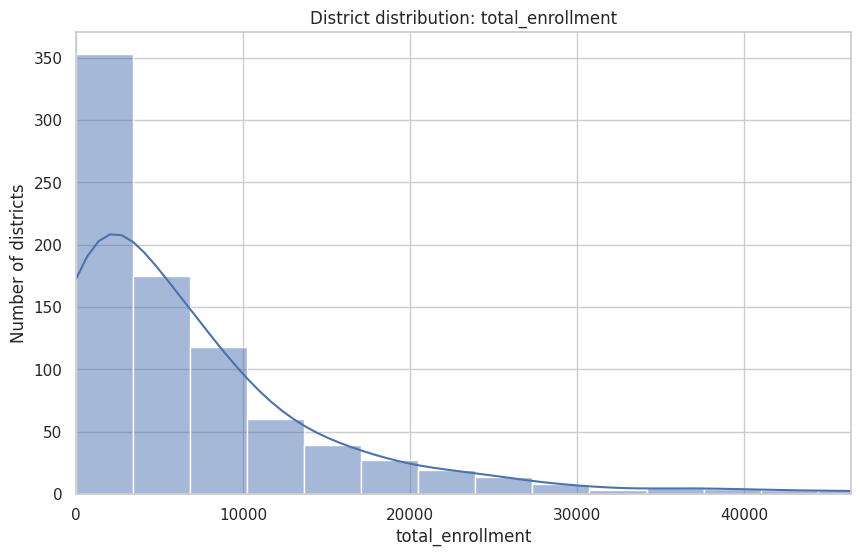

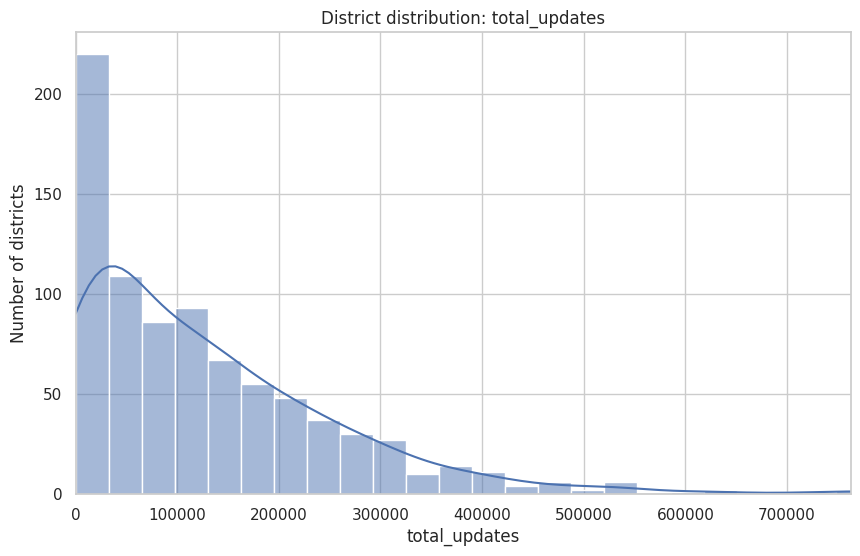

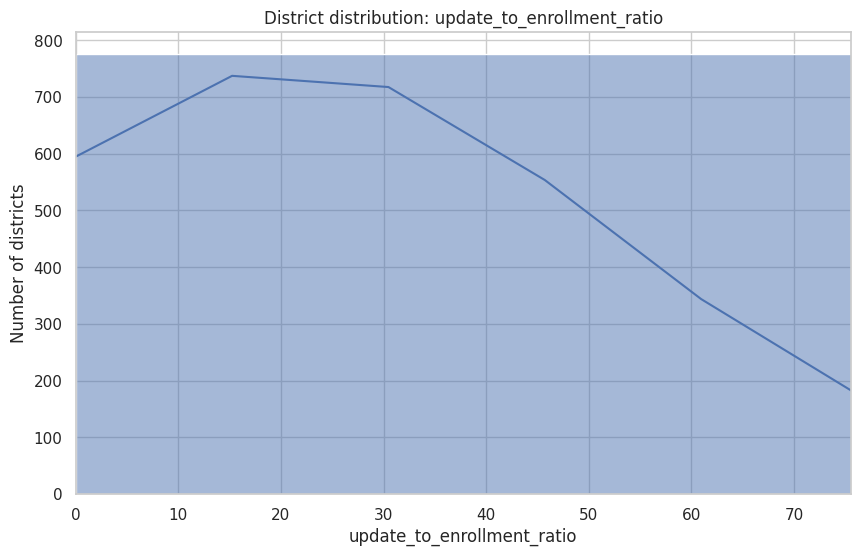

In [259]:
cols = [
    "total_enrollment",
    "total_updates",
    "update_to_enrollment_ratio"
]

for col in cols:
    plt.figure()
    data = district_agg[col].replace([np.inf, -np.inf], np.nan).dropna()
    sns.histplot(data, bins=40, kde=True)
    plt.xlim(0, data.quantile(0.99))
    plt.title(f"District distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Number of districts")
    plt.show()


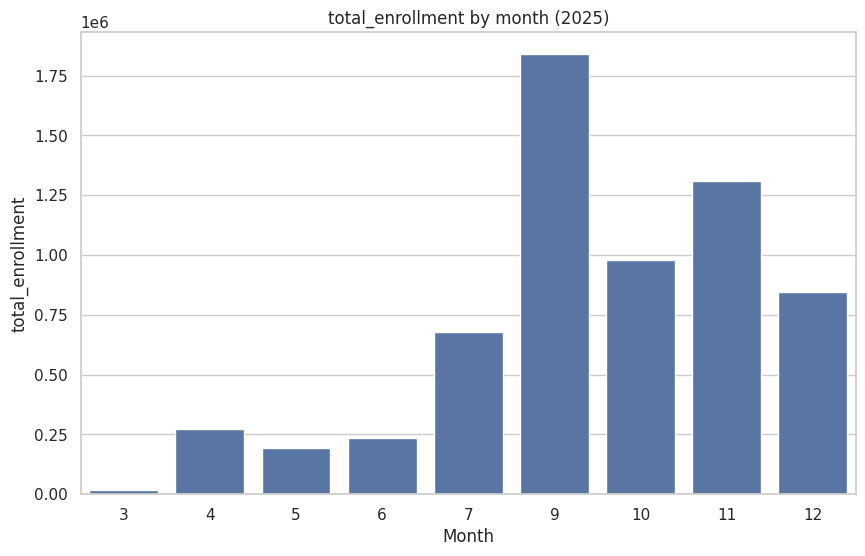

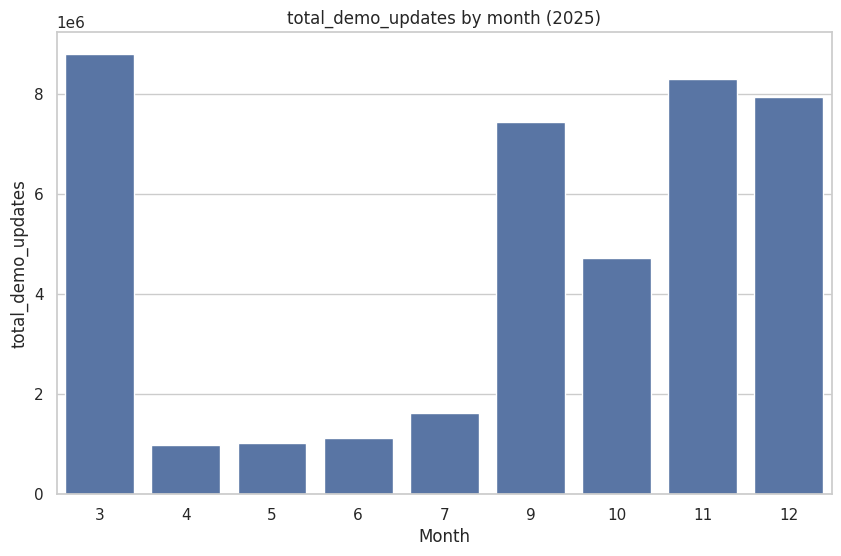

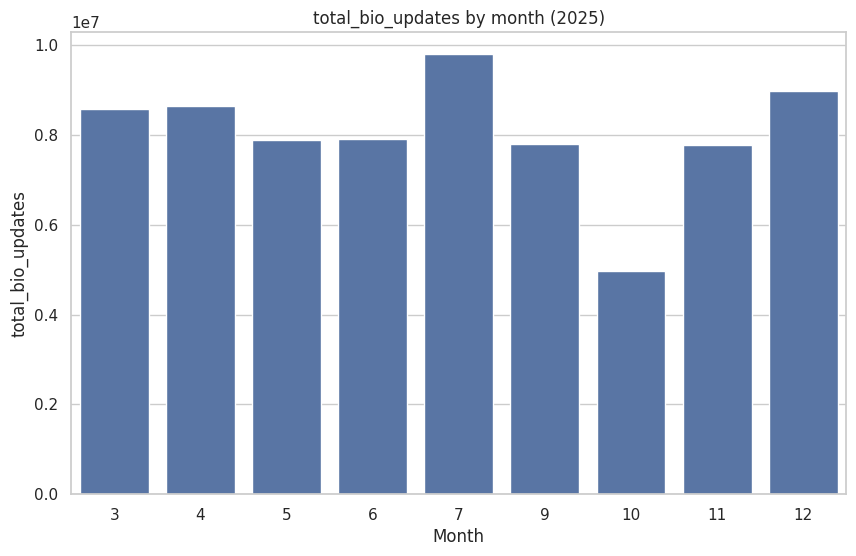

In [260]:
monthly_agg = monthly_agg.sort_values("month")

for col in ["total_enrollment", "total_demo_updates", "total_bio_updates"]:
    plt.figure()
    sns.barplot(data=monthly_agg, x="month", y=col)
    plt.title(f"{col} by month (2025)")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

####Bivariate Analysis


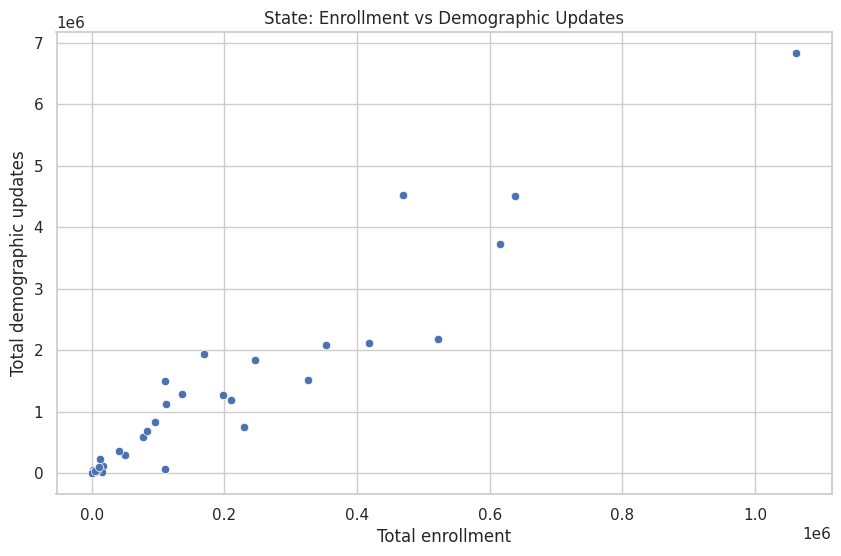

In [261]:
plt.figure()
sns.scatterplot(
    data=state_agg,
    x="total_enrollment",
    y="total_demo_updates"
)
plt.title("State: Enrollment vs Demographic Updates")
plt.xlabel("Total enrollment")
plt.ylabel("Total demographic updates")
plt.show()



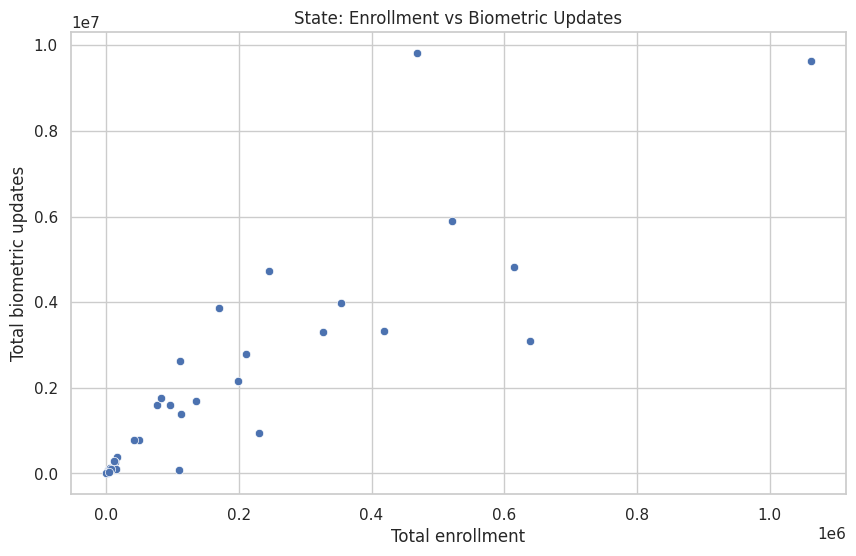

In [262]:
plt.figure()
sns.scatterplot(
    data=state_agg,
    x="total_enrollment",
    y="total_bio_updates"
)
plt.title("State: Enrollment vs Biometric Updates")
plt.xlabel("Total enrollment")
plt.ylabel("Total biometric updates")
plt.show()

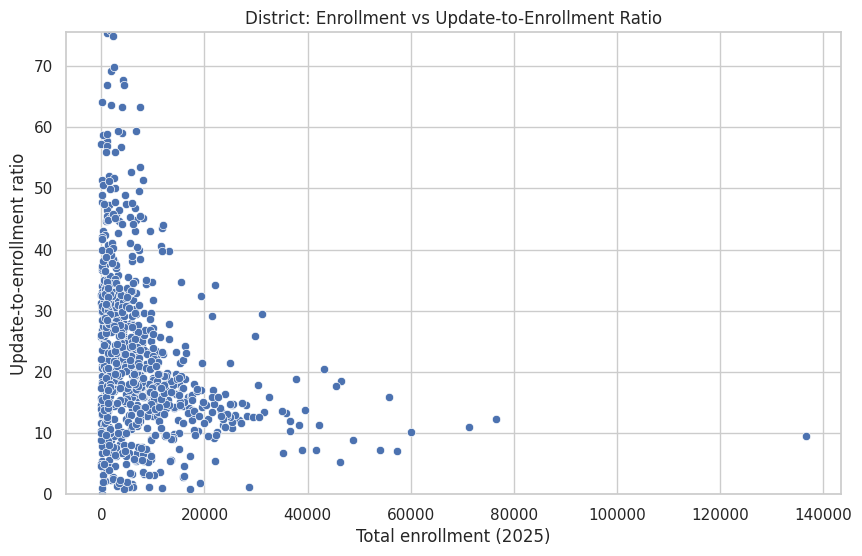

In [263]:
plt.figure()
sns.scatterplot(
    data=district_agg,
    x="total_enrollment",
    y="update_to_enrollment_ratio"
)
plt.title("District: Enrollment vs Update-to-Enrollment Ratio")
plt.xlabel("Total enrollment (2025)")
plt.ylabel("Update-to-enrollment ratio")
plt.ylim(0, district_agg["update_to_enrollment_ratio"].quantile(0.99))
plt.show()

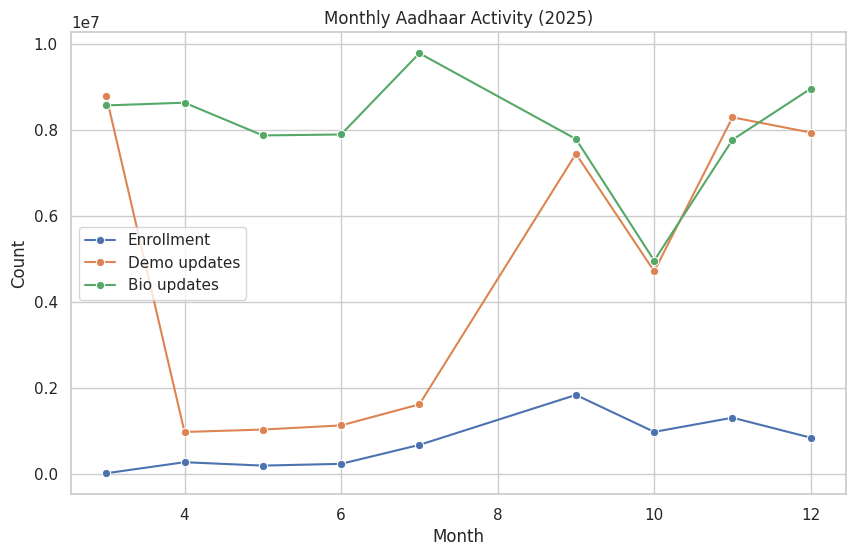

In [264]:
plt.figure()
sns.lineplot(data=monthly_agg, x="month", y="total_enrollment", marker="o", label="Enrollment")
sns.lineplot(data=monthly_agg, x="month", y="total_demo_updates", marker="o", label="Demo updates")
sns.lineplot(data=monthly_agg, x="month", y="total_bio_updates", marker="o", label="Bio updates")
plt.title("Monthly Aadhaar Activity (2025)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.show()

####Multivariate Analysis


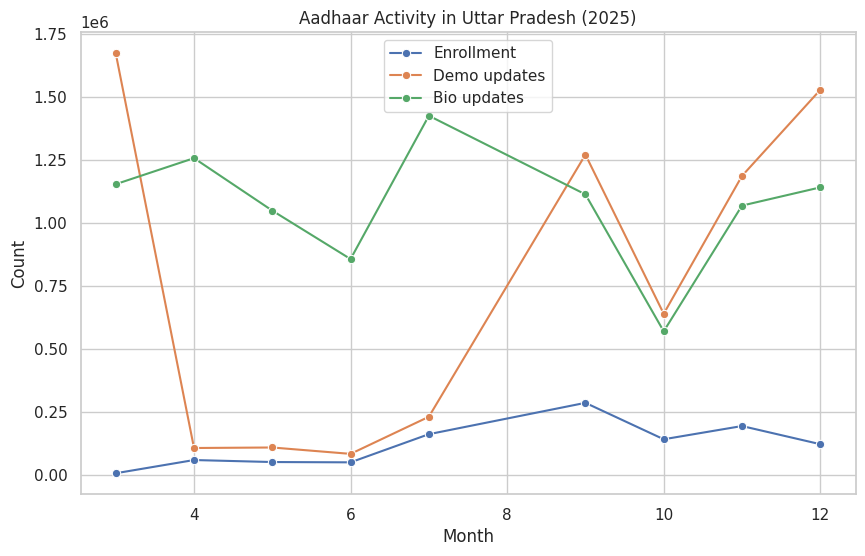

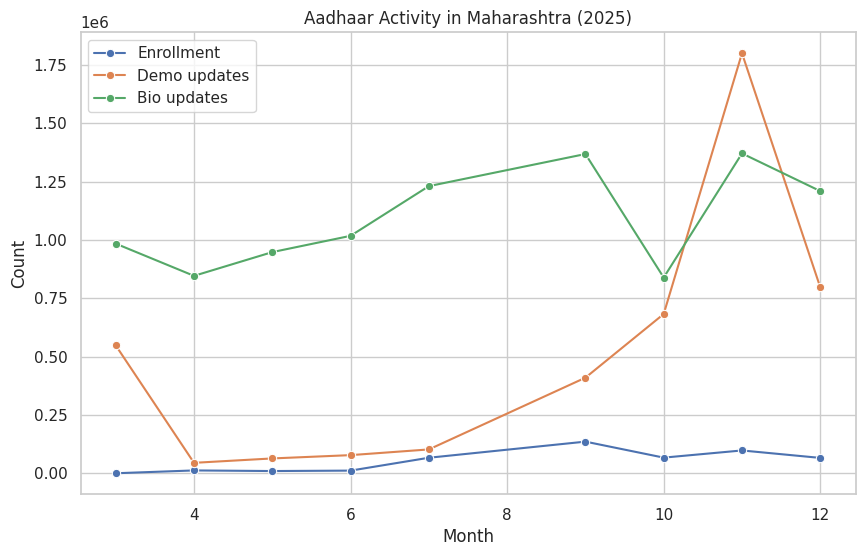

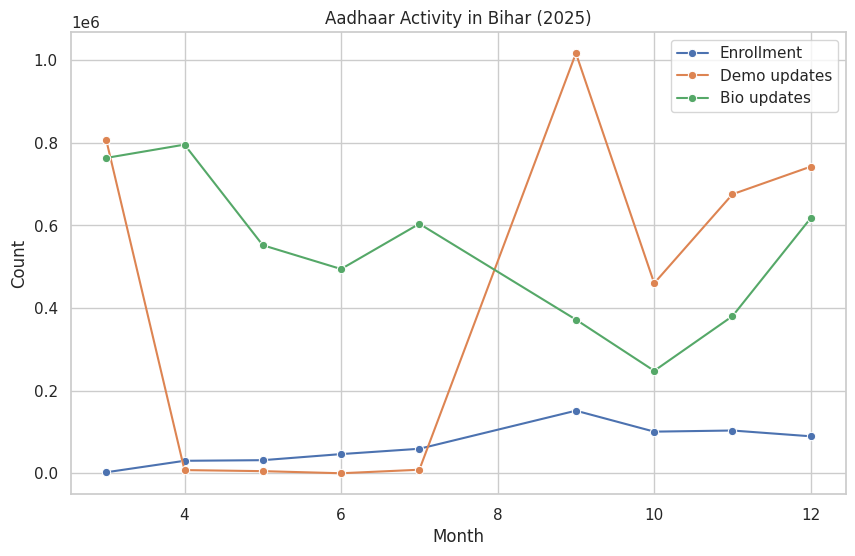

In [265]:
df_state_month = (
    df_master
    .groupby(["state", "month"], as_index=False)
    .agg({
        "total_enrollment": "sum",
        "total_demo_updates": "sum",
        "total_bio_updates": "sum"
    })
)


# Create state-level total_updates explicitly
state_agg["total_updates"] = (
    state_agg["total_demo_updates"] +
    state_agg["total_bio_updates"]
)

# Pick top 3 states by total update load
states_to_plot = (
    state_agg
    .sort_values("total_updates", ascending=False)["state"]
    .head(3)
)

# State × Month × Activity plots
for st in states_to_plot:
    temp = df_state_month[df_state_month["state"] == st].sort_values("month")
    plt.figure()
    sns.lineplot(data=temp, x="month", y="total_enrollment", marker="o", label="Enrollment")
    sns.lineplot(data=temp, x="month", y="total_demo_updates", marker="o", label="Demo updates")
    sns.lineplot(data=temp, x="month", y="total_bio_updates", marker="o", label="Bio updates")
    plt.title(f"Aadhaar Activity in {st} (2025)")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

In [266]:
district_agg.sort_values(
    "update_to_enrollment_ratio", ascending=False
).head(10)

,state,district,total_enrollment,total_demo_updates,total_bio_updates,total_updates,update_to_enrollment_ratio
27,Andhra Pradesh,Mahabubnagar,9.0,95.0,27194.0,27289.0,3032.111111
496,Manipur,Thoubal,1019.0,46646.0,54796.0,101442.0,99.550540
422,Madhya Pradesh,Narmadapuram,1163.0,7579.0,101717.0,109296.0,93.977644
521,Mizoram,Serchhip,100.0,1804.0,7410.0,9214.0,92.140000
489,Manipur,Imphal East,1103.0,44349.0,57215.0,101564.0,92.079782
490,Manipur,Imphal West,1217.0,45415.0,59904.0,105319.0,86.539852
483,Maharashtra,Wardha,1888.0,23766.0,123032.0,146798.0,77.753178
159,Chhattisgarh,Balod,1596.0,42407.0,78779.0,121186.0,75.931078
44,Andhra Pradesh,Warangal,1004.0,25665.0,50079.0,75744.0,75.442231
459,Maharashtra,Gadchiroli,2341.0,38981.0,136561.0,175542.0,74.985903


###Trend Analysis


In [267]:
monthly_agg = monthly_agg.sort_values("month")

monthly_agg[[
    "month",
    "total_enrollment",
    "total_demo_updates",
    "total_bio_updates"
]]

,month,total_enrollment,total_demo_updates,total_bio_updates
0,3,16582.0,8797695.0,8578228.0
1,4,273737.0,977613.0,8641679.0
2,5,194444.0,1033273.0,7879956.0
3,6,235286.0,1130029.0,7901578.0
4,7,676317.0,1619721.0,9792552.0
5,9,1839644.0,7452260.0,7795565.0
6,10,979011.0,4717313.0,4965643.0
7,11,1309561.0,8301109.0,7778956.0
8,12,843874.0,7946674.0,8969038.0


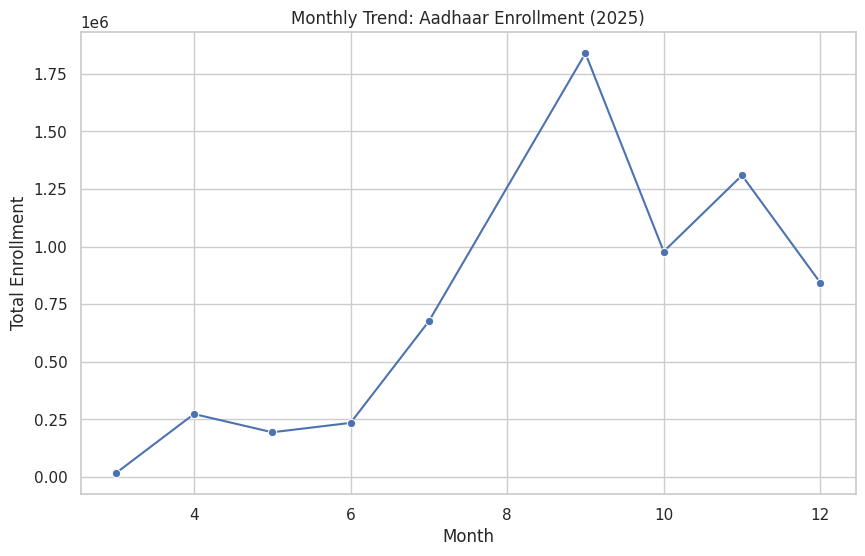

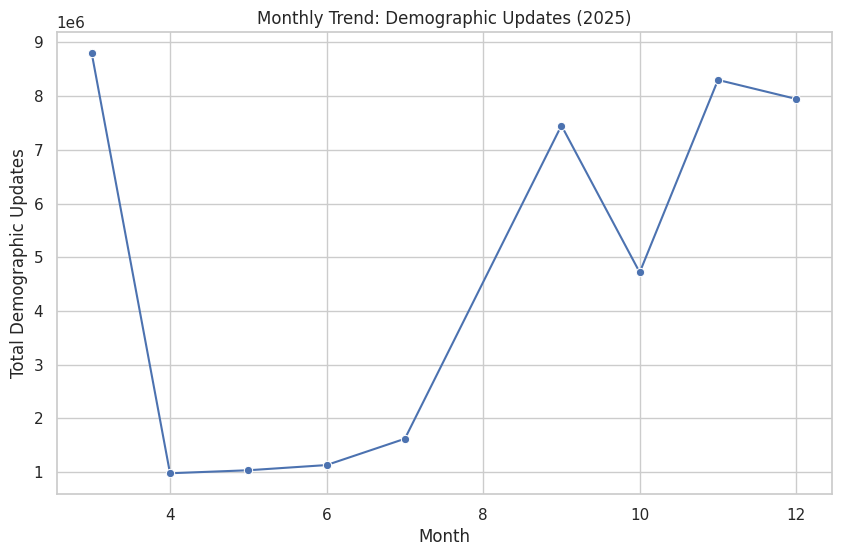

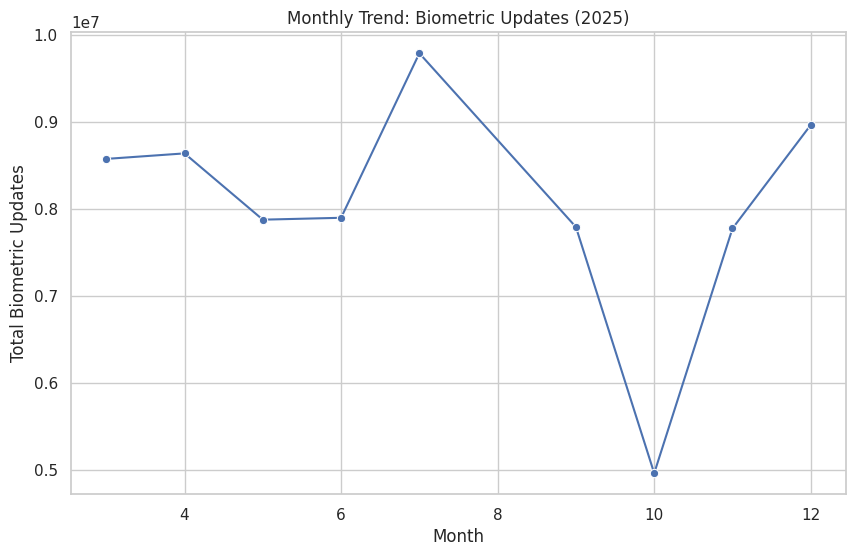

In [268]:
plt.figure()
sns.lineplot(data=monthly_agg, x="month", y="total_enrollment", marker="o")
plt.title("Monthly Trend: Aadhaar Enrollment (2025)")
plt.xlabel("Month")
plt.ylabel("Total Enrollment")
plt.show()

plt.figure()
sns.lineplot(data=monthly_agg, x="month", y="total_demo_updates", marker="o")
plt.title("Monthly Trend: Demographic Updates (2025)")
plt.xlabel("Month")
plt.ylabel("Total Demographic Updates")
plt.show()

plt.figure()
sns.lineplot(data=monthly_agg, x="month", y="total_bio_updates", marker="o")
plt.title("Monthly Trend: Biometric Updates (2025)")
plt.xlabel("Month")
plt.ylabel("Total Biometric Updates")
plt.show()

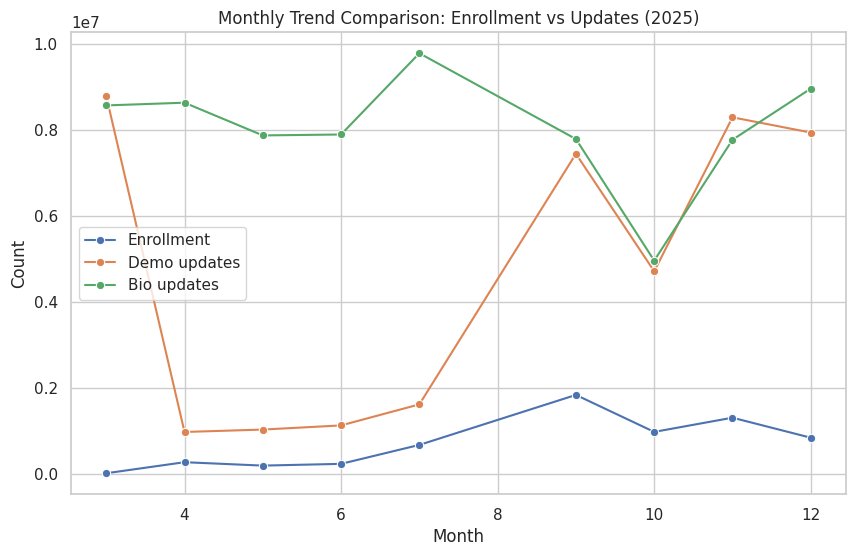

In [269]:
plt.figure()
sns.lineplot(data=monthly_agg, x="month", y="total_enrollment", marker="o", label="Enrollment")
sns.lineplot(data=monthly_agg, x="month", y="total_demo_updates", marker="o", label="Demo updates")
sns.lineplot(data=monthly_agg, x="month", y="total_bio_updates", marker="o", label="Bio updates")

plt.title("Monthly Trend Comparison: Enrollment vs Updates (2025)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.show()

####Smoothed Trend (Rolling Average)

In [270]:
monthly_agg["enroll_roll3"] = monthly_agg["total_enrollment"].rolling(window=3).mean()
monthly_agg["demo_roll3"] = monthly_agg["total_demo_updates"].rolling(window=3).mean()
monthly_agg["bio_roll3"] = monthly_agg["total_bio_updates"].rolling(window=3).mean()

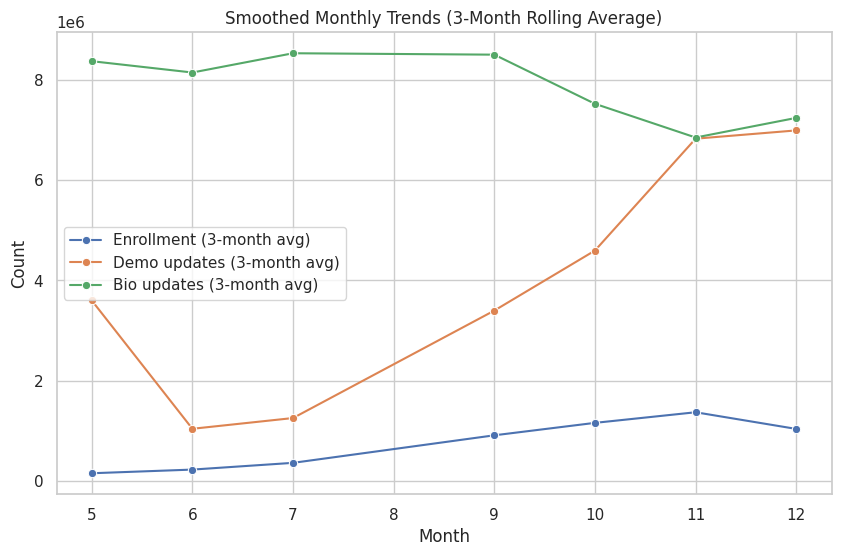

In [271]:
plt.figure()
sns.lineplot(data=monthly_agg, x="month", y="enroll_roll3", marker="o", label="Enrollment (3-month avg)")
sns.lineplot(data=monthly_agg, x="month", y="demo_roll3", marker="o", label="Demo updates (3-month avg)")
sns.lineplot(data=monthly_agg, x="month", y="bio_roll3", marker="o", label="Bio updates (3-month avg)")
plt.title("Smoothed Monthly Trends (3-Month Rolling Average)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.show()

####Growth Rate Trend

In [272]:
monthly_agg["enrollment_growth_pct"] = monthly_agg["total_enrollment"].pct_change() * 100
monthly_agg["demo_growth_pct"] = monthly_agg["total_demo_updates"].pct_change() * 100
monthly_agg["bio_growth_pct"] = monthly_agg["total_bio_updates"].pct_change() * 100

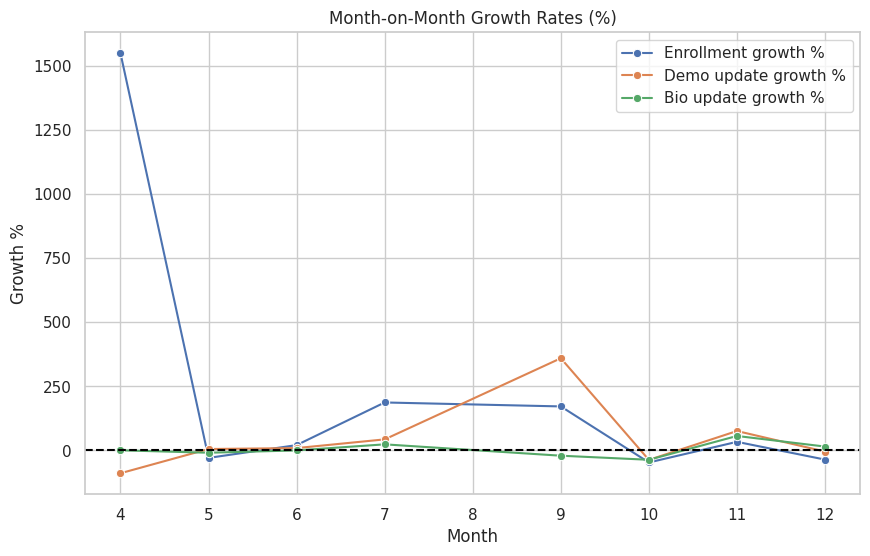

In [273]:
plt.figure()
sns.lineplot(data=monthly_agg, x="month", y="enrollment_growth_pct", marker="o", label="Enrollment growth %")
sns.lineplot(data=monthly_agg, x="month", y="demo_growth_pct", marker="o", label="Demo update growth %")
sns.lineplot(data=monthly_agg, x="month", y="bio_growth_pct", marker="o", label="Bio update growth %")
plt.axhline(0, color="black", linestyle="--")
plt.title("Month-on-Month Growth Rates (%)")
plt.xlabel("Month")
plt.ylabel("Growth %")
plt.legend()
plt.show()

####Relative Trend (Ratios over Time)

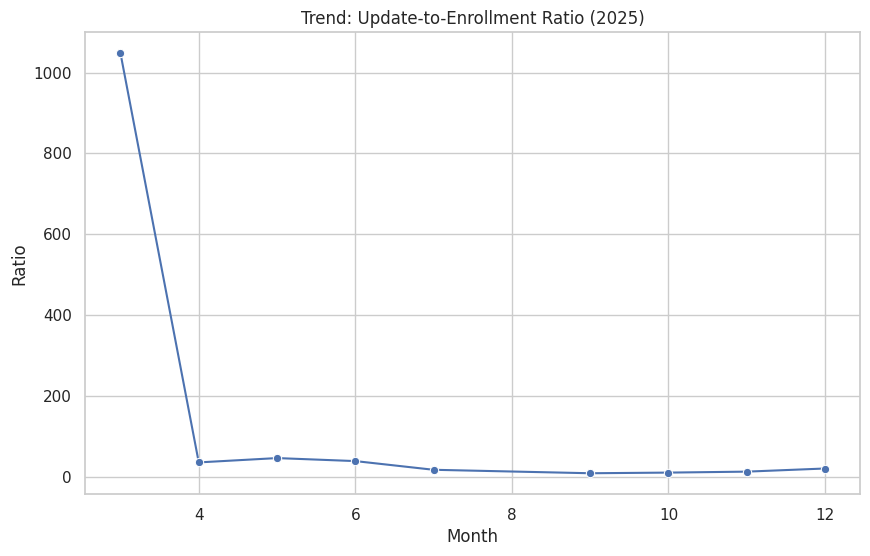

In [274]:
monthly_agg["update_to_enroll_ratio"] = (
    (monthly_agg["total_demo_updates"] + monthly_agg["total_bio_updates"]) /
    monthly_agg["total_enrollment"].replace(0, np.nan)
)

plt.figure()
sns.lineplot(data=monthly_agg, x="month", y="update_to_enroll_ratio", marker="o")
plt.title("Trend: Update-to-Enrollment Ratio (2025)")
plt.xlabel("Month")
plt.ylabel("Ratio")
plt.show()

###Regional Comparison

In [275]:
state_agg["update_to_enrollment_ratio"] = (
    state_agg["total_demo_updates"] + state_agg["total_bio_updates"]
) / state_agg["total_enrollment"].replace(0, np.nan)

state_agg.sort_values(
    "update_to_enrollment_ratio", ascending=False
).head(10)

,state,total_enrollment,total_demo_updates,total_bio_updates,total_updates,update_to_enrollment_ratio
5,Chandigarh,2620.0,57395.0,73552.0,130947.0,49.979771
0,Andaman and Nicobar Islands,637.0,6121.0,21104.0,27225.0,42.739403
9,Goa,2303.0,27830.0,66719.0,94549.0,41.054711
21,Manipur,13200.0,233382.0,275901.0,509283.0,38.582045
6,Chhattisgarh,110773.0,1496089.0,2634855.0,4130944.0,37.291975
32,Tripura,11285.0,105535.0,286418.0,391953.0,34.732211
1,Andhra Pradesh,169460.0,1935423.0,3867087.0,5802510.0,34.241178
20,Maharashtra,469070.0,4526730.0,9812215.0,14338945.0,30.568881
12,Himachal Pradesh,16942.0,115993.0,385454.0,501447.0,29.597863
27,Punjab,82779.0,688157.0,1760833.0,2448990.0,29.584677


In [276]:
district_agg.sort_values(
    "update_to_enrollment_ratio", ascending=False
).head(15)

,state,district,total_enrollment,total_demo_updates,total_bio_updates,total_updates,update_to_enrollment_ratio
27,Andhra Pradesh,Mahabubnagar,9.0,95.0,27194.0,27289.0,3032.111111
496,Manipur,Thoubal,1019.0,46646.0,54796.0,101442.0,99.550540
422,Madhya Pradesh,Narmadapuram,1163.0,7579.0,101717.0,109296.0,93.977644
521,Mizoram,Serchhip,100.0,1804.0,7410.0,9214.0,92.140000
489,Manipur,Imphal East,1103.0,44349.0,57215.0,101564.0,92.079782
490,Manipur,Imphal West,1217.0,45415.0,59904.0,105319.0,86.539852
483,Maharashtra,Wardha,1888.0,23766.0,123032.0,146798.0,77.753178
159,Chhattisgarh,Balod,1596.0,42407.0,78779.0,121186.0,75.931078
44,Andhra Pradesh,Warangal,1004.0,25665.0,50079.0,75744.0,75.442231
459,Maharashtra,Gadchiroli,2341.0,38981.0,136561.0,175542.0,74.985903


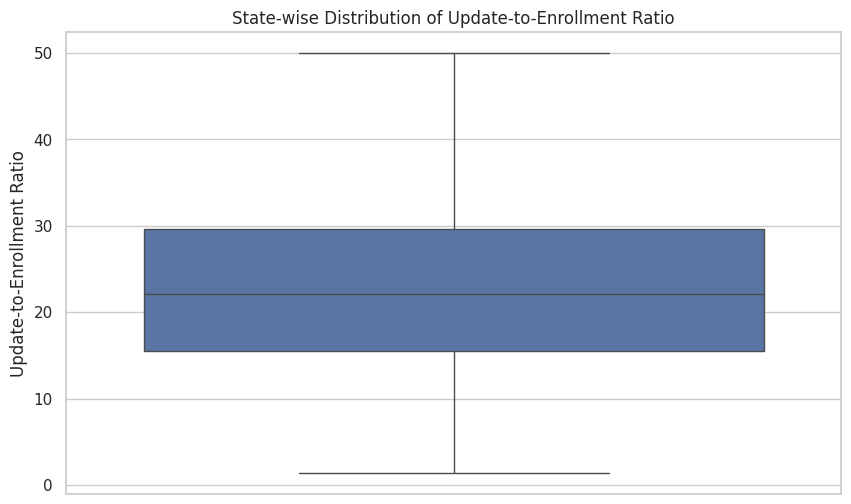

In [277]:
plt.figure()
sns.boxplot(
    data=state_agg,
    y="update_to_enrollment_ratio"
)
plt.title("State-wise Distribution of Update-to-Enrollment Ratio")
plt.ylabel("Update-to-Enrollment Ratio")
plt.show()

###Behaviour Segmentation

In [278]:
segmentation_features = district_agg[[
    "total_enrollment",
    "total_demo_updates",
    "total_bio_updates",
    "update_to_enrollment_ratio"
]].fillna(0)

In [279]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(segmentation_features)

In [280]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
district_agg["behavior_cluster"] = kmeans.fit_predict(X_scaled)

In [281]:
district_agg.groupby("behavior_cluster")[[
    "total_enrollment",
    "total_demo_updates",
    "total_bio_updates",
    "update_to_enrollment_ratio"
]].mean()

,total_enrollment,total_demo_updates,total_bio_updates,update_to_enrollment_ratio
behavior_cluster,,,,
0,3387.036082,21359.563574,42290.759450,23.106872
1,14021.943478,93945.769565,167129.326087,22.728070
2,9.000000,95.000000,27194.000000,3032.111111
3,45082.500000,305261.500000,354732.076923,16.899067


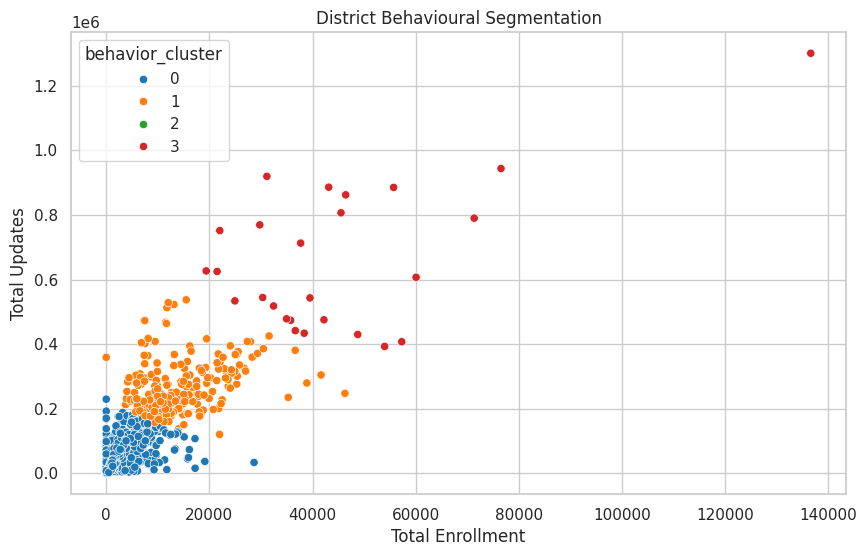

In [282]:
plt.figure()
sns.scatterplot(
    data=district_agg,
    x="total_enrollment",
    y="total_updates",
    hue="behavior_cluster",
    palette="tab10"
)
plt.title("District Behavioural Segmentation")
plt.xlabel("Total Enrollment")
plt.ylabel("Total Updates")
plt.show()

###LifeCycle Analysis

In [283]:
district_agg["update_share"] = (
    district_agg["total_updates"] /
    (district_agg["total_updates"] + district_agg["total_enrollment"])
)

In [284]:
def lifecycle_stage(row):
    if row["total_enrollment"] == 0 and row["total_updates"] > 0:
        return "Legacy-only (maintenance)"
    elif row["update_share"] < 0.4:
        return "Enrollment-heavy"
    elif row["update_share"] < 0.7:
        return "Balanced"
    else:
        return "Update-heavy"

district_agg["lifecycle_stage"] = district_agg.apply(lifecycle_stage, axis=1)

In [285]:
district_agg["lifecycle_stage"].value_counts()

,count
lifecycle_stage,
Update-heavy,765
Legacy-only (maintenance),55
Balanced,18
Enrollment-heavy,1


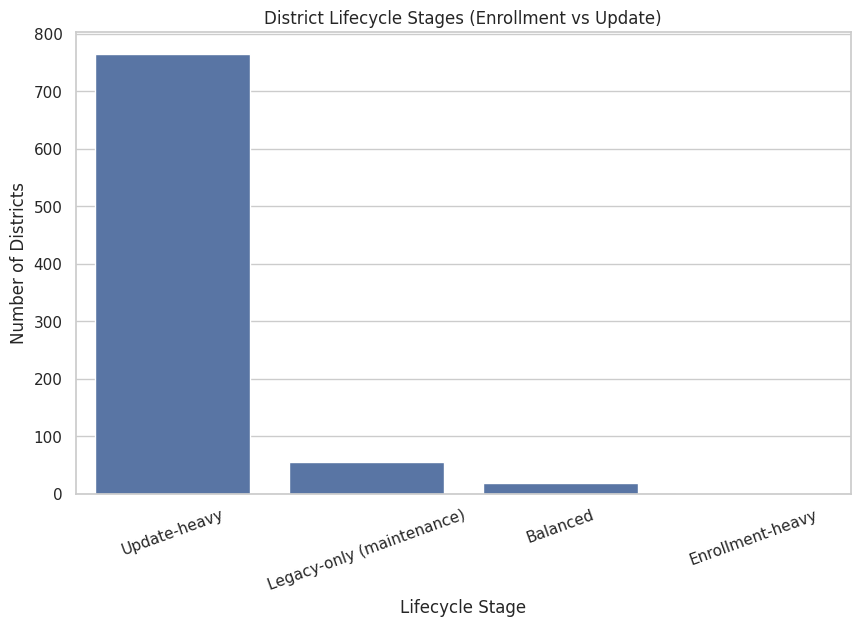

In [286]:
plt.figure()
sns.countplot(
    data=district_agg,
    x="lifecycle_stage",
    order=district_agg["lifecycle_stage"].value_counts().index
)
plt.title("District Lifecycle Stages (Enrollment vs Update)")
plt.xlabel("Lifecycle Stage")
plt.ylabel("Number of Districts")
plt.xticks(rotation=20)
plt.show()